In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Tabular Q-learning agent (notebook)

This notebooks can be run directly from VSCode, to generate a
traditional Jupyter Notebook to open in your browser
 you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

'Tabular Q-learning agent (notebook)\n\nThis notebooks can be run directly from VSCode, to generate a\ntraditional Jupyter Notebook to open in your browser\n you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n'

In [2]:
import sys
import os
import logging
from typing import cast
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from cyberbattle.agents.baseline.learner import TrainedLearner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_tabularqlearning as a
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
import cyberbattle.agents.baseline.learner as learner
from cyberbattle._env.cyberbattle_env import AttackerGoal

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Benchmark parameters:
#   Parameters from DeepDoubleQ paper
#    - learning_rate = 0.00025
#    - linear epsilon decay
#    - gamma = 0.99
#   Eliminated gamma_values
#       0.0,
#       0.0015,  # too small
#       0.15,  # too big
#       0.25,  # too big
#       0.35,  # too big
#
# NOTE: Given the relatively low number of training episodes (50,
# a high learning rate of .99 gives better result
# than a lower learning rate of 0.25 (i.e. maximal rewards reached faster on average).
# Ideally we should decay the learning rate just like gamma and train over a
# much larger number of episodes

cyberbattlechain_10 = gym.make("CyberBattleChain-v0", size=10, attacker_goal=AttackerGoal(own_atleast_percent=1.0))


ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=12, maximum_total_credentials=12, identifiers=cyberbattlechain_10.identifiers)

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/envs/registration.py:481: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.identifiers to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.identifiers` for environment variables or `env.get_wrapper_attr('identifiers')` that will search the reminding wrappers.
  logger.warn(


In [5]:
iteration_count = 9000
training_episode_count = 5
eval_episode_count = 5
gamma_sweep = [
    0.015,  # about right
]
plots_dir = 'output/plots'

In [6]:
# Parameters
plots_dir = "notebooks/output/benchmark/plots"


In [7]:
os.makedirs(plots_dir, exist_ok=True)

In [8]:
def qlearning_run(gamma, gym_env):
    """Execute one run of the q-learning algorithm for the
    specified gamma value"""
    return learner.epsilon_greedy_search(
        gym_env,
        ep,
        a.QTabularLearner(ep, gamma=gamma, learning_rate=0.90, exploit_percentile=100),
        episode_count=training_episode_count,
        iteration_count=iteration_count,
        epsilon=0.90,
        render=False,
        epsilon_multdecay=0.75,  # 0.999,
        epsilon_minimum=0.01,
        verbosity=Verbosity.Quiet,
        title="Q-learning",
    )

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'numpy.int32'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sample_valid_action to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sample_valid_action` for environment variables or `env.get_wrapper_attr('sample_valid_action')` that will search the reminding wrappers.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'numpy.int32'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")


Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.
  logger.warn(
Episode 1|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  129.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  129.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  137.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  137.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  146.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  146.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 86|reward:  246.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 86|reward:  246.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 89|reward:  260.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 89|reward:  260.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  360.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  360.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 96|reward:  362.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 96|reward:  362.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  364.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  364.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 110|reward:  375.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 110|reward:  375.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  381.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  381.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  390.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  390.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  490.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  490.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  496.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  496.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:  510.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:  510.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 154|reward:  516.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 154|reward:  516.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 1|Iteration 160|reward:  616.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 1|Iteration 160|reward:  616.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 1|Iteration 163|reward:  618.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 1|Iteration 163|reward:  618.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  632.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  632.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 180|reward:  634.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 180|reward:  634.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 1|Iteration 182|reward:  640.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 1|Iteration 182|reward:  640.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  740.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  740.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 187|reward:  754.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 187|reward:  754.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 1|Iteration 193|reward:  760.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 1|Iteration 193|reward:  760.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  764.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  764.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 214|reward:  864.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 214|reward:  864.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 1|Iteration 221|reward:  875.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 1|Iteration 221|reward:  875.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 1|Iteration 241|reward:  881.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 1|Iteration 241|reward:  881.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 1|Iteration 245|reward:  887.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 1|Iteration 245|reward:  887.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 1|Iteration 250|reward:  893.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 1|Iteration 250|reward:  893.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 1|Iteration 253|reward:  902.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 1|Iteration 253|reward:  902.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 1|Iteration 258|reward:  908.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 1|Iteration 258|reward:  908.0|last_reward_at:  258|Elapsed Time: 0:00:00||

Episode 1|Iteration 262|reward: 1008.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 1|Iteration 262|reward: 1008.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 1|Iteration 265|reward: 1022.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 1|Iteration 265|reward: 1022.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 1|Iteration 268|reward: 1122.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 1|Iteration 268|reward: 1122.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 1|Iteration 289|reward: 1122.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 1|Iteration 295|reward: 1124.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 1|Iteration 295|reward: 1124.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 1|Iteration 298|reward: 1130.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 1|Iteration 298|reward: 1130.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 304|reward: 1141.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 304|reward: 1141.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 1|Iteration 319|reward: 1143.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 1|Iteration 319|reward: 1143.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 1|Iteration 329|reward: 1145.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 1|Iteration 329|reward: 1145.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 1|Iteration 340|reward: 1153.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 1|Iteration 340|reward: 1153.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 1|Iteration 366|reward: 1153.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 1|Iteration 384|reward: 1159.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 1|Iteration 384|reward: 1159.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 1|Iteration 391|reward: 1165.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 1|Iteration 391|reward: 1165.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 1|Iteration 412|reward: 1165.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 1|Iteration 433|reward: 1174.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 1|Iteration 433|reward: 1174.0|last_reward_at:  433|Elapsed Time: 0:00:01||

Episode 1|Iteration 435|reward: 1274.0|last_reward_at:  433|Elapsed Time: 0:00:01||

Episode 1|Iteration 435|reward: 1274.0|last_reward_at:  435|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward: 1274.0|last_reward_at:  435|Elapsed Time: 0:00:01||

Episode 1|Iteration 477|reward: 1274.0|last_reward_at:  435|Elapsed Time: 0:00:01||

Episode 1|Iteration 500|reward: 1274.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 1|Iteration 528|reward: 1274.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 1|Iteration 551|reward: 1274.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward: 1274.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward: 1280.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward: 1280.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 1|Iteration 574|reward: 1294.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 1|Iteration 574|reward: 1294.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 1|Iteration 576|reward: 6294.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 1|Iteration 576|reward: 6294.0|last_reward_at:  576|Elapsed Time: 0:00:02||

  Episode 1 ended at t=576 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/144 (0.09)
    explore-remote: 20/155 (0.11)
    explore-connect: 1/213 (0.00)
    exploit-local: 5/3 (0.62)
    exploit-remote: 0/10 (0.00)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 38
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  244.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  246.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  248.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  248.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  348.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  350.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  350.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  361.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  361.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  367.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  367.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  373.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  373.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  381.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  381.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  390.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  390.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  396.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  396.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  496.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  496.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  510.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  510.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  610.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  610.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  624.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  624.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  724.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  724.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  730.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  730.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  732.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  732.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  738.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  738.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  740.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  740.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  746.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  746.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  752.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  752.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  758.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  758.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  772.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  772.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 103|reward:  872.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 103|reward:  872.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  872.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 2|Iteration 141|reward:  874.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 2|Iteration 141|reward:  874.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  888.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  888.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 145|reward:  988.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 145|reward:  988.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 2|Iteration 151|reward: 1002.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 2|Iteration 151|reward: 1002.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 2|Iteration 153|reward: 1102.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 2|Iteration 153|reward: 1102.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 2|Iteration 162|reward: 1108.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 2|Iteration 162|reward: 1108.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward: 1114.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward: 1114.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 2|Iteration 168|reward: 1116.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 2|Iteration 168|reward: 1116.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 2|Iteration 187|reward: 1122.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 2|Iteration 187|reward: 1122.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 2|Iteration 199|reward: 1124.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 2|Iteration 199|reward: 1124.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 2|Iteration 201|reward: 1138.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 2|Iteration 201|reward: 1138.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 2|Iteration 203|reward: 1238.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 2|Iteration 203|reward: 1238.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 2|Iteration 206|reward: 1252.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 2|Iteration 206|reward: 1252.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 2|Iteration 207|reward: 6252.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 2|Iteration 207|reward: 6252.0|last_reward_at:  207|Elapsed Time: 0:00:01||

  Episode 2 ended at t=207 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/45 (0.13)
    explore-remote: 16/50 (0.24)
    explore-connect: 0/49 (0.00)
    exploit-local: 10/9 (0.53)
    exploit-remote: 0/10 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 29
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  352.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  354.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  354.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  368.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  468.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  468.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  470.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  470.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  476.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  476.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  490.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  490.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  590.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  590.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  604.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  604.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  606.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  606.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  706.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  706.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  708.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  708.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  714.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  714.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  720.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  720.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  726.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  726.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  740.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  740.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  840.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  840.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  846.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  846.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 70|reward:  860.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 70|reward:  860.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  960.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  960.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  966.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  966.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  972.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  972.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  986.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  986.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward: 1086.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward: 1086.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward: 1100.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward: 1100.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward: 1106.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward: 1106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward: 1206.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward: 1206.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward: 1208.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward: 1208.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 87|reward: 1222.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 87|reward: 1222.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward: 6222.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward: 6222.0|last_reward_at:   88|Elapsed Time: 0:00:00||

  Episode 3 ended at t=88 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 11/12 (0.48)
    explore-connect: 0/20 (0.00)
    exploit-local: 12/2 (0.86)
    exploit-remote: 2/5 (0.29)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 22
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  362.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  368.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  368.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  468.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  468.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  479.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  479.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  485.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  485.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  494.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  494.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  594.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  594.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  596.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  610.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  610.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  710.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  710.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  716.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  716.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  718.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  718.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  724.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  724.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  726.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  726.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  728.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  728.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:  734.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:  734.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  736.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  736.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:  750.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:  750.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  850.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  850.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  864.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  864.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  964.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  964.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:  970.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:  970.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  976.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  976.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  978.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  978.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  980.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  980.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  986.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  986.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  988.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  988.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  994.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  994.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward: 1000.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward: 1000.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward: 1014.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward: 1014.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 126|reward: 1114.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 126|reward: 1114.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 4|Iteration 134|reward: 1120.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 4|Iteration 134|reward: 1120.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 4|Iteration 151|reward: 1120.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 4|Iteration 154|reward: 1131.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 4|Iteration 154|reward: 1131.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 4|Iteration 168|reward: 1137.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 4|Iteration 168|reward: 1137.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 4|Iteration 184|reward: 1143.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 4|Iteration 184|reward: 1143.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 4|Iteration 186|reward: 1145.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 4|Iteration 186|reward: 1145.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 4|Iteration 193|reward: 1147.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 4|Iteration 193|reward: 1147.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 4|Iteration 200|reward: 1155.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 4|Iteration 200|reward: 1155.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 216|reward: 1155.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 228|reward: 1155.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 245|reward: 1155.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 260|reward: 1155.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 263|reward: 1161.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 263|reward: 1161.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 4|Iteration 281|reward: 1161.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 4|Iteration 296|reward: 1161.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 4|Iteration 304|reward: 1167.0|last_reward_at:  263|Elapsed Time: 0:00:02||

Episode 4|Iteration 304|reward: 1167.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 4|Iteration 308|reward: 1176.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 4|Iteration 308|reward: 1176.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 4|Iteration 309|reward: 1276.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 4|Iteration 309|reward: 1276.0|last_reward_at:  309|Elapsed Time: 0:00:02||

Episode 4|Iteration 324|reward: 1290.0|last_reward_at:  309|Elapsed Time: 0:00:02||

Episode 4|Iteration 324|reward: 1290.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 4|Iteration 325|reward: 6290.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 4|Iteration 325|reward: 6290.0|last_reward_at:  325|Elapsed Time: 0:00:02||

  Episode 4 ended at t=325 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/69 (0.08)
    explore-remote: 12/57 (0.17)
    explore-connect: 0/72 (0.00)
    exploit-local: 14/22 (0.39)
    exploit-remote: 8/54 (0.13)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 85
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  456.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  456.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  462.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  468.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  468.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  470.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  470.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  484.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  484.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  584.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  584.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  595.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  595.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  597.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  597.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  603.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  603.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  609.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  609.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  615.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  615.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  617.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  617.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  619.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  619.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  625.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  625.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  634.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  634.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  734.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  734.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  748.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  748.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  848.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  848.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  850.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  850.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  856.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  856.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  870.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  870.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  970.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  970.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  972.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  972.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  986.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  986.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward: 1086.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward: 1086.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward: 1092.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward: 1092.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward: 1098.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward: 1098.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward: 1100.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward: 1100.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward: 1106.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward: 1106.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward: 1112.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward: 1112.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward: 1126.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward: 1126.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 117|reward: 1226.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 117|reward: 1226.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward: 1226.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 5|Iteration 136|reward: 1232.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 5|Iteration 136|reward: 1232.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 5|Iteration 137|reward: 1238.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 5|Iteration 137|reward: 1238.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 5|Iteration 144|reward: 1240.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 5|Iteration 144|reward: 1240.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 5|Iteration 145|reward: 1246.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 5|Iteration 145|reward: 1246.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 5|Iteration 147|reward: 1252.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 5|Iteration 147|reward: 1252.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 5|Iteration 149|reward: 1266.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 5|Iteration 149|reward: 1266.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward: 6266.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward: 6266.0|last_reward_at:  150|Elapsed Time: 0:00:00||

  Episode 5 ended at t=150 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/18 (0.18)
    explore-remote: 7/19 (0.27)
    explore-connect: 0/31 (0.00)
    exploit-local: 15/13 (0.54)
    exploit-remote: 9/23 (0.28)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 32
simulation ended


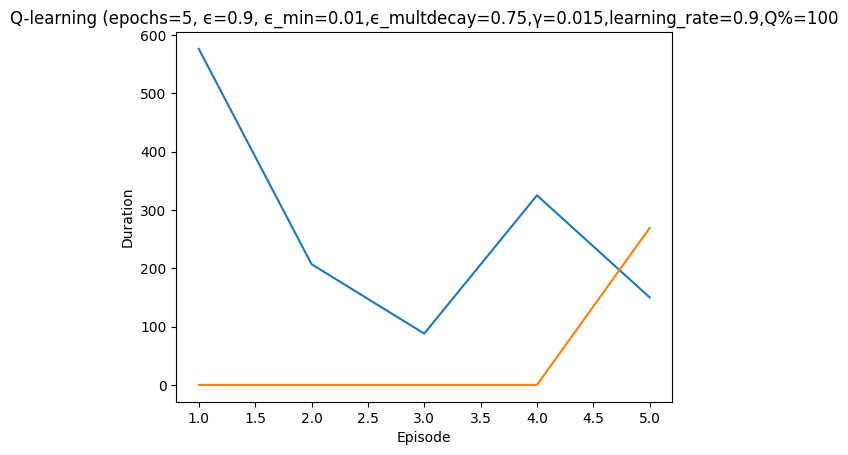

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.name to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.name` for environment variables or `env.get_wrapper_attr('name')` that will search the reminding wrappers.
  logger.warn(


In [9]:
# Run Q-learning with gamma-sweep
qlearning_results = [qlearning_run(gamma, cyberbattlechain_10) for gamma in gamma_sweep]

qlearning_bestrun_10 = qlearning_results[0]

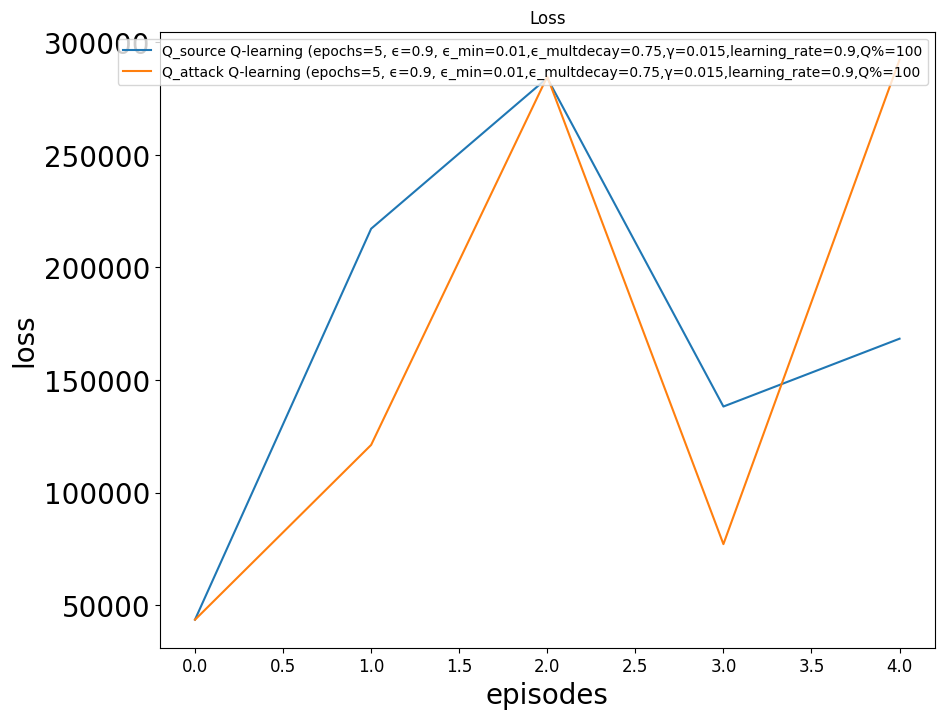

In [10]:
p.new_plot_loss()
for results in qlearning_results:
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results["learner"]).loss_qsource.all_episodes, "Q_source", results["title"])
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results["learner"]).loss_qattack.all_episodes, "Q_attack", results["title"])
plt.legend(loc="upper right")
plt.show()

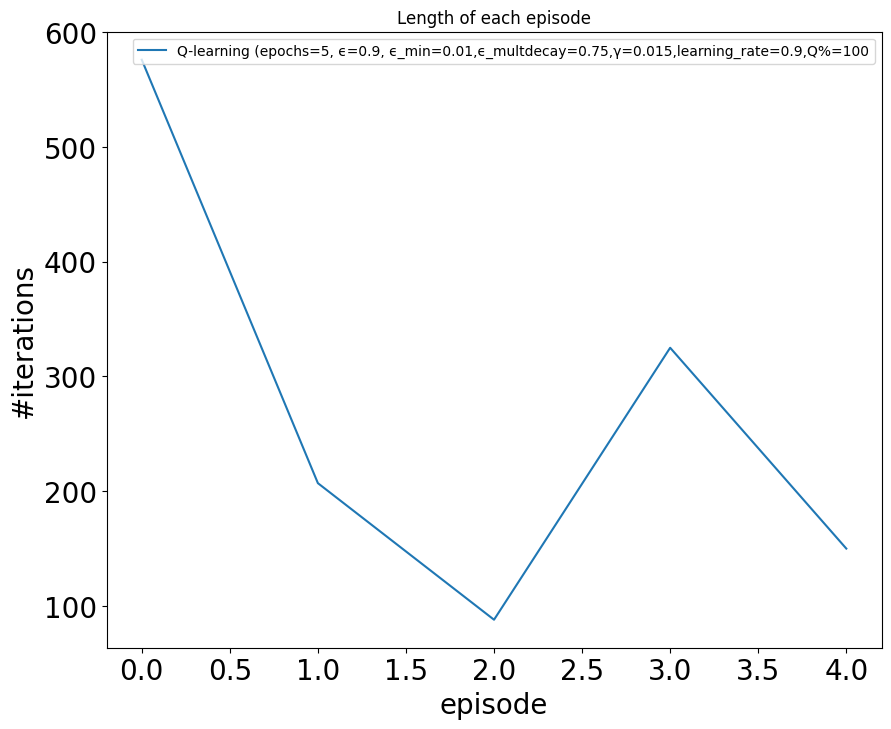

In [11]:
p.plot_episodes_length(qlearning_results)

###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.3,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  350.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  352.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  354.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  354.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  360.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  360.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  366.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  366.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  366.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  372.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  372.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  374.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  374.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 88|reward:  374.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 113|reward:  374.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  374.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  374.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  385.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  385.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 1|Iteration 163|reward:  393.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 1|Iteration 163|reward:  393.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  393.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 1|Iteration 206|reward:  393.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 1|Iteration 228|reward:  393.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 1|Iteration 243|reward:  393.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 1|Iteration 266|reward:  393.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 1|Iteration 279|reward:  399.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 1|Iteration 279|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 1|Iteration 301|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 1|Iteration 324|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 1|Iteration 342|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 1|Iteration 362|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 1|Iteration 381|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 1|Iteration 399|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 1|Iteration 418|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 1|Iteration 442|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 1|Iteration 456|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 1|Iteration 474|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 1|Iteration 491|reward:  399.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 1|Iteration 503|reward:  408.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 1|Iteration 503|reward:  408.0|last_reward_at:  503|Elapsed Time: 0:00:02||

Episode 1|Iteration 504|reward:  508.0|last_reward_at:  503|Elapsed Time: 0:00:02||

Episode 1|Iteration 504|reward:  508.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 1|Iteration 509|reward:  522.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 1|Iteration 509|reward:  522.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 1|Iteration 510|reward:  622.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 1|Iteration 510|reward:  622.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 1|Iteration 526|reward:  622.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 1|Iteration 539|reward:  636.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 1|Iteration 539|reward:  636.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 1|Iteration 541|reward:  736.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 1|Iteration 541|reward:  736.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 1|Iteration 542|reward:  750.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 1|Iteration 542|reward:  750.0|last_reward_at:  542|Elapsed Time: 0:00:02||

Episode 1|Iteration 543|reward:  850.0|last_reward_at:  542|Elapsed Time: 0:00:02||

Episode 1|Iteration 543|reward:  850.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 1|Iteration 548|reward:  852.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 1|Iteration 548|reward:  852.0|last_reward_at:  548|Elapsed Time: 0:00:02||

Episode 1|Iteration 563|reward:  858.0|last_reward_at:  548|Elapsed Time: 0:00:02||

Episode 1|Iteration 563|reward:  858.0|last_reward_at:  563|Elapsed Time: 0:00:02||

Episode 1|Iteration 578|reward:  860.0|last_reward_at:  563|Elapsed Time: 0:00:03||

Episode 1|Iteration 578|reward:  860.0|last_reward_at:  578|Elapsed Time: 0:00:03||

Episode 1|Iteration 587|reward:  862.0|last_reward_at:  578|Elapsed Time: 0:00:03||

Episode 1|Iteration 587|reward:  862.0|last_reward_at:  587|Elapsed Time: 0:00:03||

Episode 1|Iteration 597|reward:  868.0|last_reward_at:  587|Elapsed Time: 0:00:03||

Episode 1|Iteration 597|reward:  868.0|last_reward_at:  597|Elapsed Time: 0:00:03||

Episode 1|Iteration 604|reward:  874.0|last_reward_at:  597|Elapsed Time: 0:00:03||

Episode 1|Iteration 604|reward:  874.0|last_reward_at:  604|Elapsed Time: 0:00:03||

Episode 1|Iteration 613|reward:  880.0|last_reward_at:  604|Elapsed Time: 0:00:03||

Episode 1|Iteration 613|reward:  880.0|last_reward_at:  613|Elapsed Time: 0:00:03||

Episode 1|Iteration 629|reward:  880.0|last_reward_at:  613|Elapsed Time: 0:00:03||

Episode 1|Iteration 638|reward:  882.0|last_reward_at:  613|Elapsed Time: 0:00:03||

Episode 1|Iteration 638|reward:  882.0|last_reward_at:  638|Elapsed Time: 0:00:03||

Episode 1|Iteration 646|reward:  888.0|last_reward_at:  638|Elapsed Time: 0:00:03||

Episode 1|Iteration 646|reward:  888.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 1|Iteration 663|reward:  888.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 1|Iteration 668|reward:  902.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 1|Iteration 668|reward:  902.0|last_reward_at:  668|Elapsed Time: 0:00:03||

Episode 1|Iteration 669|reward: 1002.0|last_reward_at:  668|Elapsed Time: 0:00:03||

Episode 1|Iteration 669|reward: 1002.0|last_reward_at:  669|Elapsed Time: 0:00:03||

Episode 1|Iteration 673|reward: 1016.0|last_reward_at:  669|Elapsed Time: 0:00:03||

Episode 1|Iteration 673|reward: 1016.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 1|Iteration 674|reward: 1116.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 1|Iteration 674|reward: 1116.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 1|Iteration 677|reward: 1122.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 1|Iteration 677|reward: 1122.0|last_reward_at:  677|Elapsed Time: 0:00:03||

Episode 1|Iteration 693|reward: 1122.0|last_reward_at:  677|Elapsed Time: 0:00:03||

Episode 1|Iteration 700|reward: 1133.0|last_reward_at:  677|Elapsed Time: 0:00:03||

Episode 1|Iteration 700|reward: 1133.0|last_reward_at:  700|Elapsed Time: 0:00:03||

Episode 1|Iteration 710|reward: 1141.0|last_reward_at:  700|Elapsed Time: 0:00:03||

Episode 1|Iteration 710|reward: 1141.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 716|reward: 1143.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 716|reward: 1143.0|last_reward_at:  716|Elapsed Time: 0:00:03||

Episode 1|Iteration 725|reward: 1152.0|last_reward_at:  716|Elapsed Time: 0:00:03||

Episode 1|Iteration 725|reward: 1152.0|last_reward_at:  725|Elapsed Time: 0:00:03||

Episode 1|Iteration 726|reward: 1252.0|last_reward_at:  725|Elapsed Time: 0:00:03||

Episode 1|Iteration 726|reward: 1252.0|last_reward_at:  726|Elapsed Time: 0:00:03||

Episode 1|Iteration 736|reward: 1266.0|last_reward_at:  726|Elapsed Time: 0:00:04||

Episode 1|Iteration 736|reward: 1266.0|last_reward_at:  736|Elapsed Time: 0:00:04||

Episode 1|Iteration 737|reward: 6266.0|last_reward_at:  736|Elapsed Time: 0:00:04||

Episode 1|Iteration 737|reward: 6266.0|last_reward_at:  737|Elapsed Time: 0:00:04||

  Episode 1 ended at t=737 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/117 (0.10)
    explore-remote: 14/151 (0.08)
    explore-connect: 0/163 (0.00)
    exploit-local: 6/7 (0.46)
    exploit-remote: 2/253 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 256
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  344.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  346.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  348.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  354.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  354.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  365.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  365.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  367.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  367.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  375.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  375.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  381.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  381.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  381.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  381.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  387.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  387.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  396.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  396.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 115|reward:  496.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 115|reward:  496.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  510.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  510.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  610.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  610.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  612.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  612.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  612.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward:  612.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  618.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  618.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  620.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  620.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 199|reward:  634.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 2|Iteration 199|reward:  634.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 2|Iteration 200|reward:  734.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 2|Iteration 200|reward:  734.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 2|Iteration 201|reward:  748.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 2|Iteration 201|reward:  748.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 2|Iteration 202|reward:  848.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 2|Iteration 202|reward:  848.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 2|Iteration 206|reward:  850.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 2|Iteration 206|reward:  850.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 2|Iteration 215|reward:  856.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 2|Iteration 215|reward:  856.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 2|Iteration 224|reward:  870.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 2|Iteration 224|reward:  870.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 2|Iteration 225|reward:  970.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 2|Iteration 225|reward:  970.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 2|Iteration 226|reward:  976.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 2|Iteration 226|reward:  976.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 2|Iteration 227|reward:  990.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 2|Iteration 227|reward:  990.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 2|Iteration 229|reward: 1090.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 2|Iteration 229|reward: 1090.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 2|Iteration 230|reward: 1092.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 2|Iteration 230|reward: 1092.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 2|Iteration 242|reward: 1098.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 2|Iteration 242|reward: 1098.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 2|Iteration 250|reward: 1100.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 2|Iteration 250|reward: 1100.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 2|Iteration 265|reward: 1106.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 2|Iteration 265|reward: 1106.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 2|Iteration 283|reward: 1106.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 2|Iteration 289|reward: 1112.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 2|Iteration 289|reward: 1112.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 2|Iteration 294|reward: 1118.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 2|Iteration 294|reward: 1118.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 296|reward: 1124.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 296|reward: 1124.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 2|Iteration 311|reward: 1124.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 2|Iteration 312|reward: 1130.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 2|Iteration 312|reward: 1130.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 2|Iteration 322|reward: 1141.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 2|Iteration 322|reward: 1141.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 2|Iteration 329|reward: 1149.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 2|Iteration 329|reward: 1149.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward: 1149.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 2|Iteration 356|reward: 1149.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 2|Iteration 361|reward: 1155.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 2|Iteration 361|reward: 1155.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 2|Iteration 378|reward: 1155.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 2|Iteration 382|reward: 1164.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 2|Iteration 382|reward: 1164.0|last_reward_at:  382|Elapsed Time: 0:00:02||

Episode 2|Iteration 384|reward: 1264.0|last_reward_at:  382|Elapsed Time: 0:00:02||

Episode 2|Iteration 384|reward: 1264.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 2|Iteration 386|reward: 1278.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 2|Iteration 386|reward: 1278.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 387|reward: 6278.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 387|reward: 6278.0|last_reward_at:  387|Elapsed Time: 0:00:02||

  Episode 2 ended at t=387 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/76 (0.13)
    explore-remote: 15/75 (0.17)
    explore-connect: 0/121 (0.00)
    exploit-local: 8/6 (0.57)
    exploit-remote: 3/61 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 178
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  344.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  350.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  361.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  361.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  363.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  363.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  371.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  371.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  373.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  373.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  379.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  379.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  385.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  385.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  385.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 96|reward:  385.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  385.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 136|reward:  385.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 162|reward:  385.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 188|reward:  385.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 208|reward:  385.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 211|reward:  391.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 211|reward:  391.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 3|Iteration 228|reward:  391.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 3|Iteration 240|reward:  393.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 3|Iteration 240|reward:  393.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 3|Iteration 265|reward:  393.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 3|Iteration 292|reward:  393.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 3|Iteration 319|reward:  393.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward:  393.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 3|Iteration 357|reward:  399.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 3|Iteration 357|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 3|Iteration 379|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 3|Iteration 399|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 3|Iteration 423|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 3|Iteration 447|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 469|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 488|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 510|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 533|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 558|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 570|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 589|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 610|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 632|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 655|reward:  399.0|last_reward_at:  357|Elapsed Time: 0:00:03||

Episode 3|Iteration 673|reward:  408.0|last_reward_at:  357|Elapsed Time: 0:00:03||

Episode 3|Iteration 673|reward:  408.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 3|Iteration 676|reward:  508.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 3|Iteration 676|reward:  508.0|last_reward_at:  676|Elapsed Time: 0:00:03||

Episode 3|Iteration 678|reward:  522.0|last_reward_at:  676|Elapsed Time: 0:00:03||

Episode 3|Iteration 678|reward:  522.0|last_reward_at:  678|Elapsed Time: 0:00:03||

Episode 3|Iteration 679|reward:  622.0|last_reward_at:  678|Elapsed Time: 0:00:03||

Episode 3|Iteration 679|reward:  622.0|last_reward_at:  679|Elapsed Time: 0:00:03||

Episode 3|Iteration 692|reward:  628.0|last_reward_at:  679|Elapsed Time: 0:00:03||

Episode 3|Iteration 692|reward:  628.0|last_reward_at:  692|Elapsed Time: 0:00:03||

Episode 3|Iteration 693|reward:  630.0|last_reward_at:  692|Elapsed Time: 0:00:03||

Episode 3|Iteration 693|reward:  630.0|last_reward_at:  693|Elapsed Time: 0:00:03||

Episode 3|Iteration 697|reward:  632.0|last_reward_at:  693|Elapsed Time: 0:00:03||

Episode 3|Iteration 697|reward:  632.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 3|Iteration 711|reward:  632.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 3|Iteration 728|reward:  632.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 3|Iteration 738|reward:  643.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 3|Iteration 738|reward:  643.0|last_reward_at:  738|Elapsed Time: 0:00:03||

Episode 3|Iteration 745|reward:  651.0|last_reward_at:  738|Elapsed Time: 0:00:03||

Episode 3|Iteration 745|reward:  651.0|last_reward_at:  745|Elapsed Time: 0:00:03||

Episode 3|Iteration 764|reward:  651.0|last_reward_at:  745|Elapsed Time: 0:00:03||

Episode 3|Iteration 776|reward:  657.0|last_reward_at:  745|Elapsed Time: 0:00:03||

Episode 3|Iteration 776|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:03||

Episode 3|Iteration 796|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:03||

Episode 3|Iteration 814|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:03||

Episode 3|Iteration 831|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 852|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 877|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 895|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 912|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 932|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 947|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 965|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 984|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 1001|reward:  657.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 1017|reward:  666.0|last_reward_at:  776|Elapsed Time: 0:00:05||

Episode 3|Iteration 1017|reward:  666.0|last_reward_at: 1017|Elapsed Time: 0:00:05||

Episode 3|Iteration 1019|reward:  766.0|last_reward_at: 1017|Elapsed Time: 0:00:05||

Episode 3|Iteration 1019|reward:  766.0|last_reward_at: 1019|Elapsed Time: 0:00:05||

Episode 3|Iteration 1023|reward:  780.0|last_reward_at: 1019|Elapsed Time: 0:00:05||

Episode 3|Iteration 1023|reward:  780.0|last_reward_at: 1023|Elapsed Time: 0:00:05||

Episode 3|Iteration 1025|reward:  880.0|last_reward_at: 1023|Elapsed Time: 0:00:05||

Episode 3|Iteration 1025|reward:  880.0|last_reward_at: 1025|Elapsed Time: 0:00:05||

Episode 3|Iteration 1032|reward:  882.0|last_reward_at: 1025|Elapsed Time: 0:00:05||

Episode 3|Iteration 1032|reward:  882.0|last_reward_at: 1032|Elapsed Time: 0:00:05||

Episode 3|Iteration 1037|reward:  884.0|last_reward_at: 1032|Elapsed Time: 0:00:05||

Episode 3|Iteration 1037|reward:  884.0|last_reward_at: 1037|Elapsed Time: 0:00:05||

Episode 3|Iteration 1055|reward:  884.0|last_reward_at: 1037|Elapsed Time: 0:00:05||

Episode 3|Iteration 1070|reward:  884.0|last_reward_at: 1037|Elapsed Time: 0:00:05||

Episode 3|Iteration 1089|reward:  884.0|last_reward_at: 1037|Elapsed Time: 0:00:05||

Episode 3|Iteration 1108|reward:  884.0|last_reward_at: 1037|Elapsed Time: 0:00:05||

Episode 3|Iteration 1124|reward:  884.0|last_reward_at: 1037|Elapsed Time: 0:00:05||

Episode 3|Iteration 1139|reward:  884.0|last_reward_at: 1037|Elapsed Time: 0:00:05||

Episode 3|Iteration 1146|reward:  895.0|last_reward_at: 1037|Elapsed Time: 0:00:05||

Episode 3|Iteration 1146|reward:  895.0|last_reward_at: 1146|Elapsed Time: 0:00:05||

Episode 3|Iteration 1162|reward:  895.0|last_reward_at: 1146|Elapsed Time: 0:00:05||

Episode 3|Iteration 1173|reward:  903.0|last_reward_at: 1146|Elapsed Time: 0:00:06||

Episode 3|Iteration 1173|reward:  903.0|last_reward_at: 1173|Elapsed Time: 0:00:06||

Episode 3|Iteration 1192|reward:  903.0|last_reward_at: 1173|Elapsed Time: 0:00:06||

Episode 3|Iteration 1211|reward:  903.0|last_reward_at: 1173|Elapsed Time: 0:00:06||

Episode 3|Iteration 1218|reward:  912.0|last_reward_at: 1173|Elapsed Time: 0:00:06||

Episode 3|Iteration 1218|reward:  912.0|last_reward_at: 1218|Elapsed Time: 0:00:06||

Episode 3|Iteration 1219|reward: 1012.0|last_reward_at: 1218|Elapsed Time: 0:00:06||

Episode 3|Iteration 1219|reward: 1012.0|last_reward_at: 1219|Elapsed Time: 0:00:06||

Episode 3|Iteration 1228|reward: 1018.0|last_reward_at: 1219|Elapsed Time: 0:00:06||

Episode 3|Iteration 1228|reward: 1018.0|last_reward_at: 1228|Elapsed Time: 0:00:06||

Episode 3|Iteration 1230|reward: 1032.0|last_reward_at: 1228|Elapsed Time: 0:00:06||

Episode 3|Iteration 1230|reward: 1032.0|last_reward_at: 1230|Elapsed Time: 0:00:06||

Episode 3|Iteration 1232|reward: 1132.0|last_reward_at: 1230|Elapsed Time: 0:00:06||

Episode 3|Iteration 1232|reward: 1132.0|last_reward_at: 1232|Elapsed Time: 0:00:06||

Episode 3|Iteration 1244|reward: 1138.0|last_reward_at: 1232|Elapsed Time: 0:00:06||

Episode 3|Iteration 1244|reward: 1138.0|last_reward_at: 1244|Elapsed Time: 0:00:06||

Episode 3|Iteration 1254|reward: 1138.0|last_reward_at: 1244|Elapsed Time: 0:00:06||

Episode 3|Iteration 1259|reward: 1140.0|last_reward_at: 1244|Elapsed Time: 0:00:06||

Episode 3|Iteration 1259|reward: 1140.0|last_reward_at: 1259|Elapsed Time: 0:00:06||

Episode 3|Iteration 1265|reward: 1142.0|last_reward_at: 1259|Elapsed Time: 0:00:06||

Episode 3|Iteration 1265|reward: 1142.0|last_reward_at: 1265|Elapsed Time: 0:00:06||

Episode 3|Iteration 1266|reward: 1148.0|last_reward_at: 1265|Elapsed Time: 0:00:06||

Episode 3|Iteration 1266|reward: 1148.0|last_reward_at: 1266|Elapsed Time: 0:00:06||

Episode 3|Iteration 1272|reward: 1159.0|last_reward_at: 1266|Elapsed Time: 0:00:06||

Episode 3|Iteration 1272|reward: 1159.0|last_reward_at: 1272|Elapsed Time: 0:00:06||

Episode 3|Iteration 1283|reward: 1167.0|last_reward_at: 1272|Elapsed Time: 0:00:06||

Episode 3|Iteration 1283|reward: 1167.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 1299|reward: 1167.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 1315|reward: 1167.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 1317|reward: 1176.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 1317|reward: 1176.0|last_reward_at: 1317|Elapsed Time: 0:00:06||

Episode 3|Iteration 1319|reward: 1276.0|last_reward_at: 1317|Elapsed Time: 0:00:06||

Episode 3|Iteration 1319|reward: 1276.0|last_reward_at: 1319|Elapsed Time: 0:00:06||

Episode 3|Iteration 1322|reward: 1290.0|last_reward_at: 1319|Elapsed Time: 0:00:06||

Episode 3|Iteration 1322|reward: 1290.0|last_reward_at: 1322|Elapsed Time: 0:00:06||

Episode 3|Iteration 1323|reward: 6290.0|last_reward_at: 1322|Elapsed Time: 0:00:06||

Episode 3|Iteration 1323|reward: 6290.0|last_reward_at: 1323|Elapsed Time: 0:00:06||

  Episode 3 ended at t=1323 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/203 (0.06)
    explore-remote: 14/224 (0.06)
    explore-connect: 0/270 (0.00)
    exploit-local: 7/22 (0.24)
    exploit-remote: 5/554 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 307
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  570.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  576.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  576.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  582.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  582.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  584.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  584.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  590.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  590.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  601.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  601.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  603.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  603.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  611.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  611.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  617.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  617.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  619.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  619.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  625.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  625.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  627.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  627.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  633.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  633.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  642.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  642.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 67|reward:  742.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 67|reward:  742.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  756.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  756.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  856.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  856.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  858.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:  858.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  860.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  860.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  862.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  862.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  873.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  873.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward:  879.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward:  879.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  885.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  885.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 144|reward:  885.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 162|reward:  893.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 162|reward:  893.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  899.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  899.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  899.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 4|Iteration 208|reward:  899.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 4|Iteration 226|reward:  899.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 4|Iteration 239|reward:  905.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 4|Iteration 239|reward:  905.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 4|Iteration 258|reward:  905.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 4|Iteration 259|reward:  907.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 4|Iteration 259|reward:  907.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 4|Iteration 273|reward:  907.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 4|Iteration 281|reward:  916.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 4|Iteration 281|reward:  916.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 4|Iteration 282|reward: 1016.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 4|Iteration 282|reward: 1016.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 4|Iteration 283|reward: 1030.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 4|Iteration 283|reward: 1030.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 4|Iteration 286|reward: 1130.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 4|Iteration 286|reward: 1130.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward: 1132.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward: 1132.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 310|reward: 1134.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 310|reward: 1134.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 4|Iteration 314|reward: 1148.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 4|Iteration 314|reward: 1148.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 4|Iteration 315|reward: 1248.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 4|Iteration 315|reward: 1248.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 4|Iteration 320|reward: 1262.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 4|Iteration 320|reward: 1262.0|last_reward_at:  320|Elapsed Time: 0:00:01||

Episode 4|Iteration 321|reward: 6262.0|last_reward_at:  320|Elapsed Time: 0:00:01||

Episode 4|Iteration 321|reward: 6262.0|last_reward_at:  321|Elapsed Time: 0:00:01||

  Episode 4 ended at t=321 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/57 (0.14)
    explore-remote: 14/50 (0.22)
    explore-connect: 0/72 (0.00)
    exploit-local: 8/48 (0.14)
    exploit-remote: 4/48 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 110
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  350.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  352.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  358.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  360.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  360.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  360.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  362.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  362.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 70|reward:  362.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  368.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  368.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  368.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  368.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  379.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  379.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  387.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  387.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 141|reward:  387.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 164|reward:  387.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 187|reward:  387.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 206|reward:  393.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 206|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 226|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 249|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 273|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 297|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 319|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 342|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 361|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 383|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 406|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 428|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 5|Iteration 452|reward:  393.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 5|Iteration 462|reward:  399.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 5|Iteration 462|reward:  399.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 5|Iteration 485|reward:  399.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 5|Iteration 506|reward:  399.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 5|Iteration 524|reward:  399.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 5|Iteration 538|reward:  408.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 5|Iteration 538|reward:  408.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 5|Iteration 540|reward:  508.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 5|Iteration 540|reward:  508.0|last_reward_at:  540|Elapsed Time: 0:00:02||

Episode 5|Iteration 542|reward:  522.0|last_reward_at:  540|Elapsed Time: 0:00:02||

Episode 5|Iteration 542|reward:  522.0|last_reward_at:  542|Elapsed Time: 0:00:02||

Episode 5|Iteration 543|reward:  622.0|last_reward_at:  542|Elapsed Time: 0:00:02||

Episode 5|Iteration 543|reward:  622.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 559|reward:  633.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 559|reward:  633.0|last_reward_at:  559|Elapsed Time: 0:00:02||

Episode 5|Iteration 567|reward:  641.0|last_reward_at:  559|Elapsed Time: 0:00:02||

Episode 5|Iteration 567|reward:  641.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 5|Iteration 569|reward:  643.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 5|Iteration 569|reward:  643.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 5|Iteration 572|reward:  649.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 5|Iteration 572|reward:  649.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 5|Iteration 584|reward:  655.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 5|Iteration 584|reward:  655.0|last_reward_at:  584|Elapsed Time: 0:00:02||

Episode 5|Iteration 603|reward:  655.0|last_reward_at:  584|Elapsed Time: 0:00:02||

Episode 5|Iteration 621|reward:  655.0|last_reward_at:  584|Elapsed Time: 0:00:03||

Episode 5|Iteration 643|reward:  655.0|last_reward_at:  584|Elapsed Time: 0:00:03||

Episode 5|Iteration 647|reward:  657.0|last_reward_at:  584|Elapsed Time: 0:00:03||

Episode 5|Iteration 647|reward:  657.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 5|Iteration 667|reward:  657.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 5|Iteration 680|reward:  657.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 5|Iteration 698|reward:  657.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 5|Iteration 718|reward:  657.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 5|Iteration 740|reward:  657.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 5|Iteration 760|reward:  657.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 5|Iteration 774|reward:  666.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 5|Iteration 774|reward:  666.0|last_reward_at:  774|Elapsed Time: 0:00:03||

Episode 5|Iteration 775|reward:  766.0|last_reward_at:  774|Elapsed Time: 0:00:03||

Episode 5|Iteration 775|reward:  766.0|last_reward_at:  775|Elapsed Time: 0:00:03||

Episode 5|Iteration 783|reward:  780.0|last_reward_at:  775|Elapsed Time: 0:00:03||

Episode 5|Iteration 783|reward:  780.0|last_reward_at:  783|Elapsed Time: 0:00:03||

Episode 5|Iteration 785|reward:  880.0|last_reward_at:  783|Elapsed Time: 0:00:03||

Episode 5|Iteration 785|reward:  880.0|last_reward_at:  785|Elapsed Time: 0:00:03||

Episode 5|Iteration 786|reward:  882.0|last_reward_at:  785|Elapsed Time: 0:00:03||

Episode 5|Iteration 786|reward:  882.0|last_reward_at:  786|Elapsed Time: 0:00:03||

Episode 5|Iteration 798|reward:  882.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 5|Iteration 806|reward:  884.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 5|Iteration 806|reward:  884.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 826|reward:  884.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 843|reward:  884.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 849|reward:  890.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 849|reward:  890.0|last_reward_at:  849|Elapsed Time: 0:00:04||

Episode 5|Iteration 866|reward:  890.0|last_reward_at:  849|Elapsed Time: 0:00:04||

Episode 5|Iteration 882|reward:  890.0|last_reward_at:  849|Elapsed Time: 0:00:04||

Episode 5|Iteration 900|reward:  890.0|last_reward_at:  849|Elapsed Time: 0:00:04||

Episode 5|Iteration 912|reward:  890.0|last_reward_at:  849|Elapsed Time: 0:00:04||

Episode 5|Iteration 928|reward:  890.0|last_reward_at:  849|Elapsed Time: 0:00:04||

Episode 5|Iteration 944|reward:  890.0|last_reward_at:  849|Elapsed Time: 0:00:04||

Episode 5|Iteration 950|reward:  904.0|last_reward_at:  849|Elapsed Time: 0:00:04||

Episode 5|Iteration 950|reward:  904.0|last_reward_at:  950|Elapsed Time: 0:00:04||

Episode 5|Iteration 951|reward: 1004.0|last_reward_at:  950|Elapsed Time: 0:00:04||

Episode 5|Iteration 951|reward: 1004.0|last_reward_at:  951|Elapsed Time: 0:00:04||

Episode 5|Iteration 959|reward: 1018.0|last_reward_at:  951|Elapsed Time: 0:00:05||

Episode 5|Iteration 959|reward: 1018.0|last_reward_at:  959|Elapsed Time: 0:00:05||

Episode 5|Iteration 962|reward: 1118.0|last_reward_at:  959|Elapsed Time: 0:00:05||

Episode 5|Iteration 962|reward: 1118.0|last_reward_at:  962|Elapsed Time: 0:00:05||

Episode 5|Iteration 972|reward: 1120.0|last_reward_at:  962|Elapsed Time: 0:00:05||

Episode 5|Iteration 972|reward: 1120.0|last_reward_at:  972|Elapsed Time: 0:00:05||

Episode 5|Iteration 982|reward: 1134.0|last_reward_at:  972|Elapsed Time: 0:00:05||

Episode 5|Iteration 982|reward: 1134.0|last_reward_at:  982|Elapsed Time: 0:00:05||

Episode 5|Iteration 983|reward: 1234.0|last_reward_at:  982|Elapsed Time: 0:00:05||

Episode 5|Iteration 983|reward: 1234.0|last_reward_at:  983|Elapsed Time: 0:00:05||

Episode 5|Iteration 988|reward: 1248.0|last_reward_at:  983|Elapsed Time: 0:00:05||

Episode 5|Iteration 988|reward: 1248.0|last_reward_at:  988|Elapsed Time: 0:00:05||

Episode 5|Iteration 989|reward: 6248.0|last_reward_at:  988|Elapsed Time: 0:00:05||

Episode 5|Iteration 989|reward: 6248.0|last_reward_at:  989|Elapsed Time: 0:00:05||

  Episode 5 ended at t=989 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/120 (0.08)
    explore-remote: 12/209 (0.05)
    explore-connect: 0/228 (0.00)
    exploit-local: 7/3 (0.70)
    exploit-remote: 3/386 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 288
simulation ended


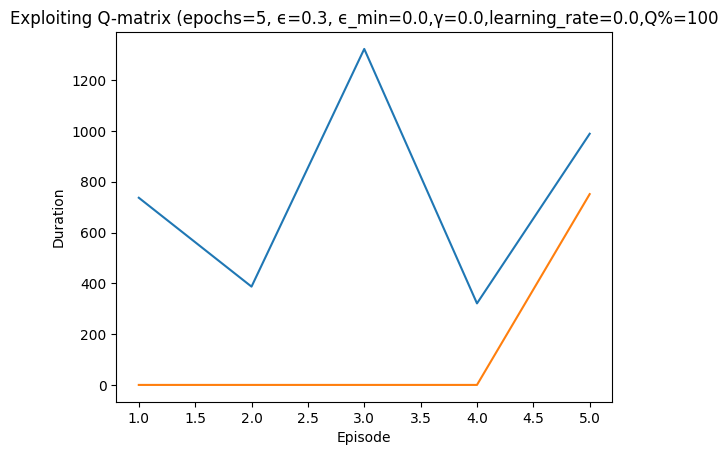

In [12]:
nolearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.30,  # 0.35,
    render=False,
    title="Exploiting Q-matrix",
    verbosity=Verbosity.Quiet,
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  134.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  134.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  140.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  140.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  148.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  148.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  148.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  154.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  154.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 158|reward:  254.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 158|reward:  254.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 192|reward:  265.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 192|reward:  265.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  269.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  269.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 226|reward:  278.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 226|reward:  278.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 1|Iteration 227|reward:  280.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 1|Iteration 227|reward:  280.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 1|Iteration 270|reward:  380.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 1|Iteration 270|reward:  380.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 1|Iteration 289|reward:  391.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 1|Iteration 289|reward:  391.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 1|Iteration 308|reward:  400.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 1|Iteration 308|reward:  400.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 1|Iteration 314|reward:  406.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 1|Iteration 314|reward:  406.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  414.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  414.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 1|Iteration 369|reward:  414.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 1|Iteration 416|reward:  414.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 1|Iteration 445|reward:  514.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 1|Iteration 445|reward:  514.0|last_reward_at:  445|Elapsed Time: 0:00:00||

Episode 1|Iteration 472|reward:  528.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 1|Iteration 472|reward:  528.0|last_reward_at:  472|Elapsed Time: 0:00:01||

Episode 1|Iteration 483|reward:  532.0|last_reward_at:  472|Elapsed Time: 0:00:01||

Episode 1|Iteration 483|reward:  532.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 1|Iteration 507|reward:  534.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 1|Iteration 507|reward:  534.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 1|Iteration 508|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 1|Iteration 508|reward:  540.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 550|reward:  540.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 591|reward:  540.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 634|reward:  540.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 649|reward:  640.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 649|reward:  640.0|last_reward_at:  649|Elapsed Time: 0:00:01||

Episode 1|Iteration 657|reward:  654.0|last_reward_at:  649|Elapsed Time: 0:00:01||

Episode 1|Iteration 657|reward:  654.0|last_reward_at:  657|Elapsed Time: 0:00:01||

Episode 1|Iteration 660|reward:  660.0|last_reward_at:  657|Elapsed Time: 0:00:01||

Episode 1|Iteration 660|reward:  660.0|last_reward_at:  660|Elapsed Time: 0:00:01||

Episode 1|Iteration 684|reward:  660.0|last_reward_at:  660|Elapsed Time: 0:00:01||

Episode 1|Iteration 722|reward:  660.0|last_reward_at:  660|Elapsed Time: 0:00:01||

Episode 1|Iteration 746|reward:  668.0|last_reward_at:  660|Elapsed Time: 0:00:01||

Episode 1|Iteration 746|reward:  668.0|last_reward_at:  746|Elapsed Time: 0:00:01||

Episode 1|Iteration 766|reward:  674.0|last_reward_at:  746|Elapsed Time: 0:00:01||

Episode 1|Iteration 766|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:01||

Episode 1|Iteration 798|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:01||

Episode 1|Iteration 837|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:01||

Episode 1|Iteration 875|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 912|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 952|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 992|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 1026|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 1051|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 1064|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 1071|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 1085|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 1112|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:02||

Episode 1|Iteration 1140|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1167|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1196|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1230|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1254|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1278|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1295|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1320|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1353|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1384|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 1414|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1449|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1482|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1510|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1540|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1564|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1585|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1613|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1644|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1680|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 1|Iteration 1709|reward:  674.0|last_reward_at:  766|Elapsed Time: 0:00:05||

Episode 1|Iteration 1718|reward:  774.0|last_reward_at:  766|Elapsed Time: 0:00:05||

Episode 1|Iteration 1718|reward:  774.0|last_reward_at: 1718|Elapsed Time: 0:00:05||

Episode 1|Iteration 1754|reward:  774.0|last_reward_at: 1718|Elapsed Time: 0:00:05||

Episode 1|Iteration 1762|reward:  788.0|last_reward_at: 1718|Elapsed Time: 0:00:05||

Episode 1|Iteration 1762|reward:  788.0|last_reward_at: 1762|Elapsed Time: 0:00:05||

Episode 1|Iteration 1775|reward:  888.0|last_reward_at: 1762|Elapsed Time: 0:00:05||

Episode 1|Iteration 1775|reward:  888.0|last_reward_at: 1775|Elapsed Time: 0:00:05||

Episode 1|Iteration 1799|reward:  894.0|last_reward_at: 1775|Elapsed Time: 0:00:05||

Episode 1|Iteration 1799|reward:  894.0|last_reward_at: 1799|Elapsed Time: 0:00:05||

Episode 1|Iteration 1803|reward:  896.0|last_reward_at: 1799|Elapsed Time: 0:00:05||

Episode 1|Iteration 1803|reward:  896.0|last_reward_at: 1803|Elapsed Time: 0:00:05||

Episode 1|Iteration 1823|reward:  896.0|last_reward_at: 1803|Elapsed Time: 0:00:05||

Episode 1|Iteration 1854|reward:  896.0|last_reward_at: 1803|Elapsed Time: 0:00:05||

Episode 1|Iteration 1869|reward:  907.0|last_reward_at: 1803|Elapsed Time: 0:00:05||

Episode 1|Iteration 1869|reward:  907.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 1882|reward:  909.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 1882|reward:  909.0|last_reward_at: 1882|Elapsed Time: 0:00:05||

Episode 1|Iteration 1912|reward:  918.0|last_reward_at: 1882|Elapsed Time: 0:00:05||

Episode 1|Iteration 1912|reward:  918.0|last_reward_at: 1912|Elapsed Time: 0:00:05||

Episode 1|Iteration 1937|reward:  918.0|last_reward_at: 1912|Elapsed Time: 0:00:05||

Episode 1|Iteration 1965|reward:  926.0|last_reward_at: 1912|Elapsed Time: 0:00:05||

Episode 1|Iteration 1965|reward:  926.0|last_reward_at: 1965|Elapsed Time: 0:00:05||

Episode 1|Iteration 1998|reward:  926.0|last_reward_at: 1965|Elapsed Time: 0:00:05||

Episode 1|Iteration 2027|reward:  926.0|last_reward_at: 1965|Elapsed Time: 0:00:06||

Episode 1|Iteration 2051|reward:  926.0|last_reward_at: 1965|Elapsed Time: 0:00:06||

Episode 1|Iteration 2053|reward:  932.0|last_reward_at: 1965|Elapsed Time: 0:00:06||

Episode 1|Iteration 2053|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2082|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2108|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2138|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2165|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2191|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2220|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2251|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2279|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2300|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2324|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2353|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2380|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2392|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2404|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2409|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2422|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2435|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2448|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:07||

Episode 1|Iteration 2465|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2482|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2495|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2507|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2523|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2544|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2566|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2583|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2601|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2620|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:08||

Episode 1|Iteration 2640|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2660|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2681|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2705|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2730|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2752|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2777|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2803|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2829|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2849|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:09||

Episode 1|Iteration 2874|reward:  932.0|last_reward_at: 2053|Elapsed Time: 0:00:10||

Episode 1|Iteration 2877|reward: 1032.0|last_reward_at: 2053|Elapsed Time: 0:00:10||

Episode 1|Iteration 2877|reward: 1032.0|last_reward_at: 2877|Elapsed Time: 0:00:10||

Episode 1|Iteration 2904|reward: 1032.0|last_reward_at: 2877|Elapsed Time: 0:00:10||

Episode 1|Iteration 2933|reward: 1032.0|last_reward_at: 2877|Elapsed Time: 0:00:10||

Episode 1|Iteration 2963|reward: 1032.0|last_reward_at: 2877|Elapsed Time: 0:00:10||

Episode 1|Iteration 2985|reward: 1046.0|last_reward_at: 2877|Elapsed Time: 0:00:10||

Episode 1|Iteration 2985|reward: 1046.0|last_reward_at: 2985|Elapsed Time: 0:00:10||

Episode 1|Iteration 3015|reward: 1046.0|last_reward_at: 2985|Elapsed Time: 0:00:10||

Episode 1|Iteration 3028|reward: 1052.0|last_reward_at: 2985|Elapsed Time: 0:00:10||

Episode 1|Iteration 3028|reward: 1052.0|last_reward_at: 3028|Elapsed Time: 0:00:10||

Episode 1|Iteration 3037|reward: 1056.0|last_reward_at: 3028|Elapsed Time: 0:00:10||

Episode 1|Iteration 3037|reward: 1056.0|last_reward_at: 3037|Elapsed Time: 0:00:10||

Episode 1|Iteration 3065|reward: 1056.0|last_reward_at: 3037|Elapsed Time: 0:00:10||

Episode 1|Iteration 3084|reward: 1056.0|last_reward_at: 3037|Elapsed Time: 0:00:10||

Episode 1|Iteration 3094|reward: 1058.0|last_reward_at: 3037|Elapsed Time: 0:00:10||

Episode 1|Iteration 3094|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:10||

Episode 1|Iteration 3114|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3136|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3158|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3180|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3204|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3227|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3250|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3273|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3298|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3325|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:11||

Episode 1|Iteration 3354|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3380|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3409|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3436|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3464|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3490|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3516|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3532|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3554|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3580|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:12||

Episode 1|Iteration 3607|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3634|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3660|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3688|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3718|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3748|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3770|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3794|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3818|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3846|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:13||

Episode 1|Iteration 3874|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 3902|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 3927|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 3957|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 3987|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 4018|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 4045|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 4076|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 4102|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 4131|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:14||

Episode 1|Iteration 4161|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4191|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4216|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4244|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4275|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4306|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4330|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4358|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4382|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4412|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:15||

Episode 1|Iteration 4432|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4461|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4491|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4521|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4550|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4579|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4609|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4639|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4668|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4698|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:16||

Episode 1|Iteration 4723|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 4750|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 4775|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 4804|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 4829|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 4859|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 4887|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 4917|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 4947|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 4976|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 1|Iteration 5006|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5034|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5058|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5076|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5106|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5127|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5156|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5186|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5203|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5233|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:18||

Episode 1|Iteration 5261|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:19||

Episode 1|Iteration 5288|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:19||

Episode 1|Iteration 5318|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:19||

Episode 1|Iteration 5348|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:19||

Episode 1|Iteration 5379|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:19||

Episode 1|Iteration 5410|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:19||

Episode 1|Iteration 5439|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:19||

Episode 1|Iteration 5468|reward: 1058.0|last_reward_at: 3094|Elapsed Time: 0:00:19||

Episode 1|Iteration 5496|reward: 1158.0|last_reward_at: 3094|Elapsed Time: 0:00:19||

Episode 1|Iteration 5496|reward: 1158.0|last_reward_at: 5496|Elapsed Time: 0:00:19||

Episode 1|Iteration 5524|reward: 1158.0|last_reward_at: 5496|Elapsed Time: 0:00:19||

Episode 1|Iteration 5538|reward: 1169.0|last_reward_at: 5496|Elapsed Time: 0:00:19||

Episode 1|Iteration 5538|reward: 1169.0|last_reward_at: 5538|Elapsed Time: 0:00:19||

Episode 1|Iteration 5557|reward: 1177.0|last_reward_at: 5538|Elapsed Time: 0:00:20||

Episode 1|Iteration 5557|reward: 1177.0|last_reward_at: 5557|Elapsed Time: 0:00:20||

Episode 1|Iteration 5572|reward: 1183.0|last_reward_at: 5557|Elapsed Time: 0:00:20||

Episode 1|Iteration 5572|reward: 1183.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5598|reward: 1183.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5625|reward: 1183.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5652|reward: 1183.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5676|reward: 1183.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5697|reward: 1183.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5723|reward: 1183.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5748|reward: 1183.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5771|reward: 1183.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5785|reward: 1192.0|last_reward_at: 5572|Elapsed Time: 0:00:20||

Episode 1|Iteration 5785|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:20||

Episode 1|Iteration 5811|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 5835|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 5861|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 5888|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 5911|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 5938|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 5964|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 5991|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 6017|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 6038|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:21||

Episode 1|Iteration 6063|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6089|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6115|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6142|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6169|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6194|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6220|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6247|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6266|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6290|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:22||

Episode 1|Iteration 6315|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:23||

Episode 1|Iteration 6341|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:23||

Episode 1|Iteration 6367|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:23||

Episode 1|Iteration 6393|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:23||

Episode 1|Iteration 6419|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:23||

Episode 1|Iteration 6446|reward: 1192.0|last_reward_at: 5785|Elapsed Time: 0:00:23||

Episode 1|Iteration 6451|reward: 1292.0|last_reward_at: 5785|Elapsed Time: 0:00:23||

Episode 1|Iteration 6451|reward: 1292.0|last_reward_at: 6451|Elapsed Time: 0:00:23||

Episode 1|Iteration 6477|reward: 1292.0|last_reward_at: 6451|Elapsed Time: 0:00:23||

Episode 1|Iteration 6494|reward: 1292.0|last_reward_at: 6451|Elapsed Time: 0:00:23||

Episode 1|Iteration 6519|reward: 1292.0|last_reward_at: 6451|Elapsed Time: 0:00:23||

Episode 1|Iteration 6531|reward: 1306.0|last_reward_at: 6451|Elapsed Time: 0:00:23||

Episode 1|Iteration 6531|reward: 1306.0|last_reward_at: 6531|Elapsed Time: 0:00:23||

Episode 1|Iteration 6557|reward: 1306.0|last_reward_at: 6531|Elapsed Time: 0:00:24||

Episode 1|Iteration 6583|reward: 1306.0|last_reward_at: 6531|Elapsed Time: 0:00:24||

Episode 1|Iteration 6608|reward: 1306.0|last_reward_at: 6531|Elapsed Time: 0:00:24||

Episode 1|Iteration 6633|reward: 1306.0|last_reward_at: 6531|Elapsed Time: 0:00:24||

Episode 1|Iteration 6657|reward: 1306.0|last_reward_at: 6531|Elapsed Time: 0:00:24||

Episode 1|Iteration 6683|reward: 1306.0|last_reward_at: 6531|Elapsed Time: 0:00:24||

Episode 1|Iteration 6707|reward: 1306.0|last_reward_at: 6531|Elapsed Time: 0:00:24||

Episode 1|Iteration 6722|reward: 1306.0|last_reward_at: 6531|Elapsed Time: 0:00:24||

Episode 1|Iteration 6727|reward: 1312.0|last_reward_at: 6531|Elapsed Time: 0:00:24||

Episode 1|Iteration 6727|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:24||

Episode 1|Iteration 6753|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:24||

Episode 1|Iteration 6779|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:24||

Episode 1|Iteration 6804|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 6829|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 6855|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 6881|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 6906|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 6931|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 6950|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 6974|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 6999|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 7024|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:25||

Episode 1|Iteration 7047|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7064|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7087|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7112|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7137|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7162|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7178|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7201|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7226|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7250|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7274|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:26||

Episode 1|Iteration 7292|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7316|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7340|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7365|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7389|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7406|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7430|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7454|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7479|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7504|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7519|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:27||

Episode 1|Iteration 7543|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7568|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7593|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7618|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7633|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7654|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7678|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7702|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7727|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7747|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:28||

Episode 1|Iteration 7770|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:29||

Episode 1|Iteration 7792|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:29||

Episode 1|Iteration 7817|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:29||

Episode 1|Iteration 7843|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:29||

Episode 1|Iteration 7861|reward: 1312.0|last_reward_at: 6727|Elapsed Time: 0:00:29||

Episode 1|Iteration 7873|reward: 6312.0|last_reward_at: 6727|Elapsed Time: 0:00:29||

Episode 1|Iteration 7873|reward: 6312.0|last_reward_at: 7873|Elapsed Time: 0:00:29||

  Episode 1 ended at t=7873 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2250 (0.01)
    explore-remote: 20/2796 (0.01)
    explore-connect: 11/2775 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  120.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  131.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  131.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 103|reward:  139.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 103|reward:  139.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 2|Iteration 105|reward:  145.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 2|Iteration 105|reward:  145.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  154.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  154.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 179|reward:  154.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  154.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 284|reward:  154.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 302|reward:  254.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 302|reward:  254.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 2|Iteration 313|reward:  268.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 2|Iteration 313|reward:  268.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 316|reward:  270.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 316|reward:  270.0|last_reward_at:  316|Elapsed Time: 0:00:00||

Episode 2|Iteration 319|reward:  276.0|last_reward_at:  316|Elapsed Time: 0:00:00||

Episode 2|Iteration 319|reward:  276.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 2|Iteration 361|reward:  280.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 2|Iteration 361|reward:  280.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 2|Iteration 408|reward:  280.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 2|Iteration 453|reward:  380.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 2|Iteration 453|reward:  380.0|last_reward_at:  453|Elapsed Time: 0:00:00||

Episode 2|Iteration 475|reward:  394.0|last_reward_at:  453|Elapsed Time: 0:00:00||

Episode 2|Iteration 475|reward:  394.0|last_reward_at:  475|Elapsed Time: 0:00:00||

Episode 2|Iteration 488|reward:  402.0|last_reward_at:  475|Elapsed Time: 0:00:00||

Episode 2|Iteration 488|reward:  402.0|last_reward_at:  488|Elapsed Time: 0:00:00||

Episode 2|Iteration 512|reward:  408.0|last_reward_at:  488|Elapsed Time: 0:00:01||

Episode 2|Iteration 512|reward:  408.0|last_reward_at:  512|Elapsed Time: 0:00:01||

Episode 2|Iteration 556|reward:  408.0|last_reward_at:  512|Elapsed Time: 0:00:01||

Episode 2|Iteration 566|reward:  414.0|last_reward_at:  512|Elapsed Time: 0:00:01||

Episode 2|Iteration 566|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 613|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 659|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 684|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 728|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 767|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 798|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 844|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 890|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 937|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 2|Iteration 980|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1020|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1065|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1111|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1140|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1183|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1220|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1254|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1299|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1344|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1368|reward:  414.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1371|reward:  514.0|last_reward_at:  566|Elapsed Time: 0:00:03||

Episode 2|Iteration 1371|reward:  514.0|last_reward_at: 1371|Elapsed Time: 0:00:03||

Episode 2|Iteration 1387|reward:  525.0|last_reward_at: 1371|Elapsed Time: 0:00:03||

Episode 2|Iteration 1387|reward:  525.0|last_reward_at: 1387|Elapsed Time: 0:00:03||

Episode 2|Iteration 1408|reward:  529.0|last_reward_at: 1387|Elapsed Time: 0:00:03||

Episode 2|Iteration 1408|reward:  529.0|last_reward_at: 1408|Elapsed Time: 0:00:03||

Episode 2|Iteration 1428|reward:  531.0|last_reward_at: 1408|Elapsed Time: 0:00:03||

Episode 2|Iteration 1428|reward:  531.0|last_reward_at: 1428|Elapsed Time: 0:00:03||

Episode 2|Iteration 1439|reward:  540.0|last_reward_at: 1428|Elapsed Time: 0:00:03||

Episode 2|Iteration 1439|reward:  540.0|last_reward_at: 1439|Elapsed Time: 0:00:03||

Episode 2|Iteration 1481|reward:  540.0|last_reward_at: 1439|Elapsed Time: 0:00:03||

Episode 2|Iteration 1524|reward:  540.0|last_reward_at: 1439|Elapsed Time: 0:00:03||

Episode 2|Iteration 1566|reward:  540.0|last_reward_at: 1439|Elapsed Time: 0:00:03||

Episode 2|Iteration 1595|reward:  540.0|last_reward_at: 1439|Elapsed Time: 0:00:03||

Episode 2|Iteration 1636|reward:  540.0|last_reward_at: 1439|Elapsed Time: 0:00:03||

Episode 2|Iteration 1678|reward:  540.0|last_reward_at: 1439|Elapsed Time: 0:00:03||

Episode 2|Iteration 1709|reward:  540.0|last_reward_at: 1439|Elapsed Time: 0:00:03||

Episode 2|Iteration 1713|reward:  640.0|last_reward_at: 1439|Elapsed Time: 0:00:03||

Episode 2|Iteration 1713|reward:  640.0|last_reward_at: 1713|Elapsed Time: 0:00:03||

Episode 2|Iteration 1726|reward:  654.0|last_reward_at: 1713|Elapsed Time: 0:00:03||

Episode 2|Iteration 1726|reward:  654.0|last_reward_at: 1726|Elapsed Time: 0:00:03||

Episode 2|Iteration 1732|reward:  662.0|last_reward_at: 1726|Elapsed Time: 0:00:03||

Episode 2|Iteration 1732|reward:  662.0|last_reward_at: 1732|Elapsed Time: 0:00:03||

Episode 2|Iteration 1740|reward:  668.0|last_reward_at: 1732|Elapsed Time: 0:00:03||

Episode 2|Iteration 1740|reward:  668.0|last_reward_at: 1740|Elapsed Time: 0:00:03||

Episode 2|Iteration 1780|reward:  668.0|last_reward_at: 1740|Elapsed Time: 0:00:04||

Episode 2|Iteration 1818|reward:  668.0|last_reward_at: 1740|Elapsed Time: 0:00:04||

Episode 2|Iteration 1858|reward:  668.0|last_reward_at: 1740|Elapsed Time: 0:00:04||

Episode 2|Iteration 1881|reward:  674.0|last_reward_at: 1740|Elapsed Time: 0:00:04||

Episode 2|Iteration 1881|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:04||

Episode 2|Iteration 1921|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:04||

Episode 2|Iteration 1961|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:04||

Episode 2|Iteration 2001|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:04||

Episode 2|Iteration 2041|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:04||

Episode 2|Iteration 2081|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:04||

Episode 2|Iteration 2121|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:04||

Episode 2|Iteration 2160|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:04||

Episode 2|Iteration 2199|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2238|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2278|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2318|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2357|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2393|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2431|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2469|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2507|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2544|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:05||

Episode 2|Iteration 2578|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2614|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2653|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2693|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2732|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2771|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2811|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2849|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2888|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2928|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2963|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 2999|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 3038|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 3076|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 3114|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 3152|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 3190|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 3228|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 3267|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 3304|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:07||

Episode 2|Iteration 3342|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3376|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3415|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3451|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3485|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3518|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3557|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3595|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3633|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3672|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:08||

Episode 2|Iteration 3707|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:09||

Episode 2|Iteration 3744|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:09||

Episode 2|Iteration 3783|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:09||

Episode 2|Iteration 3822|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:09||

Episode 2|Iteration 3861|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:09||

Episode 2|Iteration 3899|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:09||

Episode 2|Iteration 3932|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:09||

Episode 2|Iteration 3960|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:09||

Episode 2|Iteration 3978|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:09||

Episode 2|Iteration 3995|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4015|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4038|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4065|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4097|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4127|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4158|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4193|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4216|reward:  674.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4227|reward:  774.0|last_reward_at: 1881|Elapsed Time: 0:00:10||

Episode 2|Iteration 4227|reward:  774.0|last_reward_at: 4227|Elapsed Time: 0:00:10||

Episode 2|Iteration 4233|reward:  788.0|last_reward_at: 4227|Elapsed Time: 0:00:10||

Episode 2|Iteration 4233|reward:  788.0|last_reward_at: 4233|Elapsed Time: 0:00:10||

Episode 2|Iteration 4264|reward:  788.0|last_reward_at: 4233|Elapsed Time: 0:00:10||

Episode 2|Iteration 4267|reward:  792.0|last_reward_at: 4233|Elapsed Time: 0:00:10||

Episode 2|Iteration 4267|reward:  792.0|last_reward_at: 4267|Elapsed Time: 0:00:10||

Episode 2|Iteration 4272|reward:  798.0|last_reward_at: 4267|Elapsed Time: 0:00:10||

Episode 2|Iteration 4272|reward:  798.0|last_reward_at: 4272|Elapsed Time: 0:00:10||

Episode 2|Iteration 4304|reward:  798.0|last_reward_at: 4272|Elapsed Time: 0:00:11||

Episode 2|Iteration 4322|reward:  800.0|last_reward_at: 4272|Elapsed Time: 0:00:11||

Episode 2|Iteration 4322|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:11||

Episode 2|Iteration 4353|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:11||

Episode 2|Iteration 4387|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:11||

Episode 2|Iteration 4417|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:11||

Episode 2|Iteration 4444|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:11||

Episode 2|Iteration 4476|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:11||

Episode 2|Iteration 4506|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:11||

Episode 2|Iteration 4537|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:11||

Episode 2|Iteration 4557|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:11||

Episode 2|Iteration 4589|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4620|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4652|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4671|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4700|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4731|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4761|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4785|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4812|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4841|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4870|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:12||

Episode 2|Iteration 4899|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 4928|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 4957|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 4987|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 5013|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 5045|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 5075|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 5106|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 5127|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 5158|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:13||

Episode 2|Iteration 5190|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5221|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5241|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5272|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5302|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5333|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5355|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5386|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5415|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5445|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5469|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:14||

Episode 2|Iteration 5498|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5522|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5547|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5573|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5600|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5624|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5643|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5669|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5694|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5718|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:15||

Episode 2|Iteration 5742|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 5763|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 5792|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 5811|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 5836|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 5865|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 5894|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 5922|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 5948|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 5975|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:16||

Episode 2|Iteration 6008|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6036|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6067|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6099|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6131|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6152|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6182|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6214|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6245|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6266|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6299|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:17||

Episode 2|Iteration 6331|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6362|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6380|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6413|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6446|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6478|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6512|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6546|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6579|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6608|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:18||

Episode 2|Iteration 6639|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6667|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6694|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6722|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6749|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6780|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6810|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6836|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6865|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6898|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:19||

Episode 2|Iteration 6932|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 6950|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 6977|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 7008|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 7041|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 7064|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 7095|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 7125|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 7145|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 7167|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 7189|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:20||

Episode 2|Iteration 7211|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7232|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7257|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7282|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7309|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7336|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7363|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7391|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7406|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7433|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:21||

Episode 2|Iteration 7457|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7481|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7505|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7533|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7560|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7588|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7615|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7633|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7663|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7696|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:22||

Episode 2|Iteration 7729|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 7747|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 7767|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 7798|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 7830|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 7861|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 7893|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 7921|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 7954|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 7975|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 8007|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:23||

Episode 2|Iteration 8040|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8071|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8089|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8122|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8155|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8188|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8221|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8252|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8285|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8317|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:24||

Episode 2|Iteration 8348|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:25||

Episode 2|Iteration 8377|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:25||

Episode 2|Iteration 8408|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:25||

Episode 2|Iteration 8431|reward:  800.0|last_reward_at: 4322|Elapsed Time: 0:00:25||

Episode 2|Iteration 8431|reward:  900.0|last_reward_at: 4322|Elapsed Time: 0:00:25||

Episode 2|Iteration 8431|reward:  900.0|last_reward_at: 8431|Elapsed Time: 0:00:25||

Episode 2|Iteration 8452|reward:  914.0|last_reward_at: 8431|Elapsed Time: 0:00:25||

Episode 2|Iteration 8452|reward:  914.0|last_reward_at: 8452|Elapsed Time: 0:00:25||

Episode 2|Iteration 8458|reward:  922.0|last_reward_at: 8452|Elapsed Time: 0:00:25||

Episode 2|Iteration 8458|reward:  922.0|last_reward_at: 8458|Elapsed Time: 0:00:25||

Episode 2|Iteration 8459|reward:  928.0|last_reward_at: 8458|Elapsed Time: 0:00:25||

Episode 2|Iteration 8459|reward:  928.0|last_reward_at: 8459|Elapsed Time: 0:00:25||

Episode 2|Iteration 8489|reward:  928.0|last_reward_at: 8459|Elapsed Time: 0:00:25||

Episode 2|Iteration 8518|reward:  928.0|last_reward_at: 8459|Elapsed Time: 0:00:25||

Episode 2|Iteration 8545|reward:  928.0|last_reward_at: 8459|Elapsed Time: 0:00:25||

Episode 2|Iteration 8550|reward:  934.0|last_reward_at: 8459|Elapsed Time: 0:00:25||

Episode 2|Iteration 8550|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:25||

Episode 2|Iteration 8579|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:25||

Episode 2|Iteration 8606|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:25||

Episode 2|Iteration 8637|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8659|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8688|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8717|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8746|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8773|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8801|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8831|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8861|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8887|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8916|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:26||

Episode 2|Iteration 8946|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:27||

Episode 2|Iteration 8976|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:27||

Episode 2|Iteration 9000|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:27||

Episode 2|Iteration 9000|reward:  934.0|last_reward_at: 8550|Elapsed Time: 0:00:27||

  Episode 2 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/2402 (0.01)
    explore-remote: 16/3321 (0.00)
    explore-connect: 7/3239 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  120.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  134.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  134.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  140.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  140.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  148.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  148.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  154.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  154.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 103|reward:  154.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 150|reward:  154.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 183|reward:  254.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 183|reward:  254.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  268.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  268.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 204|reward:  270.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 204|reward:  270.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  274.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  274.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 3|Iteration 240|reward:  280.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 3|Iteration 240|reward:  280.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 3|Iteration 290|reward:  280.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 3|Iteration 334|reward:  380.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 3|Iteration 334|reward:  380.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 3|Iteration 344|reward:  394.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 3|Iteration 344|reward:  394.0|last_reward_at:  344|Elapsed Time: 0:00:00||

Episode 3|Iteration 355|reward:  402.0|last_reward_at:  344|Elapsed Time: 0:00:00||

Episode 3|Iteration 355|reward:  402.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 3|Iteration 398|reward:  402.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 3|Iteration 430|reward:  408.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 3|Iteration 430|reward:  408.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 3|Iteration 433|reward:  414.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 3|Iteration 433|reward:  414.0|last_reward_at:  433|Elapsed Time: 0:00:00||

Episode 3|Iteration 478|reward:  414.0|last_reward_at:  433|Elapsed Time: 0:00:01||

Episode 3|Iteration 497|reward:  514.0|last_reward_at:  433|Elapsed Time: 0:00:01||

Episode 3|Iteration 497|reward:  514.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 3|Iteration 538|reward:  514.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 3|Iteration 539|reward:  525.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 3|Iteration 539|reward:  525.0|last_reward_at:  539|Elapsed Time: 0:00:01||

Episode 3|Iteration 552|reward:  534.0|last_reward_at:  539|Elapsed Time: 0:00:01||

Episode 3|Iteration 552|reward:  534.0|last_reward_at:  552|Elapsed Time: 0:00:01||

Episode 3|Iteration 561|reward:  634.0|last_reward_at:  552|Elapsed Time: 0:00:01||

Episode 3|Iteration 561|reward:  634.0|last_reward_at:  561|Elapsed Time: 0:00:01||

Episode 3|Iteration 569|reward:  636.0|last_reward_at:  561|Elapsed Time: 0:00:01||

Episode 3|Iteration 569|reward:  636.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 3|Iteration 577|reward:  638.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 3|Iteration 577|reward:  638.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 3|Iteration 609|reward:  638.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 3|Iteration 637|reward:  649.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 3|Iteration 637|reward:  649.0|last_reward_at:  637|Elapsed Time: 0:00:01||

Episode 3|Iteration 639|reward:  657.0|last_reward_at:  637|Elapsed Time: 0:00:01||

Episode 3|Iteration 639|reward:  657.0|last_reward_at:  639|Elapsed Time: 0:00:01||

Episode 3|Iteration 645|reward:  663.0|last_reward_at:  639|Elapsed Time: 0:00:01||

Episode 3|Iteration 645|reward:  663.0|last_reward_at:  645|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward:  663.0|last_reward_at:  645|Elapsed Time: 0:00:01||

Episode 3|Iteration 691|reward:  672.0|last_reward_at:  645|Elapsed Time: 0:00:01||

Episode 3|Iteration 691|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:01||

Episode 3|Iteration 731|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:01||

Episode 3|Iteration 768|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:01||

Episode 3|Iteration 798|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:01||

Episode 3|Iteration 837|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 875|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 906|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 936|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 967|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 1004|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 1026|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 1049|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 1074|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 1097|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 1133|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:02||

Episode 3|Iteration 1167|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1201|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1234|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1254|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1282|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1320|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1359|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1395|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1430|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1465|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 3|Iteration 1500|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:04||

Episode 3|Iteration 1529|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:04||

Episode 3|Iteration 1559|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:04||

Episode 3|Iteration 1589|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:04||

Episode 3|Iteration 1624|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:04||

Episode 3|Iteration 1657|reward:  672.0|last_reward_at:  691|Elapsed Time: 0:00:04||

Episode 3|Iteration 1690|reward:  772.0|last_reward_at:  691|Elapsed Time: 0:00:04||

Episode 3|Iteration 1690|reward:  772.0|last_reward_at: 1690|Elapsed Time: 0:00:04||

Episode 3|Iteration 1698|reward:  783.0|last_reward_at: 1690|Elapsed Time: 0:00:04||

Episode 3|Iteration 1698|reward:  783.0|last_reward_at: 1698|Elapsed Time: 0:00:04||

Episode 3|Iteration 1719|reward:  792.0|last_reward_at: 1698|Elapsed Time: 0:00:04||

Episode 3|Iteration 1719|reward:  792.0|last_reward_at: 1719|Elapsed Time: 0:00:04||

Episode 3|Iteration 1721|reward:  796.0|last_reward_at: 1719|Elapsed Time: 0:00:04||

Episode 3|Iteration 1721|reward:  796.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 3|Iteration 1755|reward:  796.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 3|Iteration 1790|reward:  796.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 3|Iteration 1823|reward:  796.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 3|Iteration 1854|reward:  796.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 3|Iteration 1873|reward:  798.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 3|Iteration 1873|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:05||

Episode 3|Iteration 1908|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:05||

Episode 3|Iteration 1937|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:05||

Episode 3|Iteration 1972|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:05||

Episode 3|Iteration 2007|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:05||

Episode 3|Iteration 2042|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:05||

Episode 3|Iteration 2077|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:05||

Episode 3|Iteration 2111|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:05||

Episode 3|Iteration 2147|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:05||

Episode 3|Iteration 2183|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2218|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2254|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2279|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2314|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2349|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2385|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2420|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2454|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2490|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:06||

Episode 3|Iteration 2526|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2560|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2595|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2621|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2656|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2692|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2727|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2763|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2797|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2832|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:07||

Episode 3|Iteration 2868|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:08||

Episode 3|Iteration 2903|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:08||

Episode 3|Iteration 2938|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:08||

Episode 3|Iteration 2963|reward:  798.0|last_reward_at: 1873|Elapsed Time: 0:00:08||

Episode 3|Iteration 2977|reward:  898.0|last_reward_at: 1873|Elapsed Time: 0:00:08||

Episode 3|Iteration 2977|reward:  898.0|last_reward_at: 2977|Elapsed Time: 0:00:08||

Episode 3|Iteration 3011|reward:  898.0|last_reward_at: 2977|Elapsed Time: 0:00:08||

Episode 3|Iteration 3044|reward:  898.0|last_reward_at: 2977|Elapsed Time: 0:00:08||

Episode 3|Iteration 3076|reward:  898.0|last_reward_at: 2977|Elapsed Time: 0:00:08||

Episode 3|Iteration 3108|reward:  898.0|last_reward_at: 2977|Elapsed Time: 0:00:08||

Episode 3|Iteration 3111|reward:  912.0|last_reward_at: 2977|Elapsed Time: 0:00:08||

Episode 3|Iteration 3111|reward:  912.0|last_reward_at: 3111|Elapsed Time: 0:00:08||

Episode 3|Iteration 3125|reward:  918.0|last_reward_at: 3111|Elapsed Time: 0:00:08||

Episode 3|Iteration 3125|reward:  918.0|last_reward_at: 3125|Elapsed Time: 0:00:08||

Episode 3|Iteration 3142|reward:  926.0|last_reward_at: 3125|Elapsed Time: 0:00:08||

Episode 3|Iteration 3142|reward:  926.0|last_reward_at: 3142|Elapsed Time: 0:00:08||

Episode 3|Iteration 3166|reward:  926.0|last_reward_at: 3142|Elapsed Time: 0:00:09||

Episode 3|Iteration 3190|reward:  926.0|last_reward_at: 3142|Elapsed Time: 0:00:09||

Episode 3|Iteration 3222|reward:  926.0|last_reward_at: 3142|Elapsed Time: 0:00:09||

Episode 3|Iteration 3254|reward:  926.0|last_reward_at: 3142|Elapsed Time: 0:00:09||

Episode 3|Iteration 3264|reward:  932.0|last_reward_at: 3142|Elapsed Time: 0:00:09||

Episode 3|Iteration 3264|reward:  932.0|last_reward_at: 3264|Elapsed Time: 0:00:09||

Episode 3|Iteration 3297|reward:  932.0|last_reward_at: 3264|Elapsed Time: 0:00:09||

Episode 3|Iteration 3329|reward:  932.0|last_reward_at: 3264|Elapsed Time: 0:00:09||

Episode 3|Iteration 3360|reward:  932.0|last_reward_at: 3264|Elapsed Time: 0:00:09||

Episode 3|Iteration 3392|reward:  932.0|last_reward_at: 3264|Elapsed Time: 0:00:09||

Episode 3|Iteration 3418|reward:  932.0|last_reward_at: 3264|Elapsed Time: 0:00:09||

Episode 3|Iteration 3448|reward:  932.0|last_reward_at: 3264|Elapsed Time: 0:00:09||

Episode 3|Iteration 3477|reward: 1032.0|last_reward_at: 3264|Elapsed Time: 0:00:10||

Episode 3|Iteration 3477|reward: 1032.0|last_reward_at: 3477|Elapsed Time: 0:00:10||

Episode 3|Iteration 3499|reward: 1043.0|last_reward_at: 3477|Elapsed Time: 0:00:10||

Episode 3|Iteration 3499|reward: 1043.0|last_reward_at: 3499|Elapsed Time: 0:00:10||

Episode 3|Iteration 3521|reward: 1045.0|last_reward_at: 3499|Elapsed Time: 0:00:10||

Episode 3|Iteration 3521|reward: 1045.0|last_reward_at: 3521|Elapsed Time: 0:00:10||

Episode 3|Iteration 3531|reward: 1054.0|last_reward_at: 3521|Elapsed Time: 0:00:10||

Episode 3|Iteration 3531|reward: 1054.0|last_reward_at: 3531|Elapsed Time: 0:00:10||

Episode 3|Iteration 3549|reward: 1058.0|last_reward_at: 3531|Elapsed Time: 0:00:10||

Episode 3|Iteration 3549|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:10||

Episode 3|Iteration 3579|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:10||

Episode 3|Iteration 3609|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:10||

Episode 3|Iteration 3640|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:10||

Episode 3|Iteration 3671|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:10||

Episode 3|Iteration 3703|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:10||

Episode 3|Iteration 3732|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:10||

Episode 3|Iteration 3760|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:10||

Episode 3|Iteration 3790|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 3819|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 3844|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 3868|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 3892|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 3914|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 3939|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 3969|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 3988|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 4015|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:11||

Episode 3|Iteration 4040|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4067|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4095|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4126|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4156|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4185|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4215|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4245|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4271|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4300|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:12||

Episode 3|Iteration 4330|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4359|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4389|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4419|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4444|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4474|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4504|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4534|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4557|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4586|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:13||

Episode 3|Iteration 4616|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4646|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4671|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4700|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4730|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4759|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4785|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4811|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4839|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4869|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:14||

Episode 3|Iteration 4899|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:15||

Episode 3|Iteration 4927|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:15||

Episode 3|Iteration 4955|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:15||

Episode 3|Iteration 4981|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:15||

Episode 3|Iteration 5011|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:15||

Episode 3|Iteration 5041|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:15||

Episode 3|Iteration 5070|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:15||

Episode 3|Iteration 5100|reward: 1058.0|last_reward_at: 3549|Elapsed Time: 0:00:15||

Episode 3|Iteration 5125|reward: 1158.0|last_reward_at: 3549|Elapsed Time: 0:00:15||

Episode 3|Iteration 5125|reward: 1158.0|last_reward_at: 5125|Elapsed Time: 0:00:15||

Episode 3|Iteration 5126|reward: 1169.0|last_reward_at: 5125|Elapsed Time: 0:00:15||

Episode 3|Iteration 5126|reward: 1169.0|last_reward_at: 5126|Elapsed Time: 0:00:15||

Episode 3|Iteration 5153|reward: 1169.0|last_reward_at: 5126|Elapsed Time: 0:00:15||

Episode 3|Iteration 5154|reward: 1177.0|last_reward_at: 5126|Elapsed Time: 0:00:15||

Episode 3|Iteration 5154|reward: 1177.0|last_reward_at: 5154|Elapsed Time: 0:00:15||

Episode 3|Iteration 5180|reward: 1177.0|last_reward_at: 5154|Elapsed Time: 0:00:16||

Episode 3|Iteration 5182|reward: 1183.0|last_reward_at: 5154|Elapsed Time: 0:00:16||

Episode 3|Iteration 5182|reward: 1183.0|last_reward_at: 5182|Elapsed Time: 0:00:16||

Episode 3|Iteration 5209|reward: 1183.0|last_reward_at: 5182|Elapsed Time: 0:00:16||

Episode 3|Iteration 5236|reward: 1183.0|last_reward_at: 5182|Elapsed Time: 0:00:16||

Episode 3|Iteration 5262|reward: 1183.0|last_reward_at: 5182|Elapsed Time: 0:00:16||

Episode 3|Iteration 5288|reward: 1183.0|last_reward_at: 5182|Elapsed Time: 0:00:16||

Episode 3|Iteration 5315|reward: 1183.0|last_reward_at: 5182|Elapsed Time: 0:00:16||

Episode 3|Iteration 5341|reward: 1183.0|last_reward_at: 5182|Elapsed Time: 0:00:16||

Episode 3|Iteration 5342|reward: 1192.0|last_reward_at: 5182|Elapsed Time: 0:00:16||

Episode 3|Iteration 5342|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:16||

Episode 3|Iteration 5369|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:16||

Episode 3|Iteration 5391|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:16||

Episode 3|Iteration 5413|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5436|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5462|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5488|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5514|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5539|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5565|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5583|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5607|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5631|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5657|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:17||

Episode 3|Iteration 5683|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:18||

Episode 3|Iteration 5709|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:18||

Episode 3|Iteration 5732|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:18||

Episode 3|Iteration 5749|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:18||

Episode 3|Iteration 5762|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:18||

Episode 3|Iteration 5781|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:18||

Episode 3|Iteration 5799|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:18||

Episode 3|Iteration 5821|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:18||

Episode 3|Iteration 5844|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:18||

Episode 3|Iteration 5868|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 5887|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 5904|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 5925|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 5949|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 5970|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 5994|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 6016|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 6038|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 6061|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:19||

Episode 3|Iteration 6084|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6107|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6129|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6151|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6176|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6201|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6223|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6248|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6266|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6279|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:20||

Episode 3|Iteration 6291|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6312|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6334|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6355|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6375|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6396|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6416|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6437|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6457|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6478|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:21||

Episode 3|Iteration 6494|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6516|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6539|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6562|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6586|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6606|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6628|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6648|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6670|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6693|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:22||

Episode 3|Iteration 6716|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6738|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6753|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6776|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6796|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6814|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6833|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6854|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6874|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6897|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:23||

Episode 3|Iteration 6919|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 6939|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 6961|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 6983|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 7006|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 7029|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 7049|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 7064|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 7085|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 7108|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:24||

Episode 3|Iteration 7133|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7158|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7178|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7199|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7220|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7239|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7263|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7287|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7309|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7333|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:25||

Episode 3|Iteration 7356|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7371|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7392|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7406|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7426|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7449|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7472|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7496|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7518|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7535|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:26||

Episode 3|Iteration 7559|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7583|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7607|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7631|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7657|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7680|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7704|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7729|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7747|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7771|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:27||

Episode 3|Iteration 7794|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 7818|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 7843|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 7861|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 7886|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 7911|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 7936|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 7961|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 7975|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 7998|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 8023|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:28||

Episode 3|Iteration 8046|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8070|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8089|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8113|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8138|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8163|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8188|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8203|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8226|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8251|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:29||

Episode 3|Iteration 8277|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8303|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8317|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8339|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8364|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8390|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8415|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8431|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8452|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8475|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8499|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:30||

Episode 3|Iteration 8524|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8545|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8568|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8590|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8613|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8637|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8659|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8683|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8707|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8732|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:31||

Episode 3|Iteration 8757|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8773|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8797|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8821|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8846|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8871|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8887|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8910|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8934|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8957|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:32||

Episode 3|Iteration 8979|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:33||

Episode 3|Iteration 9000|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:33||

Episode 3|Iteration 9000|reward: 1192.0|last_reward_at: 5342|Elapsed Time: 0:00:33||

  Episode 3 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2556 (0.01)
    explore-remote: 20/3185 (0.01)
    explore-connect: 9/3211 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  120.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  134.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  134.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  140.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  140.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  146.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  146.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  154.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  154.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  154.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 167|reward:  154.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 220|reward:  154.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 275|reward:  254.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 275|reward:  254.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 4|Iteration 296|reward:  265.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 4|Iteration 296|reward:  265.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 4|Iteration 311|reward:  274.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 4|Iteration 311|reward:  274.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 4|Iteration 313|reward:  278.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 4|Iteration 313|reward:  278.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 4|Iteration 314|reward:  280.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 4|Iteration 314|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 4|Iteration 342|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 4|Iteration 348|reward:  380.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 4|Iteration 348|reward:  380.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 4|Iteration 396|reward:  380.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 4|Iteration 444|reward:  380.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 4|Iteration 470|reward:  394.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 4|Iteration 470|reward:  394.0|last_reward_at:  470|Elapsed Time: 0:00:00||

Episode 4|Iteration 505|reward:  402.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 4|Iteration 505|reward:  402.0|last_reward_at:  505|Elapsed Time: 0:00:01||

Episode 4|Iteration 512|reward:  408.0|last_reward_at:  505|Elapsed Time: 0:00:01||

Episode 4|Iteration 512|reward:  408.0|last_reward_at:  512|Elapsed Time: 0:00:01||

Episode 4|Iteration 531|reward:  414.0|last_reward_at:  512|Elapsed Time: 0:00:01||

Episode 4|Iteration 531|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 570|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 616|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 662|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 705|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 751|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 793|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 839|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 885|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 912|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 957|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 4|Iteration 1003|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 4|Iteration 1049|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 4|Iteration 1095|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 4|Iteration 1140|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 4|Iteration 1182|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 4|Iteration 1225|reward:  414.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 4|Iteration 1236|reward:  514.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 4|Iteration 1236|reward:  514.0|last_reward_at: 1236|Elapsed Time: 0:00:02||

Episode 4|Iteration 1273|reward:  528.0|last_reward_at: 1236|Elapsed Time: 0:00:02||

Episode 4|Iteration 1273|reward:  528.0|last_reward_at: 1273|Elapsed Time: 0:00:02||

Episode 4|Iteration 1274|reward:  530.0|last_reward_at: 1273|Elapsed Time: 0:00:02||

Episode 4|Iteration 1274|reward:  530.0|last_reward_at: 1274|Elapsed Time: 0:00:02||

Episode 4|Iteration 1288|reward:  534.0|last_reward_at: 1274|Elapsed Time: 0:00:02||

Episode 4|Iteration 1288|reward:  534.0|last_reward_at: 1288|Elapsed Time: 0:00:02||

Episode 4|Iteration 1301|reward:  540.0|last_reward_at: 1288|Elapsed Time: 0:00:02||

Episode 4|Iteration 1301|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:02||

Episode 4|Iteration 1343|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1410|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1452|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1482|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1522|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1560|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1594|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1628|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1668|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1709|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:03||

Episode 4|Iteration 1749|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 1791|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 1823|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 1864|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 1898|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 1935|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 1976|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 2016|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 2051|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 2092|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 2134|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:04||

Episode 4|Iteration 2165|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2206|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2248|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2279|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2320|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2361|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2393|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2432|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2471|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2507|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:05||

Episode 4|Iteration 2548|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2586|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2621|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2662|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2703|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2735|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2775|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2816|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2849|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2889|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2929|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:06||

Episode 4|Iteration 2963|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3003|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3043|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3076|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3114|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3152|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3189|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3225|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3262|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3297|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:07||

Episode 4|Iteration 3332|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3370|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3408|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3447|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3486|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3525|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3564|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3602|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3641|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3681|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3722|reward:  540.0|last_reward_at: 1301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3752|reward:  640.0|last_reward_at: 1301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3752|reward:  640.0|last_reward_at: 3752|Elapsed Time: 0:00:09||

Episode 4|Iteration 3785|reward:  654.0|last_reward_at: 3752|Elapsed Time: 0:00:09||

Episode 4|Iteration 3785|reward:  654.0|last_reward_at: 3785|Elapsed Time: 0:00:09||

Episode 4|Iteration 3804|reward:  660.0|last_reward_at: 3785|Elapsed Time: 0:00:09||

Episode 4|Iteration 3804|reward:  660.0|last_reward_at: 3804|Elapsed Time: 0:00:09||

Episode 4|Iteration 3811|reward:  666.0|last_reward_at: 3804|Elapsed Time: 0:00:09||

Episode 4|Iteration 3811|reward:  666.0|last_reward_at: 3811|Elapsed Time: 0:00:09||

Episode 4|Iteration 3834|reward:  674.0|last_reward_at: 3811|Elapsed Time: 0:00:09||

Episode 4|Iteration 3834|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:09||

Episode 4|Iteration 3872|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:09||

Episode 4|Iteration 3910|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:09||

Episode 4|Iteration 3948|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:09||

Episode 4|Iteration 3985|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:09||

Episode 4|Iteration 4023|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:09||

Episode 4|Iteration 4057|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:09||

Episode 4|Iteration 4095|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4134|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4172|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4211|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4249|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4288|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4324|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4360|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4398|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4434|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:10||

Episode 4|Iteration 4471|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:11||

Episode 4|Iteration 4508|reward:  674.0|last_reward_at: 3834|Elapsed Time: 0:00:11||

Episode 4|Iteration 4526|reward:  774.0|last_reward_at: 3834|Elapsed Time: 0:00:11||

Episode 4|Iteration 4526|reward:  774.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 4|Iteration 4557|reward:  774.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 4|Iteration 4590|reward:  774.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 4|Iteration 4624|reward:  774.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 4|Iteration 4658|reward:  774.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 4|Iteration 4687|reward:  774.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 4|Iteration 4721|reward:  774.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 4|Iteration 4756|reward:  774.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 4|Iteration 4764|reward:  788.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 4|Iteration 4764|reward:  788.0|last_reward_at: 4764|Elapsed Time: 0:00:11||

Episode 4|Iteration 4781|reward:  792.0|last_reward_at: 4764|Elapsed Time: 0:00:12||

Episode 4|Iteration 4781|reward:  792.0|last_reward_at: 4781|Elapsed Time: 0:00:12||

Episode 4|Iteration 4815|reward:  792.0|last_reward_at: 4781|Elapsed Time: 0:00:12||

Episode 4|Iteration 4824|reward:  794.0|last_reward_at: 4781|Elapsed Time: 0:00:12||

Episode 4|Iteration 4824|reward:  794.0|last_reward_at: 4824|Elapsed Time: 0:00:12||

Episode 4|Iteration 4858|reward:  794.0|last_reward_at: 4824|Elapsed Time: 0:00:12||

Episode 4|Iteration 4891|reward:  794.0|last_reward_at: 4824|Elapsed Time: 0:00:12||

Episode 4|Iteration 4924|reward:  794.0|last_reward_at: 4824|Elapsed Time: 0:00:12||

Episode 4|Iteration 4957|reward:  794.0|last_reward_at: 4824|Elapsed Time: 0:00:12||

Episode 4|Iteration 4990|reward:  794.0|last_reward_at: 4824|Elapsed Time: 0:00:12||

Episode 4|Iteration 4997|reward:  800.0|last_reward_at: 4824|Elapsed Time: 0:00:12||

Episode 4|Iteration 4997|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:12||

Episode 4|Iteration 5029|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:12||

Episode 4|Iteration 5059|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:12||

Episode 4|Iteration 5092|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:12||

Episode 4|Iteration 5124|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:13||

Episode 4|Iteration 5157|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:13||

Episode 4|Iteration 5191|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:13||

Episode 4|Iteration 5224|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:13||

Episode 4|Iteration 5257|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:13||

Episode 4|Iteration 5290|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:13||

Episode 4|Iteration 5322|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:13||

Episode 4|Iteration 5355|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:13||

Episode 4|Iteration 5387|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:13||

Episode 4|Iteration 5418|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:14||

Episode 4|Iteration 5451|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:14||

Episode 4|Iteration 5469|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:14||

Episode 4|Iteration 5497|reward:  800.0|last_reward_at: 4997|Elapsed Time: 0:00:14||

Episode 4|Iteration 5503|reward:  900.0|last_reward_at: 4997|Elapsed Time: 0:00:14||

Episode 4|Iteration 5503|reward:  900.0|last_reward_at: 5503|Elapsed Time: 0:00:14||

Episode 4|Iteration 5533|reward:  900.0|last_reward_at: 5503|Elapsed Time: 0:00:14||

Episode 4|Iteration 5563|reward:  900.0|last_reward_at: 5503|Elapsed Time: 0:00:14||

Episode 4|Iteration 5583|reward:  900.0|last_reward_at: 5503|Elapsed Time: 0:00:14||

Episode 4|Iteration 5590|reward:  914.0|last_reward_at: 5503|Elapsed Time: 0:00:14||

Episode 4|Iteration 5590|reward:  914.0|last_reward_at: 5590|Elapsed Time: 0:00:14||

Episode 4|Iteration 5597|reward:  920.0|last_reward_at: 5590|Elapsed Time: 0:00:14||

Episode 4|Iteration 5597|reward:  920.0|last_reward_at: 5597|Elapsed Time: 0:00:14||

Episode 4|Iteration 5598|reward:  926.0|last_reward_at: 5597|Elapsed Time: 0:00:14||

Episode 4|Iteration 5598|reward:  926.0|last_reward_at: 5598|Elapsed Time: 0:00:14||

Episode 4|Iteration 5628|reward:  926.0|last_reward_at: 5598|Elapsed Time: 0:00:14||

Episode 4|Iteration 5657|reward:  926.0|last_reward_at: 5598|Elapsed Time: 0:00:14||

Episode 4|Iteration 5687|reward:  926.0|last_reward_at: 5598|Elapsed Time: 0:00:14||

Episode 4|Iteration 5718|reward:  926.0|last_reward_at: 5598|Elapsed Time: 0:00:15||

Episode 4|Iteration 5749|reward:  934.0|last_reward_at: 5598|Elapsed Time: 0:00:15||

Episode 4|Iteration 5749|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:15||

Episode 4|Iteration 5779|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:15||

Episode 4|Iteration 5809|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:15||

Episode 4|Iteration 5839|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:15||

Episode 4|Iteration 5869|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:15||

Episode 4|Iteration 5898|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:15||

Episode 4|Iteration 5925|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:15||

Episode 4|Iteration 5951|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:15||

Episode 4|Iteration 5981|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:15||

Episode 4|Iteration 6012|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6038|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6064|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6092|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6122|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6152|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6182|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6212|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6242|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6266|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:16||

Episode 4|Iteration 6295|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6323|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6349|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6375|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6394|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6418|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6443|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6468|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6494|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6518|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:17||

Episode 4|Iteration 6537|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6556|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6576|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6598|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6608|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6621|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6642|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6665|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6687|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6714|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:18||

Episode 4|Iteration 6736|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6760|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6785|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6812|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6836|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6861|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6880|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6899|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6921|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6945|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:19||

Episode 4|Iteration 6967|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 6988|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 7012|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 7043|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 7064|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 7092|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 7123|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 7154|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 7178|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 7206|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:20||

Episode 4|Iteration 7236|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:21||

Episode 4|Iteration 7266|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:21||

Episode 4|Iteration 7292|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:21||

Episode 4|Iteration 7319|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:21||

Episode 4|Iteration 7343|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:21||

Episode 4|Iteration 7370|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:21||

Episode 4|Iteration 7395|reward:  934.0|last_reward_at: 5749|Elapsed Time: 0:00:21||

Episode 4|Iteration 7410|reward: 1034.0|last_reward_at: 5749|Elapsed Time: 0:00:21||

Episode 4|Iteration 7410|reward: 1034.0|last_reward_at: 7410|Elapsed Time: 0:00:21||

Episode 4|Iteration 7431|reward: 1034.0|last_reward_at: 7410|Elapsed Time: 0:00:21||

Episode 4|Iteration 7452|reward: 1034.0|last_reward_at: 7410|Elapsed Time: 0:00:21||

Episode 4|Iteration 7473|reward: 1034.0|last_reward_at: 7410|Elapsed Time: 0:00:22||

Episode 4|Iteration 7493|reward: 1034.0|last_reward_at: 7410|Elapsed Time: 0:00:22||

Episode 4|Iteration 7514|reward: 1034.0|last_reward_at: 7410|Elapsed Time: 0:00:22||

Episode 4|Iteration 7536|reward: 1034.0|last_reward_at: 7410|Elapsed Time: 0:00:22||

Episode 4|Iteration 7563|reward: 1034.0|last_reward_at: 7410|Elapsed Time: 0:00:22||

Episode 4|Iteration 7587|reward: 1034.0|last_reward_at: 7410|Elapsed Time: 0:00:22||

Episode 4|Iteration 7600|reward: 1045.0|last_reward_at: 7410|Elapsed Time: 0:00:22||

Episode 4|Iteration 7600|reward: 1045.0|last_reward_at: 7600|Elapsed Time: 0:00:22||

Episode 4|Iteration 7624|reward: 1045.0|last_reward_at: 7600|Elapsed Time: 0:00:22||

Episode 4|Iteration 7625|reward: 1047.0|last_reward_at: 7600|Elapsed Time: 0:00:22||

Episode 4|Iteration 7625|reward: 1047.0|last_reward_at: 7625|Elapsed Time: 0:00:22||

Episode 4|Iteration 7634|reward: 1051.0|last_reward_at: 7625|Elapsed Time: 0:00:22||

Episode 4|Iteration 7634|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:22||

Episode 4|Iteration 7657|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:22||

Episode 4|Iteration 7681|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:22||

Episode 4|Iteration 7707|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7734|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7763|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7789|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7816|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7843|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7861|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7882|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7908|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7933|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:23||

Episode 4|Iteration 7961|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:24||

Episode 4|Iteration 7990|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:24||

Episode 4|Iteration 8020|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:24||

Episode 4|Iteration 8049|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:24||

Episode 4|Iteration 8078|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:24||

Episode 4|Iteration 8106|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:24||

Episode 4|Iteration 8134|reward: 1051.0|last_reward_at: 7634|Elapsed Time: 0:00:24||

Episode 4|Iteration 8145|reward: 1060.0|last_reward_at: 7634|Elapsed Time: 0:00:24||

Episode 4|Iteration 8145|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:24||

Episode 4|Iteration 8172|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:24||

Episode 4|Iteration 8199|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:24||

Episode 4|Iteration 8225|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:24||

Episode 4|Iteration 8251|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8278|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8305|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8333|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8361|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8386|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8414|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8431|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8455|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8483|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:25||

Episode 4|Iteration 8509|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8538|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8567|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8595|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8623|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8652|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8680|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8707|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8737|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8765|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:26||

Episode 4|Iteration 8793|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:27||

Episode 4|Iteration 8823|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:27||

Episode 4|Iteration 8851|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:27||

Episode 4|Iteration 8879|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:27||

Episode 4|Iteration 8909|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:27||

Episode 4|Iteration 8938|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:27||

Episode 4|Iteration 8965|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:27||

Episode 4|Iteration 8994|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:27||

Episode 4|Iteration 9000|reward: 1060.0|last_reward_at: 8145|Elapsed Time: 0:00:27||

  Episode 4 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2480 (0.01)
    explore-remote: 18/3181 (0.01)
    explore-connect: 8/3296 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  120.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  131.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  131.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 70|reward:  137.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 70|reward:  137.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  146.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  146.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  154.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  154.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 167|reward:  154.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward:  254.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward:  254.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 5|Iteration 173|reward:  268.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 5|Iteration 173|reward:  268.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 5|Iteration 181|reward:  270.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 5|Iteration 181|reward:  270.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 5|Iteration 187|reward:  274.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 5|Iteration 187|reward:  274.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  274.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 5|Iteration 239|reward:  280.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 5|Iteration 239|reward:  280.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 290|reward:  280.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  280.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 393|reward:  280.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 442|reward:  280.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 488|reward:  280.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 534|reward:  280.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 5|Iteration 558|reward:  380.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 5|Iteration 558|reward:  380.0|last_reward_at:  558|Elapsed Time: 0:00:01||

Episode 5|Iteration 605|reward:  391.0|last_reward_at:  558|Elapsed Time: 0:00:01||

Episode 5|Iteration 605|reward:  391.0|last_reward_at:  605|Elapsed Time: 0:00:01||

Episode 5|Iteration 607|reward:  399.0|last_reward_at:  605|Elapsed Time: 0:00:01||

Episode 5|Iteration 607|reward:  399.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 5|Iteration 638|reward:  408.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 5|Iteration 638|reward:  408.0|last_reward_at:  638|Elapsed Time: 0:00:01||

Episode 5|Iteration 684|reward:  408.0|last_reward_at:  638|Elapsed Time: 0:00:01||

Episode 5|Iteration 730|reward:  408.0|last_reward_at:  638|Elapsed Time: 0:00:01||

Episode 5|Iteration 738|reward:  414.0|last_reward_at:  638|Elapsed Time: 0:00:01||

Episode 5|Iteration 738|reward:  414.0|last_reward_at:  738|Elapsed Time: 0:00:01||

Episode 5|Iteration 783|reward:  414.0|last_reward_at:  738|Elapsed Time: 0:00:01||

Episode 5|Iteration 829|reward:  414.0|last_reward_at:  738|Elapsed Time: 0:00:01||

Episode 5|Iteration 874|reward:  414.0|last_reward_at:  738|Elapsed Time: 0:00:01||

Episode 5|Iteration 875|reward:  514.0|last_reward_at:  738|Elapsed Time: 0:00:01||

Episode 5|Iteration 875|reward:  514.0|last_reward_at:  875|Elapsed Time: 0:00:01||

Episode 5|Iteration 898|reward:  528.0|last_reward_at:  875|Elapsed Time: 0:00:01||

Episode 5|Iteration 898|reward:  528.0|last_reward_at:  898|Elapsed Time: 0:00:01||

Episode 5|Iteration 901|reward:  534.0|last_reward_at:  898|Elapsed Time: 0:00:01||

Episode 5|Iteration 901|reward:  534.0|last_reward_at:  901|Elapsed Time: 0:00:01||

Episode 5|Iteration 926|reward:  634.0|last_reward_at:  901|Elapsed Time: 0:00:01||

Episode 5|Iteration 926|reward:  634.0|last_reward_at:  926|Elapsed Time: 0:00:01||

Episode 5|Iteration 928|reward:  648.0|last_reward_at:  926|Elapsed Time: 0:00:01||

Episode 5|Iteration 928|reward:  648.0|last_reward_at:  928|Elapsed Time: 0:00:01||

Episode 5|Iteration 940|reward:  656.0|last_reward_at:  928|Elapsed Time: 0:00:01||

Episode 5|Iteration 940|reward:  656.0|last_reward_at:  940|Elapsed Time: 0:00:01||

Episode 5|Iteration 974|reward:  658.0|last_reward_at:  940|Elapsed Time: 0:00:02||

Episode 5|Iteration 974|reward:  658.0|last_reward_at:  974|Elapsed Time: 0:00:02||

Episode 5|Iteration 984|reward:  660.0|last_reward_at:  974|Elapsed Time: 0:00:02||

Episode 5|Iteration 984|reward:  660.0|last_reward_at:  984|Elapsed Time: 0:00:02||

Episode 5|Iteration 1005|reward:  666.0|last_reward_at:  984|Elapsed Time: 0:00:02||

Episode 5|Iteration 1005|reward:  666.0|last_reward_at: 1005|Elapsed Time: 0:00:02||

Episode 5|Iteration 1026|reward:  666.0|last_reward_at: 1005|Elapsed Time: 0:00:02||

Episode 5|Iteration 1031|reward:  672.0|last_reward_at: 1005|Elapsed Time: 0:00:02||

Episode 5|Iteration 1031|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:02||

Episode 5|Iteration 1073|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:02||

Episode 5|Iteration 1113|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:02||

Episode 5|Iteration 1140|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:02||

Episode 5|Iteration 1179|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:02||

Episode 5|Iteration 1220|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:02||

Episode 5|Iteration 1254|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:02||

Episode 5|Iteration 1290|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:02||

Episode 5|Iteration 1331|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:02||

Episode 5|Iteration 1368|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1406|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1444|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1482|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1521|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1562|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1595|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1634|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1674|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1709|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:03||

Episode 5|Iteration 1746|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 1783|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 1820|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 1858|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 1892|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 1930|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 1962|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 2001|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 2038|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 2078|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:04||

Episode 5|Iteration 2118|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:05||

Episode 5|Iteration 2157|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:05||

Episode 5|Iteration 2196|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:05||

Episode 5|Iteration 2233|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:05||

Episode 5|Iteration 2268|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:05||

Episode 5|Iteration 2306|reward:  672.0|last_reward_at: 1031|Elapsed Time: 0:00:05||

Episode 5|Iteration 2330|reward:  772.0|last_reward_at: 1031|Elapsed Time: 0:00:05||

Episode 5|Iteration 2330|reward:  772.0|last_reward_at: 2330|Elapsed Time: 0:00:05||

Episode 5|Iteration 2335|reward:  786.0|last_reward_at: 2330|Elapsed Time: 0:00:05||

Episode 5|Iteration 2335|reward:  786.0|last_reward_at: 2335|Elapsed Time: 0:00:05||

Episode 5|Iteration 2342|reward:  790.0|last_reward_at: 2335|Elapsed Time: 0:00:05||

Episode 5|Iteration 2342|reward:  790.0|last_reward_at: 2342|Elapsed Time: 0:00:05||

Episode 5|Iteration 2345|reward:  796.0|last_reward_at: 2342|Elapsed Time: 0:00:05||

Episode 5|Iteration 2345|reward:  796.0|last_reward_at: 2345|Elapsed Time: 0:00:05||

Episode 5|Iteration 2377|reward:  798.0|last_reward_at: 2345|Elapsed Time: 0:00:05||

Episode 5|Iteration 2377|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:05||

Episode 5|Iteration 2393|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:05||

Episode 5|Iteration 2421|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:05||

Episode 5|Iteration 2455|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2487|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2507|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2539|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2573|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2606|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2640|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2674|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2704|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2730|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:06||

Episode 5|Iteration 2761|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:07||

Episode 5|Iteration 2790|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:07||

Episode 5|Iteration 2819|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:07||

Episode 5|Iteration 2846|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:07||

Episode 5|Iteration 2876|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:07||

Episode 5|Iteration 2908|reward:  798.0|last_reward_at: 2377|Elapsed Time: 0:00:07||

Episode 5|Iteration 2909|reward:  898.0|last_reward_at: 2377|Elapsed Time: 0:00:07||

Episode 5|Iteration 2909|reward:  898.0|last_reward_at: 2909|Elapsed Time: 0:00:07||

Episode 5|Iteration 2940|reward:  898.0|last_reward_at: 2909|Elapsed Time: 0:00:07||

Episode 5|Iteration 2963|reward:  898.0|last_reward_at: 2909|Elapsed Time: 0:00:07||

Episode 5|Iteration 2987|reward:  898.0|last_reward_at: 2909|Elapsed Time: 0:00:07||

Episode 5|Iteration 3010|reward:  898.0|last_reward_at: 2909|Elapsed Time: 0:00:07||

Episode 5|Iteration 3039|reward:  898.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 3067|reward:  898.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 3073|reward:  912.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 3073|reward:  912.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 5|Iteration 3076|reward:  918.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 5|Iteration 3076|reward:  918.0|last_reward_at: 3076|Elapsed Time: 0:00:08||

Episode 5|Iteration 3104|reward:  918.0|last_reward_at: 3076|Elapsed Time: 0:00:08||

Episode 5|Iteration 3132|reward:  918.0|last_reward_at: 3076|Elapsed Time: 0:00:08||

Episode 5|Iteration 3154|reward:  918.0|last_reward_at: 3076|Elapsed Time: 0:00:08||

Episode 5|Iteration 3182|reward:  918.0|last_reward_at: 3076|Elapsed Time: 0:00:08||

Episode 5|Iteration 3188|reward:  924.0|last_reward_at: 3076|Elapsed Time: 0:00:08||

Episode 5|Iteration 3188|reward:  924.0|last_reward_at: 3188|Elapsed Time: 0:00:08||

Episode 5|Iteration 3215|reward:  924.0|last_reward_at: 3188|Elapsed Time: 0:00:08||

Episode 5|Iteration 3225|reward:  932.0|last_reward_at: 3188|Elapsed Time: 0:00:08||

Episode 5|Iteration 3225|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:08||

Episode 5|Iteration 3250|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:08||

Episode 5|Iteration 3275|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:08||

Episode 5|Iteration 3304|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3330|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3358|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3383|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3409|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3434|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3464|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3489|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3512|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3532|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:09||

Episode 5|Iteration 3558|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3588|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3618|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3646|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3676|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3708|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3738|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3760|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3789|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3817|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:10||

Episode 5|Iteration 3843|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:11||

Episode 5|Iteration 3874|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:11||

Episode 5|Iteration 3905|reward:  932.0|last_reward_at: 3225|Elapsed Time: 0:00:11||

Episode 5|Iteration 3924|reward: 1032.0|last_reward_at: 3225|Elapsed Time: 0:00:11||

Episode 5|Iteration 3924|reward: 1032.0|last_reward_at: 3924|Elapsed Time: 0:00:11||

Episode 5|Iteration 3937|reward: 1043.0|last_reward_at: 3924|Elapsed Time: 0:00:11||

Episode 5|Iteration 3937|reward: 1043.0|last_reward_at: 3937|Elapsed Time: 0:00:11||

Episode 5|Iteration 3941|reward: 1047.0|last_reward_at: 3937|Elapsed Time: 0:00:11||

Episode 5|Iteration 3941|reward: 1047.0|last_reward_at: 3941|Elapsed Time: 0:00:11||

Episode 5|Iteration 3951|reward: 1049.0|last_reward_at: 3941|Elapsed Time: 0:00:11||

Episode 5|Iteration 3951|reward: 1049.0|last_reward_at: 3951|Elapsed Time: 0:00:11||

Episode 5|Iteration 3983|reward: 1049.0|last_reward_at: 3951|Elapsed Time: 0:00:11||

Episode 5|Iteration 4015|reward: 1049.0|last_reward_at: 3951|Elapsed Time: 0:00:11||

Episode 5|Iteration 4044|reward: 1049.0|last_reward_at: 3951|Elapsed Time: 0:00:11||

Episode 5|Iteration 4054|reward: 1058.0|last_reward_at: 3951|Elapsed Time: 0:00:11||

Episode 5|Iteration 4054|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:11||

Episode 5|Iteration 4085|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:11||

Episode 5|Iteration 4102|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:11||

Episode 5|Iteration 4129|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:11||

Episode 5|Iteration 4158|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4189|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4216|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4246|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4272|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4302|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4330|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4359|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4387|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4417|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:12||

Episode 5|Iteration 4444|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4471|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4500|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4530|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4557|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4587|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4618|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4650|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4671|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4700|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:13||

Episode 5|Iteration 4730|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4759|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4783|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4806|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4832|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4859|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4885|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4913|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4942|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4970|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:14||

Episode 5|Iteration 4999|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5028|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5055|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5084|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5114|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5143|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5170|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5195|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5221|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5241|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:15||

Episode 5|Iteration 5269|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5297|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5326|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5355|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5383|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5411|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5439|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5468|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5497|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5526|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:16||

Episode 5|Iteration 5555|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5583|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5611|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5639|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5668|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5697|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5726|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5756|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5784|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5811|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:17||

Episode 5|Iteration 5840|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 5869|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 5898|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 5925|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 5953|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 5983|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 6013|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 6038|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 6067|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 6095|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:18||

Episode 5|Iteration 6124|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:19||

Episode 5|Iteration 6152|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:19||

Episode 5|Iteration 6181|reward: 1058.0|last_reward_at: 4054|Elapsed Time: 0:00:19||

Episode 5|Iteration 6201|reward: 1158.0|last_reward_at: 4054|Elapsed Time: 0:00:19||

Episode 5|Iteration 6201|reward: 1158.0|last_reward_at: 6201|Elapsed Time: 0:00:19||

Episode 5|Iteration 6228|reward: 1158.0|last_reward_at: 6201|Elapsed Time: 0:00:19||

Episode 5|Iteration 6251|reward: 1172.0|last_reward_at: 6201|Elapsed Time: 0:00:19||

Episode 5|Iteration 6251|reward: 1172.0|last_reward_at: 6251|Elapsed Time: 0:00:19||

Episode 5|Iteration 6266|reward: 1172.0|last_reward_at: 6251|Elapsed Time: 0:00:19||

Episode 5|Iteration 6289|reward: 1172.0|last_reward_at: 6251|Elapsed Time: 0:00:19||

Episode 5|Iteration 6303|reward: 1178.0|last_reward_at: 6251|Elapsed Time: 0:00:19||

Episode 5|Iteration 6303|reward: 1178.0|last_reward_at: 6303|Elapsed Time: 0:00:19||

Episode 5|Iteration 6306|reward: 1184.0|last_reward_at: 6303|Elapsed Time: 0:00:19||

Episode 5|Iteration 6306|reward: 1184.0|last_reward_at: 6306|Elapsed Time: 0:00:19||

Episode 5|Iteration 6326|reward: 1192.0|last_reward_at: 6306|Elapsed Time: 0:00:19||

Episode 5|Iteration 6326|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:19||

Episode 5|Iteration 6351|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:19||

Episode 5|Iteration 6377|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:19||

Episode 5|Iteration 6403|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6427|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6451|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6476|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6494|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6518|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6544|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6571|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6594|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6608|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:20||

Episode 5|Iteration 6631|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6656|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6681|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6707|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6722|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6747|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6771|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6795|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6821|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6836|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6858|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:21||

Episode 5|Iteration 6881|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 6904|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 6928|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 6950|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 6973|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 6997|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 7021|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 7045|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 7064|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 7087|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:22||

Episode 5|Iteration 7109|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:23||

Episode 5|Iteration 7132|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:23||

Episode 5|Iteration 7155|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:23||

Episode 5|Iteration 7177|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:23||

Episode 5|Iteration 7199|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:23||

Episode 5|Iteration 7219|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:23||

Episode 5|Iteration 7239|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:23||

Episode 5|Iteration 7264|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:23||

Episode 5|Iteration 7282|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:23||

Episode 5|Iteration 7308|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7333|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7358|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7383|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7406|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7429|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7455|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7475|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7499|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7519|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7544|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:24||

Episode 5|Iteration 7570|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7593|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7618|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7633|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7657|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7683|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7710|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7731|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7747|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7762|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:25||

Episode 5|Iteration 7784|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 7809|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 7833|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 7858|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 7885|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 7912|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 7937|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 7963|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 7988|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 8012|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:26||

Episode 5|Iteration 8037|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8061|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8086|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8110|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8136|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8161|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8186|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8203|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8227|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8251|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:27||

Episode 5|Iteration 8276|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8302|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8317|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8341|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8368|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8392|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8416|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8431|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8452|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8472|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8490|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:28||

Episode 5|Iteration 8512|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8533|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8545|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8564|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8585|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8605|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8630|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8651|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8675|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8699|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:29||

Episode 5|Iteration 8721|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8744|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8768|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8793|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8817|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8841|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8865|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8887|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8910|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8936|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:30||

Episode 5|Iteration 8959|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:31||

Episode 5|Iteration 8984|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:31||

Episode 5|Iteration 9000|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:31||

Episode 5|Iteration 9000|reward: 1192.0|last_reward_at: 6326|Elapsed Time: 0:00:31||

  Episode 5 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2572 (0.01)
    explore-remote: 20/3108 (0.01)
    explore-connect: 9/3272 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


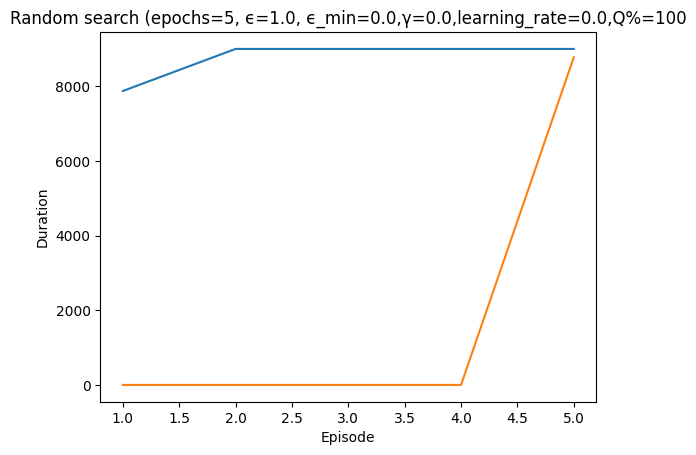

In [13]:
randomlearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    title="Random search",
)

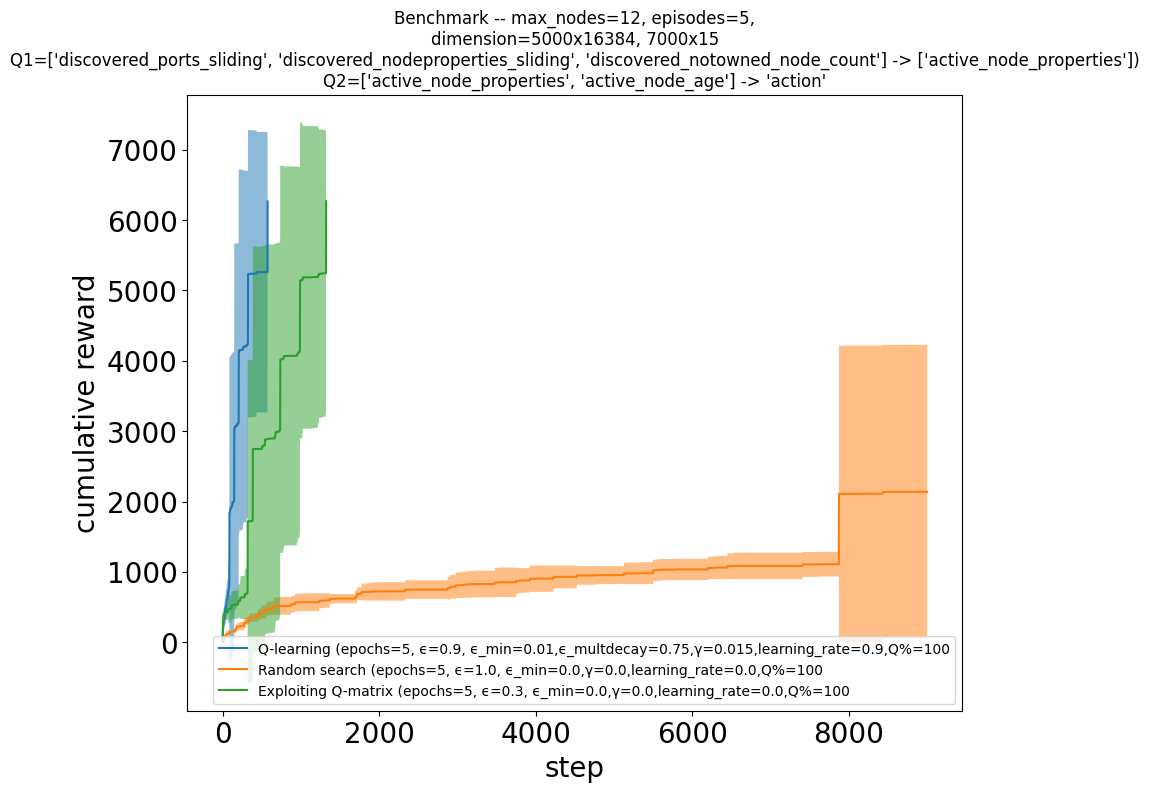

In [14]:
# Plot averaged cumulative rewards for Q-learning vs Random vs Q-Exploit
all_runs = [*qlearning_results, randomlearning_results, nolearning_results]

Q_source_10 = cast(a.QTabularLearner, qlearning_bestrun_10["learner"]).qsource
Q_attack_10 = cast(a.QTabularLearner, qlearning_bestrun_10["learner"]).qattack

p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"dimension={Q_source_10.state_space.flat_size()}x{Q_source_10.action_space.flat_size()}, "
    f"{Q_attack_10.state_space.flat_size()}x{Q_attack_10.action_space.flat_size()}\n"
    f"Q1={[f.name() for f in Q_source_10.state_space.feature_selection]} "
    f"-> {[f.name() for f in Q_source_10.action_space.feature_selection]})\n"
    f"Q2={[f.name() for f in Q_attack_10.state_space.feature_selection]} -> 'action'",
    save_at=os.path.join(plots_dir, "benchmark-tabularq-cumrewards.png")
)

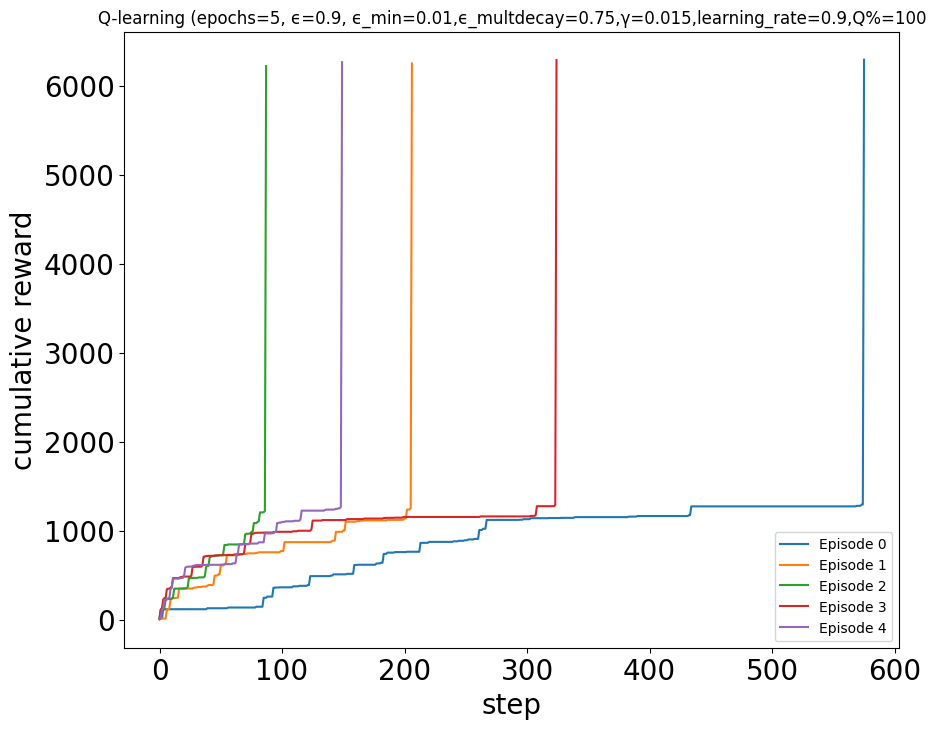

In [15]:
# plot cumulative rewards for all episodes
p.plot_all_episodes(qlearning_results[0])

In [16]:
# Plot the Q-matrices

In [17]:
# Print non-zero coordinate in the Q matrix Q_source
i = np.where(Q_source_10.qm)
q = Q_source_10.qm[i]
list(zip(np.array([Q_source_10.state_space.pretty_print(i) for i in i[0]]), np.array([Q_source_10.action_space.pretty_print(i) for i in i[1]]), q))

[('#582',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  15.497845939618635),
 ('#1766', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 90.0),
 ('#1794',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  4.808125320400861e-08),
 ('#1794',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  0.20430000194048947),
 ('#1794',
  array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]),
  4501.267046075048),
 ('#2571',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  0.09720003626109038),
 ('#2571',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  16.261192932974662),
 ('#2621', array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]), 8.1),
 ('#4112',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  150.9442026707176),
 ('#4112',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  165.82685879022713),
 ('#4216',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  91.35569210125958)]

In [18]:
# Print non-zero coordinate in the Q matrix Q_attack
i2 = np.where(Q_attack_10.qm)
q2 = Q_attack_10.qm[i2]
list(zip([Q_attack_10.state_space.pretty_print(i) for i in i2[0]], [Q_attack_10.action_space.pretty_print(i) for i in i2[1]], q2))


##################################################

[('#34', 0, 0.0005888436749999998),
 ('#34', 3, 0.00031303867499999976),
 ('#34', 5, 0.0001204180424999999),
 ('#34', 6, 1.8002987142571125),
 ('#34', 7, 3.723367499999999e-05),
 ('#34', 8, 0.00031303867499999976),
 ('#34', 10, 0.0003130386749999998),
 ('#34', 11, 0.00031303867499999976),
 ('#34', 12, 3.723367499999999e-05),
 ('#34', 13, 3.723367499999999e-05),
 ('#352', 0, 0.003415562645679198),
 ('#352', 1, 0.015789682204912656),
 ('#352', 2, 0.005231119954671591),
 ('#352', 3, 0.01587675623180547),
 ('#352', 4, 0.0015685453291465288),
 ('#352', 5, 0.20444447529224008),
 ('#352', 6, 5.403047277458635),
 ('#352', 7, 0.016722036603223994),
 ('#352', 8, 0.00033360113766055753),
 ('#352', 9, 0.009217492047112488),
 ('#352', 10, 0.015068122071550727),
 ('#352', 11, 0.0031203551075741093),
 ('#352', 12, 0.07452649872317954),
 ('#352', 13, 0.002682735043067966),
 ('#352', 14, 0.0100486304146125),
 ('#617', 0, 5.5379025),
 ('#617', 6, 0.07476168375),
 ('#617', 9, 1.159402499999997),
 ('#789'

## Transfer learning from size 4 to size 10
Exploiting Q-matrix learned from a different network.

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   18.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   20.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  120.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  120.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  131.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  131.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  139.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  139.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 96|reward:  145.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 96|reward:  145.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  154.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  154.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 117|reward:  254.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 117|reward:  254.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  265.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  265.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  274.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  274.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  276.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  276.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  280.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  280.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  380.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  380.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  391.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  391.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 154|reward:  400.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 154|reward:  400.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  500.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  500.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 158|reward:  506.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 158|reward:  506.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  512.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  512.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 226|reward:  512.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 270|reward:  512.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 290|reward:  526.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 290|reward:  526.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 1|Iteration 301|reward: 5526.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 1|Iteration 301|reward: 5526.0|last_reward_at:  301|Elapsed Time: 0:00:00||

  Episode 1 ended at t=301 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/64 (0.11)
    explore-remote: 8/115 (0.07)
    explore-connect: 0/100 (0.00)
    exploit-local: 0/1 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 13
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  348.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  359.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  359.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  365.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  365.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  373.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  373.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  375.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  375.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  384.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  384.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  390.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  390.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  396.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  396.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  398.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  398.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  400.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  400.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  500.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  500.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  514.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  514.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward: 5514.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward: 5514.0|last_reward_at:   70|Elapsed Time: 0:00:00||

  Episode 2 ended at t=70 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 6/10 (0.38)
    explore-connect: 0/19 (0.00)
    exploit-local: 7/1 (0.88)
    exploit-remote: 0/4 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 4
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  242.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  256.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  256.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  356.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  356.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  367.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  367.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  369.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  369.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  375.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  375.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  381.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  381.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  389.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  389.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  398.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  398.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  498.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  498.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  512.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  512.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward: 5512.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward: 5512.0|last_reward_at:   47|Elapsed Time: 0:00:00||

  Episode 3 ended at t=47 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/12 (0.00)
    exploit-local: 6/9 (0.40)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 5
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  127.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  133.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  133.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  141.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  141.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  150.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  150.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  152.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  152.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  266.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  266.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  366.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  366.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  377.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  377.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  386.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  386.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  486.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  486.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  492.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  492.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  498.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  498.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  512.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  512.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward: 5512.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward: 5512.0|last_reward_at:   52|Elapsed Time: 0:00:00||

  Episode 4 ended at t=52 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 3/6 (0.33)
    explore-connect: 0/18 (0.00)
    exploit-local: 6/2 (0.75)
    exploit-remote: 2/3 (0.40)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 14
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  138.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  238.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  238.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  252.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  252.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  352.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  352.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  358.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  358.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  360.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  360.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  362.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  362.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  373.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  373.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  379.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  379.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  388.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  388.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  488.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  488.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  494.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  494.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  508.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  508.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward: 5508.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward: 5508.0|last_reward_at:   54|Elapsed Time: 0:00:00||

  Episode 5 ended at t=54 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 4/10 (0.29)
    explore-connect: 0/9 (0.00)
    exploit-local: 7/2 (0.78)
    exploit-remote: 3/9 (0.25)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 12
simulation ended


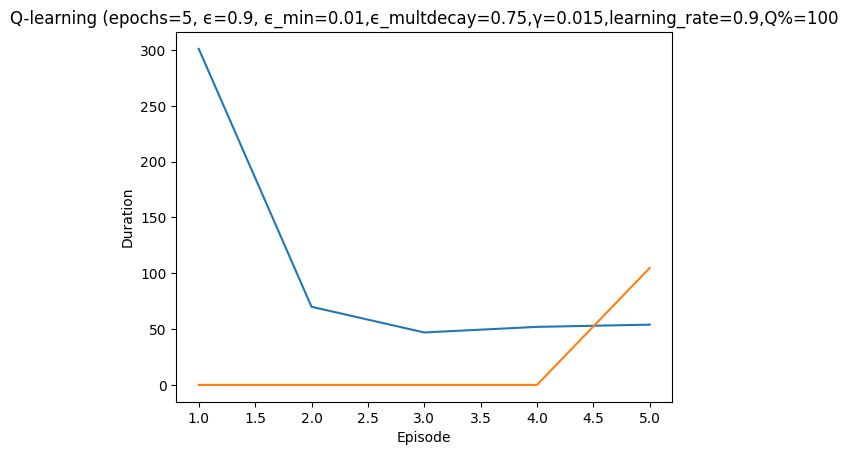

###### One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  242.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  242.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  244.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  250.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  250.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  264.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  264.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  364.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  364.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  378.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  378.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  478.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  478.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  484.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  484.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:  486.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:  486.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  488.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  488.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  494.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  494.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 128|reward:  494.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  508.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  508.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 142|reward:  608.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 142|reward:  608.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 1|Iteration 146|reward:  619.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 1|Iteration 146|reward:  619.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 1|Iteration 150|reward:  625.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 1|Iteration 150|reward:  625.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  634.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  634.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  734.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  734.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  736.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  736.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 1|Iteration 164|reward:  738.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 1|Iteration 164|reward:  738.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  744.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  744.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 172|reward:  755.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 172|reward:  755.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  759.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  759.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  761.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  761.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 1|Iteration 216|reward:  770.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 1|Iteration 216|reward:  770.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 218|reward:  870.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 218|reward:  870.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 222|reward:  876.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 222|reward:  876.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 1|Iteration 231|reward:  887.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 1|Iteration 231|reward:  887.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 1|Iteration 251|reward:  887.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 1|Iteration 257|reward:  893.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 1|Iteration 257|reward:  893.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 1|Iteration 262|reward:  899.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 1|Iteration 262|reward:  899.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 1|Iteration 283|reward:  899.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 1|Iteration 304|reward:  899.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 1|Iteration 311|reward:  905.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 1|Iteration 311|reward:  905.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 1|Iteration 333|reward:  905.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 1|Iteration 337|reward:  913.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 1|Iteration 337|reward:  913.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 1|Iteration 362|reward:  913.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 1|Iteration 384|reward:  922.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 1|Iteration 384|reward:  922.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 1|Iteration 385|reward: 1022.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 1|Iteration 385|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 1|Iteration 401|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 1|Iteration 420|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 1|Iteration 439|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 454|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 473|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 489|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 505|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 523|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 543|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 565|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 588|reward: 1022.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 593|reward: 1036.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 1|Iteration 593|reward: 1036.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 1|Iteration 596|reward: 1136.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 1|Iteration 596|reward: 1136.0|last_reward_at:  596|Elapsed Time: 0:00:02||

Episode 1|Iteration 613|reward: 1136.0|last_reward_at:  596|Elapsed Time: 0:00:03||

Episode 1|Iteration 632|reward: 1136.0|last_reward_at:  596|Elapsed Time: 0:00:03||

Episode 1|Iteration 651|reward: 1136.0|last_reward_at:  596|Elapsed Time: 0:00:03||

Episode 1|Iteration 664|reward: 1138.0|last_reward_at:  596|Elapsed Time: 0:00:03||

Episode 1|Iteration 664|reward: 1138.0|last_reward_at:  664|Elapsed Time: 0:00:03||

Episode 1|Iteration 665|reward: 1149.0|last_reward_at:  664|Elapsed Time: 0:00:03||

Episode 1|Iteration 665|reward: 1149.0|last_reward_at:  665|Elapsed Time: 0:00:03||

Episode 1|Iteration 684|reward: 1149.0|last_reward_at:  665|Elapsed Time: 0:00:03||

Episode 1|Iteration 689|reward: 1157.0|last_reward_at:  665|Elapsed Time: 0:00:03||

Episode 1|Iteration 689|reward: 1157.0|last_reward_at:  689|Elapsed Time: 0:00:03||

Episode 1|Iteration 695|reward: 1159.0|last_reward_at:  689|Elapsed Time: 0:00:03||

Episode 1|Iteration 695|reward: 1159.0|last_reward_at:  695|Elapsed Time: 0:00:03||

Episode 1|Iteration 699|reward: 1165.0|last_reward_at:  695|Elapsed Time: 0:00:03||

Episode 1|Iteration 699|reward: 1165.0|last_reward_at:  699|Elapsed Time: 0:00:03||

Episode 1|Iteration 717|reward: 1165.0|last_reward_at:  699|Elapsed Time: 0:00:03||

Episode 1|Iteration 728|reward: 1174.0|last_reward_at:  699|Elapsed Time: 0:00:03||

Episode 1|Iteration 728|reward: 1174.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 1|Iteration 731|reward: 1274.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 1|Iteration 731|reward: 1274.0|last_reward_at:  731|Elapsed Time: 0:00:03||

Episode 1|Iteration 743|reward: 1280.0|last_reward_at:  731|Elapsed Time: 0:00:03||

Episode 1|Iteration 743|reward: 1280.0|last_reward_at:  743|Elapsed Time: 0:00:03||

Episode 1|Iteration 760|reward: 1280.0|last_reward_at:  743|Elapsed Time: 0:00:03||

Episode 1|Iteration 773|reward: 1294.0|last_reward_at:  743|Elapsed Time: 0:00:03||

Episode 1|Iteration 773|reward: 1294.0|last_reward_at:  773|Elapsed Time: 0:00:03||

Episode 1|Iteration 775|reward: 6294.0|last_reward_at:  773|Elapsed Time: 0:00:03||

Episode 1|Iteration 775|reward: 6294.0|last_reward_at:  775|Elapsed Time: 0:00:03||

  Episode 1 ended at t=775 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/152 (0.07)
    explore-remote: 17/214 (0.07)
    explore-connect: 0/222 (0.00)
    exploit-local: 9/96 (0.09)
    exploit-remote: 3/40 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 223
  ## Episode: 2/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  125.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  134.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  234.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  236.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  236.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  242.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  242.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  248.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  248.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  262.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  262.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  362.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  362.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  364.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  364.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  366.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  366.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  380.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  380.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  480.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  480.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  482.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  482.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  488.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  488.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  494.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  494.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  508.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:  608.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:  608.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  622.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  622.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  722.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  722.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  728.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  728.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  734.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  734.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  748.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  748.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  848.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  848.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward:  854.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward:  854.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  856.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  856.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  862.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  862.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 139|reward:  864.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 139|reward:  864.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 2|Iteration 147|reward:  866.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 2|Iteration 147|reward:  866.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 2|Iteration 159|reward:  872.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 2|Iteration 159|reward:  872.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 2|Iteration 172|reward:  878.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 2|Iteration 172|reward:  878.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  878.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 2|Iteration 199|reward:  892.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 2|Iteration 199|reward:  892.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 2|Iteration 200|reward:  992.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 2|Iteration 200|reward:  992.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 2|Iteration 201|reward:  998.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 2|Iteration 201|reward:  998.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 2|Iteration 206|reward: 1004.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 2|Iteration 206|reward: 1004.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 2|Iteration 220|reward: 1010.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 2|Iteration 220|reward: 1010.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 2|Iteration 237|reward: 1010.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 2|Iteration 239|reward: 1016.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 2|Iteration 239|reward: 1016.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 2|Iteration 247|reward: 1018.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 2|Iteration 247|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 266|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 286|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 305|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 325|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 359|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 381|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 2|Iteration 399|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 2|Iteration 417|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 2|Iteration 433|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 2|Iteration 453|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 2|Iteration 474|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 2|Iteration 490|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 2|Iteration 508|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 2|Iteration 528|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 2|Iteration 549|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:03||

Episode 2|Iteration 566|reward: 1018.0|last_reward_at:  247|Elapsed Time: 0:00:03||

Episode 2|Iteration 574|reward: 1032.0|last_reward_at:  247|Elapsed Time: 0:00:03||

Episode 2|Iteration 574|reward: 1032.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 2|Iteration 575|reward: 1132.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 2|Iteration 575|reward: 1132.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 2|Iteration 591|reward: 1134.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 2|Iteration 591|reward: 1134.0|last_reward_at:  591|Elapsed Time: 0:00:03||

Episode 2|Iteration 607|reward: 1148.0|last_reward_at:  591|Elapsed Time: 0:00:03||

Episode 2|Iteration 607|reward: 1148.0|last_reward_at:  607|Elapsed Time: 0:00:03||

Episode 2|Iteration 608|reward: 1248.0|last_reward_at:  607|Elapsed Time: 0:00:03||

Episode 2|Iteration 608|reward: 1248.0|last_reward_at:  608|Elapsed Time: 0:00:03||

Episode 2|Iteration 623|reward: 1250.0|last_reward_at:  608|Elapsed Time: 0:00:03||

Episode 2|Iteration 623|reward: 1250.0|last_reward_at:  623|Elapsed Time: 0:00:03||

Episode 2|Iteration 643|reward: 1250.0|last_reward_at:  623|Elapsed Time: 0:00:03||

Episode 2|Iteration 645|reward: 1256.0|last_reward_at:  623|Elapsed Time: 0:00:03||

Episode 2|Iteration 645|reward: 1256.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 2|Iteration 663|reward: 1256.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 2|Iteration 680|reward: 1256.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 2|Iteration 699|reward: 1256.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 2|Iteration 703|reward: 1262.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 2|Iteration 703|reward: 1262.0|last_reward_at:  703|Elapsed Time: 0:00:03||

Episode 2|Iteration 711|reward: 1268.0|last_reward_at:  703|Elapsed Time: 0:00:03||

Episode 2|Iteration 711|reward: 1268.0|last_reward_at:  711|Elapsed Time: 0:00:03||

Episode 2|Iteration 729|reward: 1268.0|last_reward_at:  711|Elapsed Time: 0:00:04||

Episode 2|Iteration 733|reward: 1279.0|last_reward_at:  711|Elapsed Time: 0:00:04||

Episode 2|Iteration 733|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 2|Iteration 751|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 2|Iteration 769|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 2|Iteration 786|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 2|Iteration 798|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 2|Iteration 812|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 2|Iteration 833|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 2|Iteration 850|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 2|Iteration 867|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 2|Iteration 885|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 903|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 912|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 929|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 946|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 961|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 977|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 993|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 1010|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 1026|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 1045|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 2|Iteration 1063|reward: 1279.0|last_reward_at:  733|Elapsed Time: 0:00:06||

Episode 2|Iteration 1068|reward: 1285.0|last_reward_at:  733|Elapsed Time: 0:00:06||

Episode 2|Iteration 1068|reward: 1285.0|last_reward_at: 1068|Elapsed Time: 0:00:06||

Episode 2|Iteration 1084|reward: 1285.0|last_reward_at: 1068|Elapsed Time: 0:00:06||

Episode 2|Iteration 1101|reward: 1285.0|last_reward_at: 1068|Elapsed Time: 0:00:06||

Episode 2|Iteration 1112|reward: 1285.0|last_reward_at: 1068|Elapsed Time: 0:00:06||

Episode 2|Iteration 1119|reward: 1294.0|last_reward_at: 1068|Elapsed Time: 0:00:06||

Episode 2|Iteration 1119|reward: 1294.0|last_reward_at: 1119|Elapsed Time: 0:00:06||

Episode 2|Iteration 1121|reward: 6294.0|last_reward_at: 1119|Elapsed Time: 0:00:06||

Episode 2|Iteration 1121|reward: 6294.0|last_reward_at: 1121|Elapsed Time: 0:00:06||

  Episode 2 ended at t=1121 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/245 (0.05)
    explore-remote: 15/306 (0.05)
    explore-connect: 0/291 (0.00)
    exploit-local: 8/156 (0.05)
    exploit-remote: 5/71 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 332
  ## Episode: 3/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  130.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  130.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  230.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  236.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  236.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  242.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  242.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  248.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  248.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  250.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  250.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  264.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  364.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  364.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  375.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  375.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  384.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  384.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  484.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  484.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  498.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  498.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  598.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  598.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  612.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  612.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  712.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  712.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:  723.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:  723.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  727.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  727.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  733.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  733.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  735.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  735.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:  737.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:  737.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  743.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  743.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward:  745.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward:  745.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:  747.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:  747.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 3|Iteration 122|reward:  753.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 3|Iteration 122|reward:  753.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 3|Iteration 128|reward:  759.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 3|Iteration 128|reward:  759.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 3|Iteration 150|reward:  759.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 3|Iteration 169|reward:  759.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 3|Iteration 174|reward:  761.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 3|Iteration 174|reward:  761.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 3|Iteration 194|reward:  761.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 3|Iteration 196|reward:  767.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 3|Iteration 196|reward:  767.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 3|Iteration 208|reward:  773.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 3|Iteration 208|reward:  773.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 3|Iteration 221|reward:  782.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 3|Iteration 221|reward:  782.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 3|Iteration 222|reward:  882.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 3|Iteration 222|reward:  882.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 3|Iteration 242|reward:  882.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 3|Iteration 243|reward:  896.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 3|Iteration 243|reward:  896.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 3|Iteration 245|reward:  996.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 3|Iteration 245|reward:  996.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 3|Iteration 253|reward: 1002.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 3|Iteration 253|reward: 1002.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 3|Iteration 259|reward: 1008.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 3|Iteration 259|reward: 1008.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 280|reward: 1008.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 298|reward: 1008.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 307|reward: 1019.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 307|reward: 1019.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 3|Iteration 315|reward: 1025.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 3|Iteration 315|reward: 1025.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 332|reward: 1025.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 353|reward: 1025.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 370|reward: 1025.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 374|reward: 1027.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 374|reward: 1027.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 3|Iteration 386|reward: 1031.0|last_reward_at:  374|Elapsed Time: 0:00:02||

Episode 3|Iteration 386|reward: 1031.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 3|Iteration 406|reward: 1031.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 3|Iteration 422|reward: 1031.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 3|Iteration 439|reward: 1031.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 3|Iteration 456|reward: 1031.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 3|Iteration 472|reward: 1040.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 3|Iteration 472|reward: 1040.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 3|Iteration 473|reward: 1140.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 3|Iteration 473|reward: 1140.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 3|Iteration 482|reward: 1154.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 3|Iteration 482|reward: 1154.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 3|Iteration 483|reward: 1254.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 3|Iteration 483|reward: 1254.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 3|Iteration 489|reward: 1260.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 3|Iteration 489|reward: 1260.0|last_reward_at:  489|Elapsed Time: 0:00:02||

Episode 3|Iteration 510|reward: 1260.0|last_reward_at:  489|Elapsed Time: 0:00:02||

Episode 3|Iteration 528|reward: 1260.0|last_reward_at:  489|Elapsed Time: 0:00:02||

Episode 3|Iteration 534|reward: 1266.0|last_reward_at:  489|Elapsed Time: 0:00:02||

Episode 3|Iteration 534|reward: 1266.0|last_reward_at:  534|Elapsed Time: 0:00:02||

Episode 3|Iteration 557|reward: 1266.0|last_reward_at:  534|Elapsed Time: 0:00:02||

Episode 3|Iteration 565|reward: 1272.0|last_reward_at:  534|Elapsed Time: 0:00:03||

Episode 3|Iteration 565|reward: 1272.0|last_reward_at:  565|Elapsed Time: 0:00:03||

Episode 3|Iteration 572|reward: 1286.0|last_reward_at:  565|Elapsed Time: 0:00:03||

Episode 3|Iteration 572|reward: 1286.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 3|Iteration 574|reward: 6286.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 3|Iteration 574|reward: 6286.0|last_reward_at:  574|Elapsed Time: 0:00:03||

  Episode 3 ended at t=574 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/116 (0.11)
    explore-remote: 17/140 (0.11)
    explore-connect: 0/173 (0.00)
    exploit-local: 5/61 (0.08)
    exploit-remote: 3/34 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 179
  ## Episode: 4/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  240.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  240.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  244.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  244.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  255.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  255.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  257.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  257.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  261.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  261.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  267.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  267.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 92|reward:  267.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  267.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:  276.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:  276.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 4|Iteration 135|reward:  376.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 4|Iteration 135|reward:  376.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 4|Iteration 156|reward:  376.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 4|Iteration 161|reward:  387.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 4|Iteration 161|reward:  387.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 4|Iteration 163|reward:  395.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 4|Iteration 163|reward:  395.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 4|Iteration 167|reward:  404.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 4|Iteration 167|reward:  404.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 4|Iteration 169|reward:  504.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 4|Iteration 169|reward:  504.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 4|Iteration 181|reward:  515.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 4|Iteration 181|reward:  515.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 199|reward:  521.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 199|reward:  521.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 4|Iteration 221|reward:  521.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 4|Iteration 222|reward:  530.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 4|Iteration 222|reward:  530.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 4|Iteration 223|reward:  630.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 4|Iteration 223|reward:  630.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 4|Iteration 225|reward:  644.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 4|Iteration 225|reward:  644.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 4|Iteration 226|reward:  744.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 4|Iteration 226|reward:  744.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 4|Iteration 231|reward:  758.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 4|Iteration 231|reward:  758.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 4|Iteration 232|reward:  858.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 4|Iteration 232|reward:  858.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 4|Iteration 233|reward:  864.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 4|Iteration 233|reward:  864.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 4|Iteration 234|reward:  870.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 4|Iteration 234|reward:  870.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 4|Iteration 235|reward:  881.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 4|Iteration 235|reward:  881.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 4|Iteration 256|reward:  889.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 4|Iteration 256|reward:  889.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 4|Iteration 267|reward:  891.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 4|Iteration 267|reward:  891.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 4|Iteration 278|reward:  897.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 4|Iteration 278|reward:  897.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 4|Iteration 286|reward:  903.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 4|Iteration 286|reward:  903.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward:  905.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward:  905.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 314|reward:  905.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 338|reward:  914.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 338|reward:  914.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 4|Iteration 340|reward: 1014.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 4|Iteration 340|reward: 1014.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 4|Iteration 351|reward: 1016.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 4|Iteration 351|reward: 1016.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 4|Iteration 354|reward: 1022.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 4|Iteration 354|reward: 1022.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 4|Iteration 358|reward: 1036.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 4|Iteration 358|reward: 1036.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 4|Iteration 359|reward: 1136.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 4|Iteration 359|reward: 1136.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 4|Iteration 371|reward: 1138.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 4|Iteration 371|reward: 1138.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 4|Iteration 383|reward: 1152.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 4|Iteration 383|reward: 1152.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 4|Iteration 384|reward: 1252.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 4|Iteration 384|reward: 1252.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 4|Iteration 390|reward: 1254.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 4|Iteration 390|reward: 1254.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 4|Iteration 393|reward: 1260.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 4|Iteration 393|reward: 1260.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 4|Iteration 411|reward: 1260.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 4|Iteration 431|reward: 1260.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 4|Iteration 434|reward: 1262.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 4|Iteration 434|reward: 1262.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 4|Iteration 448|reward: 1262.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 4|Iteration 454|reward: 1268.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 4|Iteration 454|reward: 1268.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 4|Iteration 470|reward: 1268.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 4|Iteration 488|reward: 1268.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 4|Iteration 504|reward: 1268.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 4|Iteration 505|reward: 1274.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 4|Iteration 505|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 4|Iteration 523|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 4|Iteration 543|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 4|Iteration 562|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 4|Iteration 570|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 4|Iteration 586|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 603|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 621|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 640|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 659|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 676|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 691|reward: 1274.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 704|reward: 1280.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 704|reward: 1280.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 4|Iteration 719|reward: 1280.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 4|Iteration 735|reward: 1280.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 4|Iteration 752|reward: 1280.0|last_reward_at:  704|Elapsed Time: 0:00:04||

Episode 4|Iteration 770|reward: 1280.0|last_reward_at:  704|Elapsed Time: 0:00:04||

Episode 4|Iteration 788|reward: 1280.0|last_reward_at:  704|Elapsed Time: 0:00:04||

Episode 4|Iteration 798|reward: 1280.0|last_reward_at:  704|Elapsed Time: 0:00:04||

Episode 4|Iteration 817|reward: 1280.0|last_reward_at:  704|Elapsed Time: 0:00:04||

Episode 4|Iteration 826|reward: 1291.0|last_reward_at:  704|Elapsed Time: 0:00:04||

Episode 4|Iteration 826|reward: 1291.0|last_reward_at:  826|Elapsed Time: 0:00:04||

Episode 4|Iteration 844|reward: 1291.0|last_reward_at:  826|Elapsed Time: 0:00:04||

Episode 4|Iteration 862|reward: 1291.0|last_reward_at:  826|Elapsed Time: 0:00:04||

Episode 4|Iteration 878|reward: 1291.0|last_reward_at:  826|Elapsed Time: 0:00:04||

Episode 4|Iteration 895|reward: 1291.0|last_reward_at:  826|Elapsed Time: 0:00:04||

Episode 4|Iteration 912|reward: 1291.0|last_reward_at:  826|Elapsed Time: 0:00:04||

Episode 4|Iteration 927|reward: 1291.0|last_reward_at:  826|Elapsed Time: 0:00:05||

Episode 4|Iteration 931|reward: 1300.0|last_reward_at:  826|Elapsed Time: 0:00:05||

Episode 4|Iteration 931|reward: 1300.0|last_reward_at:  931|Elapsed Time: 0:00:05||

Episode 4|Iteration 933|reward: 6300.0|last_reward_at:  931|Elapsed Time: 0:00:05||

Episode 4|Iteration 933|reward: 6300.0|last_reward_at:  933|Elapsed Time: 0:00:05||

  Episode 4 ended at t=933 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/192 (0.09)
    explore-remote: 16/259 (0.06)
    explore-connect: 0/267 (0.00)
    exploit-local: 1/104 (0.01)
    exploit-remote: 4/59 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 276
  ## Episode: 5/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  116.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  130.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  130.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  236.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  236.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  250.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  250.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  350.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  350.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  356.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  356.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  362.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  362.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  373.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  373.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  375.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  375.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  384.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  384.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  386.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  386.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  486.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  486.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  492.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  492.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  506.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  506.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  512.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  512.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 77|reward:  612.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 77|reward:  612.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  614.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  614.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward:  614.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  628.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  628.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 109|reward:  636.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 109|reward:  636.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward:  736.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward:  736.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  742.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  742.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 117|reward:  744.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 117|reward:  744.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 5|Iteration 120|reward:  750.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 5|Iteration 120|reward:  750.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  756.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  756.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 149|reward:  758.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 149|reward:  758.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 5|Iteration 170|reward:  758.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 5|Iteration 192|reward:  764.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 5|Iteration 192|reward:  764.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 5|Iteration 218|reward:  764.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 5|Iteration 241|reward:  764.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 5|Iteration 262|reward:  764.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 5|Iteration 283|reward:  764.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 5|Iteration 287|reward:  778.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 5|Iteration 287|reward:  778.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 5|Iteration 288|reward:  878.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 5|Iteration 288|reward:  878.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 5|Iteration 296|reward:  892.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 5|Iteration 296|reward:  892.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 5|Iteration 298|reward:  992.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 5|Iteration 298|reward:  992.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 5|Iteration 302|reward:  998.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 5|Iteration 302|reward:  998.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 5|Iteration 303|reward: 1000.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 5|Iteration 303|reward: 1000.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 5|Iteration 321|reward: 1000.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 5|Iteration 322|reward: 1006.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 5|Iteration 322|reward: 1006.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 5|Iteration 324|reward: 1020.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 5|Iteration 324|reward: 1020.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 5|Iteration 325|reward: 1120.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 5|Iteration 325|reward: 1120.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 5|Iteration 332|reward: 1126.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 5|Iteration 332|reward: 1126.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 5|Iteration 339|reward: 1128.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 5|Iteration 339|reward: 1128.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 5|Iteration 352|reward: 1134.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 5|Iteration 352|reward: 1134.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 5|Iteration 361|reward: 1140.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 5|Iteration 361|reward: 1140.0|last_reward_at:  361|Elapsed Time: 0:00:01||

Episode 5|Iteration 379|reward: 1142.0|last_reward_at:  361|Elapsed Time: 0:00:01||

Episode 5|Iteration 379|reward: 1142.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 5|Iteration 401|reward: 1142.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 5|Iteration 408|reward: 1156.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 5|Iteration 408|reward: 1156.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 5|Iteration 409|reward: 1256.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 5|Iteration 409|reward: 1256.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 5|Iteration 415|reward: 1262.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 5|Iteration 415|reward: 1262.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 5|Iteration 419|reward: 1264.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 5|Iteration 419|reward: 1264.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 435|reward: 1264.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 453|reward: 1264.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 473|reward: 1264.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 485|reward: 1278.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 485|reward: 1278.0|last_reward_at:  485|Elapsed Time: 0:00:02||

Episode 5|Iteration 487|reward: 6278.0|last_reward_at:  485|Elapsed Time: 0:00:02||

Episode 5|Iteration 487|reward: 6278.0|last_reward_at:  487|Elapsed Time: 0:00:02||

  Episode 5 ended at t=487 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/92 (0.12)
    explore-remote: 15/117 (0.11)
    explore-connect: 0/140 (0.00)
    exploit-local: 7/65 (0.10)
    exploit-remote: 3/24 (0.11)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 129
simulation ended


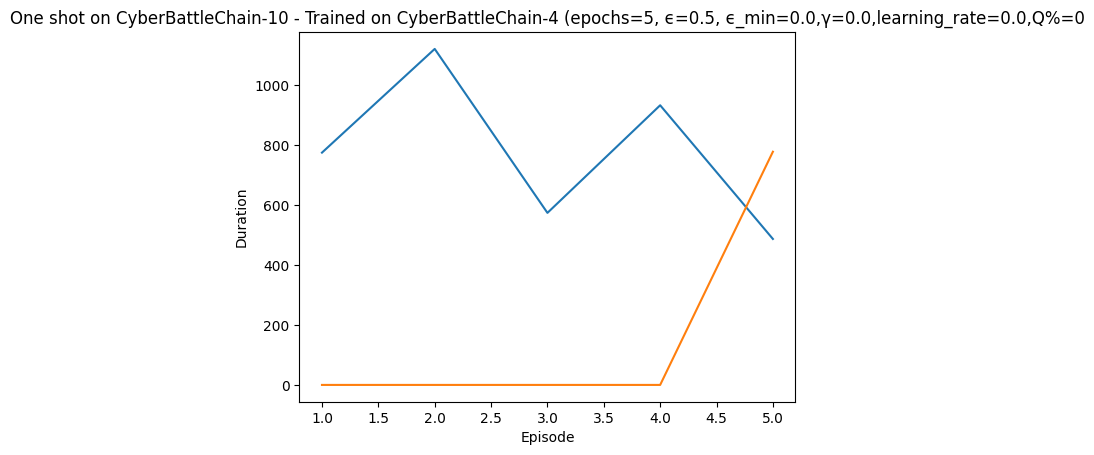

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  120.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  134.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  134.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  140.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  140.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  240.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  240.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  254.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  254.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  256.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  256.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  262.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  262.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  268.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  268.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  274.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  274.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  278.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  278.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  378.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  378.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 215|reward:  389.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 215|reward:  389.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  395.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  395.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 226|reward:  404.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 226|reward:  404.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 1|Iteration 278|reward:  412.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 1|Iteration 278|reward:  412.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  412.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 1|Iteration 428|reward:  412.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 1|Iteration 513|reward:  412.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 1|Iteration 570|reward:  412.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 1|Iteration 657|reward:  412.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 1|Iteration 743|reward:  412.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 1|Iteration 767|reward:  512.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 1|Iteration 767|reward:  512.0|last_reward_at:  767|Elapsed Time: 0:00:00||

Episode 1|Iteration 828|reward:  526.0|last_reward_at:  767|Elapsed Time: 0:00:00||

Episode 1|Iteration 828|reward:  526.0|last_reward_at:  828|Elapsed Time: 0:00:00||

Episode 1|Iteration 834|reward:  532.0|last_reward_at:  828|Elapsed Time: 0:00:00||

Episode 1|Iteration 834|reward:  532.0|last_reward_at:  834|Elapsed Time: 0:00:00||

Episode 1|Iteration 835|reward:  536.0|last_reward_at:  834|Elapsed Time: 0:00:00||

Episode 1|Iteration 835|reward:  536.0|last_reward_at:  835|Elapsed Time: 0:00:00||

Episode 1|Iteration 852|reward:  538.0|last_reward_at:  835|Elapsed Time: 0:00:00||

Episode 1|Iteration 852|reward:  538.0|last_reward_at:  852|Elapsed Time: 0:00:00||

Episode 1|Iteration 912|reward:  538.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 1|Iteration 979|reward:  538.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 1|Iteration 1026|reward:  538.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 1|Iteration 1100|reward:  538.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 1|Iteration 1140|reward:  538.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 1|Iteration 1217|reward:  538.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 1|Iteration 1293|reward:  538.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 1|Iteration 1314|reward:  638.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 1|Iteration 1314|reward:  638.0|last_reward_at: 1314|Elapsed Time: 0:00:01||

Episode 1|Iteration 1344|reward:  649.0|last_reward_at: 1314|Elapsed Time: 0:00:01||

Episode 1|Iteration 1344|reward:  649.0|last_reward_at: 1344|Elapsed Time: 0:00:01||

Episode 1|Iteration 1394|reward:  655.0|last_reward_at: 1344|Elapsed Time: 0:00:01||

Episode 1|Iteration 1394|reward:  655.0|last_reward_at: 1394|Elapsed Time: 0:00:01||

Episode 1|Iteration 1400|reward:  664.0|last_reward_at: 1394|Elapsed Time: 0:00:01||

Episode 1|Iteration 1400|reward:  664.0|last_reward_at: 1400|Elapsed Time: 0:00:01||

Episode 1|Iteration 1403|reward:  764.0|last_reward_at: 1400|Elapsed Time: 0:00:01||

Episode 1|Iteration 1403|reward:  764.0|last_reward_at: 1403|Elapsed Time: 0:00:01||

Episode 1|Iteration 1406|reward:  770.0|last_reward_at: 1403|Elapsed Time: 0:00:01||

Episode 1|Iteration 1406|reward:  770.0|last_reward_at: 1406|Elapsed Time: 0:00:01||

Episode 1|Iteration 1421|reward:  784.0|last_reward_at: 1406|Elapsed Time: 0:00:01||

Episode 1|Iteration 1421|reward:  784.0|last_reward_at: 1421|Elapsed Time: 0:00:01||

Episode 1|Iteration 1422|reward:  790.0|last_reward_at: 1421|Elapsed Time: 0:00:01||

Episode 1|Iteration 1422|reward:  790.0|last_reward_at: 1422|Elapsed Time: 0:00:01||

Episode 1|Iteration 1429|reward:  792.0|last_reward_at: 1422|Elapsed Time: 0:00:01||

Episode 1|Iteration 1429|reward:  792.0|last_reward_at: 1429|Elapsed Time: 0:00:01||

Episode 1|Iteration 1442|reward:  796.0|last_reward_at: 1429|Elapsed Time: 0:00:01||

Episode 1|Iteration 1442|reward:  796.0|last_reward_at: 1442|Elapsed Time: 0:00:01||

Episode 1|Iteration 1482|reward:  796.0|last_reward_at: 1442|Elapsed Time: 0:00:01||

Episode 1|Iteration 1536|reward:  796.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1576|reward:  896.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1576|reward:  896.0|last_reward_at: 1576|Elapsed Time: 0:00:02||

Episode 1|Iteration 1625|reward:  910.0|last_reward_at: 1576|Elapsed Time: 0:00:02||

Episode 1|Iteration 1625|reward:  910.0|last_reward_at: 1625|Elapsed Time: 0:00:02||

Episode 1|Iteration 1628|reward:  916.0|last_reward_at: 1625|Elapsed Time: 0:00:02||

Episode 1|Iteration 1628|reward:  916.0|last_reward_at: 1628|Elapsed Time: 0:00:02||

Episode 1|Iteration 1639|reward:  924.0|last_reward_at: 1628|Elapsed Time: 0:00:02||

Episode 1|Iteration 1639|reward:  924.0|last_reward_at: 1639|Elapsed Time: 0:00:02||

Episode 1|Iteration 1677|reward:  930.0|last_reward_at: 1639|Elapsed Time: 0:00:02||

Episode 1|Iteration 1677|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:02||

Episode 1|Iteration 1709|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:02||

Episode 1|Iteration 1755|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:02||

Episode 1|Iteration 1798|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:02||

Episode 1|Iteration 1823|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:02||

Episode 1|Iteration 1866|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:02||

Episode 1|Iteration 1903|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:02||

Episode 1|Iteration 1937|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:02||

Episode 1|Iteration 1981|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:03||

Episode 1|Iteration 2018|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:03||

Episode 1|Iteration 2051|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:03||

Episode 1|Iteration 2090|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:03||

Episode 1|Iteration 2133|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:03||

Episode 1|Iteration 2165|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:03||

Episode 1|Iteration 2212|reward:  930.0|last_reward_at: 1677|Elapsed Time: 0:00:03||

Episode 1|Iteration 2219|reward: 1030.0|last_reward_at: 1677|Elapsed Time: 0:00:03||

Episode 1|Iteration 2219|reward: 1030.0|last_reward_at: 2219|Elapsed Time: 0:00:03||

Episode 1|Iteration 2257|reward: 1041.0|last_reward_at: 2219|Elapsed Time: 0:00:03||

Episode 1|Iteration 2257|reward: 1041.0|last_reward_at: 2257|Elapsed Time: 0:00:03||

Episode 1|Iteration 2267|reward: 1050.0|last_reward_at: 2257|Elapsed Time: 0:00:03||

Episode 1|Iteration 2267|reward: 1050.0|last_reward_at: 2267|Elapsed Time: 0:00:03||

Episode 1|Iteration 2286|reward: 1054.0|last_reward_at: 2267|Elapsed Time: 0:00:03||

Episode 1|Iteration 2286|reward: 1054.0|last_reward_at: 2286|Elapsed Time: 0:00:03||

Episode 1|Iteration 2297|reward: 1056.0|last_reward_at: 2286|Elapsed Time: 0:00:03||

Episode 1|Iteration 2297|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:03||

Episode 1|Iteration 2336|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:03||

Episode 1|Iteration 2375|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2413|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2454|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2497|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2540|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2583|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2621|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2662|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2703|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2735|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2777|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:04||

Episode 1|Iteration 2819|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 2849|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 2892|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 2934|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 2963|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 3006|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 3049|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 3076|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 3114|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 3157|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 3190|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 1|Iteration 3231|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3270|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3304|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3344|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3387|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3418|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3460|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3500|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3532|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3572|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 1|Iteration 3611|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3646|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3686|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3728|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3760|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3801|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3842|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3874|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3916|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3958|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 3988|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:07||

Episode 1|Iteration 4027|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4061|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4102|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4140|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4178|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4216|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4256|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4294|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4330|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4369|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:08||

Episode 1|Iteration 4406|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4441|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4481|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4521|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4557|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4597|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4639|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4671|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4711|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4751|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4785|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:09||

Episode 1|Iteration 4825|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 4863|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 4899|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 4937|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 4975|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 5013|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 5052|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 5092|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 5127|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 5166|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:10||

Episode 1|Iteration 5205|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5238|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5275|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5315|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5355|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5393|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5434|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5469|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5506|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5541|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:11||

Episode 1|Iteration 5579|reward: 1056.0|last_reward_at: 2297|Elapsed Time: 0:00:12||

Episode 1|Iteration 5604|reward: 1156.0|last_reward_at: 2297|Elapsed Time: 0:00:12||

Episode 1|Iteration 5604|reward: 1156.0|last_reward_at: 5604|Elapsed Time: 0:00:12||

Episode 1|Iteration 5610|reward: 1170.0|last_reward_at: 5604|Elapsed Time: 0:00:12||

Episode 1|Iteration 5610|reward: 1170.0|last_reward_at: 5610|Elapsed Time: 0:00:12||

Episode 1|Iteration 5646|reward: 1170.0|last_reward_at: 5610|Elapsed Time: 0:00:12||

Episode 1|Iteration 5678|reward: 1178.0|last_reward_at: 5610|Elapsed Time: 0:00:12||

Episode 1|Iteration 5678|reward: 1178.0|last_reward_at: 5678|Elapsed Time: 0:00:12||

Episode 1|Iteration 5697|reward: 1178.0|last_reward_at: 5678|Elapsed Time: 0:00:12||

Episode 1|Iteration 5710|reward: 1184.0|last_reward_at: 5678|Elapsed Time: 0:00:12||

Episode 1|Iteration 5710|reward: 1184.0|last_reward_at: 5710|Elapsed Time: 0:00:12||

Episode 1|Iteration 5721|reward: 1190.0|last_reward_at: 5710|Elapsed Time: 0:00:12||

Episode 1|Iteration 5721|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:12||

Episode 1|Iteration 5757|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:12||

Episode 1|Iteration 5793|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:12||

Episode 1|Iteration 5829|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:12||

Episode 1|Iteration 5858|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:12||

Episode 1|Iteration 5896|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 5925|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 5959|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 5996|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 6033|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 6066|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 6101|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 6136|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 6174|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 6210|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 6246|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:13||

Episode 1|Iteration 6266|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6299|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6335|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6371|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6404|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6440|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6479|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6515|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6549|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6584|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:14||

Episode 1|Iteration 6608|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6638|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6672|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6706|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6741|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6776|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6811|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6836|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6867|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6902|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:15||

Episode 1|Iteration 6936|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 6968|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 7001|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 7037|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 7064|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 7098|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 7134|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 7170|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 7207|reward: 1190.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 7243|reward: 1290.0|last_reward_at: 5721|Elapsed Time: 0:00:16||

Episode 1|Iteration 7243|reward: 1290.0|last_reward_at: 7243|Elapsed Time: 0:00:16||

Episode 1|Iteration 7277|reward: 1290.0|last_reward_at: 7243|Elapsed Time: 0:00:17||

Episode 1|Iteration 7312|reward: 1290.0|last_reward_at: 7243|Elapsed Time: 0:00:17||

Episode 1|Iteration 7336|reward: 1301.0|last_reward_at: 7243|Elapsed Time: 0:00:17||

Episode 1|Iteration 7336|reward: 1301.0|last_reward_at: 7336|Elapsed Time: 0:00:17||

Episode 1|Iteration 7369|reward: 1301.0|last_reward_at: 7336|Elapsed Time: 0:00:17||

Episode 1|Iteration 7403|reward: 1301.0|last_reward_at: 7336|Elapsed Time: 0:00:17||

Episode 1|Iteration 7436|reward: 1301.0|last_reward_at: 7336|Elapsed Time: 0:00:17||

Episode 1|Iteration 7470|reward: 1301.0|last_reward_at: 7336|Elapsed Time: 0:00:17||

Episode 1|Iteration 7503|reward: 1301.0|last_reward_at: 7336|Elapsed Time: 0:00:17||

Episode 1|Iteration 7514|reward: 1310.0|last_reward_at: 7336|Elapsed Time: 0:00:17||

Episode 1|Iteration 7514|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:17||

Episode 1|Iteration 7548|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:17||

Episode 1|Iteration 7581|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:17||

Episode 1|Iteration 7615|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7633|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7664|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7698|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7732|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7766|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7799|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7830|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7861|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7893|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7925|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:18||

Episode 1|Iteration 7956|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 7975|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8003|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8036|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8070|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8089|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8120|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8152|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8186|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8203|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8234|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:19||

Episode 1|Iteration 8263|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8287|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8315|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8344|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8375|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8405|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8431|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8461|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8492|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8523|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:20||

Episode 1|Iteration 8545|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8573|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8601|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8632|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8659|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8689|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8719|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8750|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8773|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8803|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:21||

Episode 1|Iteration 8834|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:22||

Episode 1|Iteration 8856|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:22||

Episode 1|Iteration 8887|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:22||

Episode 1|Iteration 8918|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:22||

Episode 1|Iteration 8951|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:22||

Episode 1|Iteration 8983|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:22||

Episode 1|Iteration 9000|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:22||

Episode 1|Iteration 9000|reward: 1310.0|last_reward_at: 7514|Elapsed Time: 0:00:22||

  Episode 1 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2597 (0.01)
    explore-remote: 20/3125 (0.01)
    explore-connect: 10/3227 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  120.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  134.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  134.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  140.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  240.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  240.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  251.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  251.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  257.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  257.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  261.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  261.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  267.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  267.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  276.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  278.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  278.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 199|reward:  278.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 229|reward:  378.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 229|reward:  378.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 2|Iteration 235|reward:  389.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 2|Iteration 235|reward:  389.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  397.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  397.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 262|reward:  406.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 262|reward:  406.0|last_reward_at:  262|Elapsed Time: 0:00:00||

Episode 2|Iteration 293|reward:  506.0|last_reward_at:  262|Elapsed Time: 0:00:00||

Episode 2|Iteration 293|reward:  506.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 2|Iteration 298|reward:  520.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 2|Iteration 298|reward:  520.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 2|Iteration 306|reward:  526.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 2|Iteration 306|reward:  526.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 2|Iteration 319|reward:  530.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 2|Iteration 319|reward:  530.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 2|Iteration 348|reward:  536.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 2|Iteration 348|reward:  536.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 2|Iteration 386|reward:  538.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 2|Iteration 386|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 2|Iteration 456|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 2|Iteration 534|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 2|Iteration 612|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 2|Iteration 684|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 2|Iteration 763|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 2|Iteration 842|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 912|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 990|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 1067|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 1140|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 1215|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 1254|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 1331|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 1408|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 1482|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 1556|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 1595|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 1666|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 1709|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 1781|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 1823|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 1894|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 1937|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 2009|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 2051|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 2113|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 2165|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 2235|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 2|Iteration 2279|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2346|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2393|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2464|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2507|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2577|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2621|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2690|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2735|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2807|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2849|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2919|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 2|Iteration 2963|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3032|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3076|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3142|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3190|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3259|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3304|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3373|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3418|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3482|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3532|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3596|reward:  538.0|last_reward_at:  386|Elapsed Time: 0:00:04||

Episode 2|Iteration 3626|reward:  638.0|last_reward_at:  386|Elapsed Time: 0:00:05||

Episode 2|Iteration 3626|reward:  638.0|last_reward_at: 3626|Elapsed Time: 0:00:05||

Episode 2|Iteration 3686|reward:  638.0|last_reward_at: 3626|Elapsed Time: 0:00:05||

Episode 2|Iteration 3747|reward:  638.0|last_reward_at: 3626|Elapsed Time: 0:00:05||

Episode 2|Iteration 3772|reward:  652.0|last_reward_at: 3626|Elapsed Time: 0:00:05||

Episode 2|Iteration 3772|reward:  652.0|last_reward_at: 3772|Elapsed Time: 0:00:05||

Episode 2|Iteration 3778|reward:  660.0|last_reward_at: 3772|Elapsed Time: 0:00:05||

Episode 2|Iteration 3778|reward:  660.0|last_reward_at: 3778|Elapsed Time: 0:00:05||

Episode 2|Iteration 3786|reward:  666.0|last_reward_at: 3778|Elapsed Time: 0:00:05||

Episode 2|Iteration 3786|reward:  666.0|last_reward_at: 3786|Elapsed Time: 0:00:05||

Episode 2|Iteration 3843|reward:  666.0|last_reward_at: 3786|Elapsed Time: 0:00:05||

Episode 2|Iteration 3874|reward:  666.0|last_reward_at: 3786|Elapsed Time: 0:00:05||

Episode 2|Iteration 3877|reward:  672.0|last_reward_at: 3786|Elapsed Time: 0:00:05||

Episode 2|Iteration 3877|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:05||

Episode 2|Iteration 3927|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:05||

Episode 2|Iteration 3982|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:05||

Episode 2|Iteration 4036|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:05||

Episode 2|Iteration 4095|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:05||

Episode 2|Iteration 4155|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:05||

Episode 2|Iteration 4207|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4264|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4324|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4384|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4444|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4501|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4557|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4615|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4669|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4728|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:06||

Episode 2|Iteration 4785|reward:  672.0|last_reward_at: 3877|Elapsed Time: 0:00:07||

Episode 2|Iteration 4821|reward:  772.0|last_reward_at: 3877|Elapsed Time: 0:00:07||

Episode 2|Iteration 4821|reward:  772.0|last_reward_at: 4821|Elapsed Time: 0:00:07||

Episode 2|Iteration 4830|reward:  783.0|last_reward_at: 4821|Elapsed Time: 0:00:07||

Episode 2|Iteration 4830|reward:  783.0|last_reward_at: 4830|Elapsed Time: 0:00:07||

Episode 2|Iteration 4838|reward:  785.0|last_reward_at: 4830|Elapsed Time: 0:00:07||

Episode 2|Iteration 4838|reward:  785.0|last_reward_at: 4838|Elapsed Time: 0:00:07||

Episode 2|Iteration 4845|reward:  794.0|last_reward_at: 4838|Elapsed Time: 0:00:07||

Episode 2|Iteration 4845|reward:  794.0|last_reward_at: 4845|Elapsed Time: 0:00:07||

Episode 2|Iteration 4899|reward:  794.0|last_reward_at: 4845|Elapsed Time: 0:00:07||

Episode 2|Iteration 4950|reward:  794.0|last_reward_at: 4845|Elapsed Time: 0:00:07||

Episode 2|Iteration 4970|reward:  798.0|last_reward_at: 4845|Elapsed Time: 0:00:07||

Episode 2|Iteration 4970|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:07||

Episode 2|Iteration 5013|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:07||

Episode 2|Iteration 5064|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:07||

Episode 2|Iteration 5114|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:07||

Episode 2|Iteration 5167|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:07||

Episode 2|Iteration 5218|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:07||

Episode 2|Iteration 5269|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5322|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5355|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5406|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5459|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5512|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5564|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5615|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5667|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5697|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5745|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:08||

Episode 2|Iteration 5796|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:09||

Episode 2|Iteration 5848|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:09||

Episode 2|Iteration 5896|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:09||

Episode 2|Iteration 5925|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:09||

Episode 2|Iteration 5963|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:09||

Episode 2|Iteration 6006|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:09||

Episode 2|Iteration 6038|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:09||

Episode 2|Iteration 6087|reward:  798.0|last_reward_at: 4970|Elapsed Time: 0:00:09||

Episode 2|Iteration 6103|reward:  898.0|last_reward_at: 4970|Elapsed Time: 0:00:09||

Episode 2|Iteration 6103|reward:  898.0|last_reward_at: 6103|Elapsed Time: 0:00:09||

Episode 2|Iteration 6149|reward:  898.0|last_reward_at: 6103|Elapsed Time: 0:00:09||

Episode 2|Iteration 6162|reward:  912.0|last_reward_at: 6103|Elapsed Time: 0:00:09||

Episode 2|Iteration 6162|reward:  912.0|last_reward_at: 6162|Elapsed Time: 0:00:09||

Episode 2|Iteration 6205|reward:  918.0|last_reward_at: 6162|Elapsed Time: 0:00:09||

Episode 2|Iteration 6205|reward:  918.0|last_reward_at: 6205|Elapsed Time: 0:00:09||

Episode 2|Iteration 6224|reward:  926.0|last_reward_at: 6205|Elapsed Time: 0:00:09||

Episode 2|Iteration 6224|reward:  926.0|last_reward_at: 6224|Elapsed Time: 0:00:09||

Episode 2|Iteration 6262|reward:  926.0|last_reward_at: 6224|Elapsed Time: 0:00:10||

Episode 2|Iteration 6301|reward:  926.0|last_reward_at: 6224|Elapsed Time: 0:00:10||

Episode 2|Iteration 6337|reward:  926.0|last_reward_at: 6224|Elapsed Time: 0:00:10||

Episode 2|Iteration 6374|reward:  926.0|last_reward_at: 6224|Elapsed Time: 0:00:10||

Episode 2|Iteration 6386|reward:  932.0|last_reward_at: 6224|Elapsed Time: 0:00:10||

Episode 2|Iteration 6386|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:10||

Episode 2|Iteration 6428|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:10||

Episode 2|Iteration 6471|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:10||

Episode 2|Iteration 6516|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:10||

Episode 2|Iteration 6561|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:10||

Episode 2|Iteration 6606|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:10||

Episode 2|Iteration 6651|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 6697|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 6722|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 6764|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 6808|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 6836|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 6878|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 6921|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 6950|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 6994|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 7036|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 7064|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:11||

Episode 2|Iteration 7106|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7149|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7178|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7217|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7256|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7292|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7334|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7378|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7406|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7448|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:12||

Episode 2|Iteration 7483|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7519|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7562|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7605|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7633|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7675|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7715|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7747|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7789|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7831|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7861|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:13||

Episode 2|Iteration 7904|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 7946|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 7975|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8018|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8059|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8089|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8129|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8171|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8203|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8245|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8288|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8317|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:14||

Episode 2|Iteration 8358|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8401|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8431|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8473|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8517|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8545|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8586|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8627|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8659|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8698|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:15||

Episode 2|Iteration 8736|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:16||

Episode 2|Iteration 8773|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:16||

Episode 2|Iteration 8816|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:16||

Episode 2|Iteration 8856|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:16||

Episode 2|Iteration 8887|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:16||

Episode 2|Iteration 8929|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:16||

Episode 2|Iteration 8972|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:16||

Episode 2|Iteration 9000|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:16||

Episode 2|Iteration 9000|reward:  932.0|last_reward_at: 6386|Elapsed Time: 0:00:16||

  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/2487 (0.01)
    explore-remote: 16/3241 (0.00)
    explore-connect: 7/3234 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   20.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  120.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  120.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  131.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  131.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  137.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  137.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  145.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  145.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 112|reward:  154.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 112|reward:  154.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  154.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 3|Iteration 293|reward:  254.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 3|Iteration 293|reward:  254.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 3|Iteration 303|reward:  268.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 3|Iteration 303|reward:  268.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 3|Iteration 316|reward:  272.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 3|Iteration 316|reward:  272.0|last_reward_at:  316|Elapsed Time: 0:00:00||

Episode 3|Iteration 330|reward:  274.0|last_reward_at:  316|Elapsed Time: 0:00:00||

Episode 3|Iteration 330|reward:  274.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 3|Iteration 333|reward:  280.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 3|Iteration 333|reward:  280.0|last_reward_at:  333|Elapsed Time: 0:00:00||

Episode 3|Iteration 427|reward:  280.0|last_reward_at:  333|Elapsed Time: 0:00:00||

Episode 3|Iteration 463|reward:  380.0|last_reward_at:  333|Elapsed Time: 0:00:00||

Episode 3|Iteration 463|reward:  380.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 3|Iteration 470|reward:  391.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 3|Iteration 470|reward:  391.0|last_reward_at:  470|Elapsed Time: 0:00:00||

Episode 3|Iteration 487|reward:  399.0|last_reward_at:  470|Elapsed Time: 0:00:00||

Episode 3|Iteration 487|reward:  399.0|last_reward_at:  487|Elapsed Time: 0:00:00||

Episode 3|Iteration 500|reward:  405.0|last_reward_at:  487|Elapsed Time: 0:00:00||

Episode 3|Iteration 500|reward:  405.0|last_reward_at:  500|Elapsed Time: 0:00:00||

Episode 3|Iteration 536|reward:  414.0|last_reward_at:  500|Elapsed Time: 0:00:00||

Episode 3|Iteration 536|reward:  414.0|last_reward_at:  536|Elapsed Time: 0:00:00||

Episode 3|Iteration 624|reward:  414.0|last_reward_at:  536|Elapsed Time: 0:00:00||

Episode 3|Iteration 684|reward:  414.0|last_reward_at:  536|Elapsed Time: 0:00:00||

Episode 3|Iteration 772|reward:  414.0|last_reward_at:  536|Elapsed Time: 0:00:00||

Episode 3|Iteration 857|reward:  414.0|last_reward_at:  536|Elapsed Time: 0:00:00||

Episode 3|Iteration 912|reward:  414.0|last_reward_at:  536|Elapsed Time: 0:00:00||

Episode 3|Iteration 999|reward:  414.0|last_reward_at:  536|Elapsed Time: 0:00:01||

Episode 3|Iteration 1086|reward:  414.0|last_reward_at:  536|Elapsed Time: 0:00:01||

Episode 3|Iteration 1129|reward:  514.0|last_reward_at:  536|Elapsed Time: 0:00:01||

Episode 3|Iteration 1129|reward:  514.0|last_reward_at: 1129|Elapsed Time: 0:00:01||

Episode 3|Iteration 1132|reward:  525.0|last_reward_at: 1129|Elapsed Time: 0:00:01||

Episode 3|Iteration 1132|reward:  525.0|last_reward_at: 1132|Elapsed Time: 0:00:01||

Episode 3|Iteration 1135|reward:  527.0|last_reward_at: 1132|Elapsed Time: 0:00:01||

Episode 3|Iteration 1135|reward:  527.0|last_reward_at: 1135|Elapsed Time: 0:00:01||

Episode 3|Iteration 1140|reward:  531.0|last_reward_at: 1135|Elapsed Time: 0:00:01||

Episode 3|Iteration 1140|reward:  531.0|last_reward_at: 1140|Elapsed Time: 0:00:01||

Episode 3|Iteration 1156|reward:  540.0|last_reward_at: 1140|Elapsed Time: 0:00:01||

Episode 3|Iteration 1156|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 3|Iteration 1232|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 3|Iteration 1307|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 3|Iteration 1368|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 3|Iteration 1443|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 3|Iteration 1482|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 3|Iteration 1560|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 3|Iteration 1634|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 3|Iteration 1709|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 3|Iteration 1783|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 1823|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 1898|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 1937|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 2012|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 2051|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 2125|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 2165|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 2237|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 2279|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 2352|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 2393|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 3|Iteration 2467|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 3|Iteration 2507|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 3|Iteration 2581|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 3|Iteration 2621|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 3|Iteration 2691|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 3|Iteration 2735|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 3|Iteration 2745|reward:  640.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 3|Iteration 2745|reward:  640.0|last_reward_at: 2745|Elapsed Time: 0:00:03||

Episode 3|Iteration 2786|reward:  654.0|last_reward_at: 2745|Elapsed Time: 0:00:03||

Episode 3|Iteration 2786|reward:  654.0|last_reward_at: 2786|Elapsed Time: 0:00:03||

Episode 3|Iteration 2792|reward:  660.0|last_reward_at: 2786|Elapsed Time: 0:00:03||

Episode 3|Iteration 2792|reward:  660.0|last_reward_at: 2792|Elapsed Time: 0:00:03||

Episode 3|Iteration 2809|reward:  666.0|last_reward_at: 2792|Elapsed Time: 0:00:03||

Episode 3|Iteration 2809|reward:  666.0|last_reward_at: 2809|Elapsed Time: 0:00:03||

Episode 3|Iteration 2826|reward:  674.0|last_reward_at: 2809|Elapsed Time: 0:00:03||

Episode 3|Iteration 2826|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:03||

Episode 3|Iteration 2890|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:03||

Episode 3|Iteration 2950|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:03||

Episode 3|Iteration 3015|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:03||

Episode 3|Iteration 3076|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:03||

Episode 3|Iteration 3139|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3190|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3251|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3304|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3364|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3418|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3481|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3532|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3593|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3646|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3705|reward:  674.0|last_reward_at: 2826|Elapsed Time: 0:00:04||

Episode 3|Iteration 3736|reward:  774.0|last_reward_at: 2826|Elapsed Time: 0:00:05||

Episode 3|Iteration 3736|reward:  774.0|last_reward_at: 3736|Elapsed Time: 0:00:05||

Episode 3|Iteration 3740|reward:  788.0|last_reward_at: 3736|Elapsed Time: 0:00:05||

Episode 3|Iteration 3740|reward:  788.0|last_reward_at: 3740|Elapsed Time: 0:00:05||

Episode 3|Iteration 3759|reward:  794.0|last_reward_at: 3740|Elapsed Time: 0:00:05||

Episode 3|Iteration 3759|reward:  794.0|last_reward_at: 3759|Elapsed Time: 0:00:05||

Episode 3|Iteration 3790|reward:  796.0|last_reward_at: 3759|Elapsed Time: 0:00:05||

Episode 3|Iteration 3790|reward:  796.0|last_reward_at: 3790|Elapsed Time: 0:00:05||

Episode 3|Iteration 3843|reward:  796.0|last_reward_at: 3790|Elapsed Time: 0:00:05||

Episode 3|Iteration 3867|reward:  800.0|last_reward_at: 3790|Elapsed Time: 0:00:05||

Episode 3|Iteration 3867|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:05||

Episode 3|Iteration 3921|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:05||

Episode 3|Iteration 3974|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:05||

Episode 3|Iteration 4028|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:05||

Episode 3|Iteration 4081|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:05||

Episode 3|Iteration 4135|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:05||

Episode 3|Iteration 4188|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:05||

Episode 3|Iteration 4216|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:05||

Episode 3|Iteration 4270|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:06||

Episode 3|Iteration 4324|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:06||

Episode 3|Iteration 4377|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:06||

Episode 3|Iteration 4431|reward:  800.0|last_reward_at: 3867|Elapsed Time: 0:00:06||

Episode 3|Iteration 4464|reward:  900.0|last_reward_at: 3867|Elapsed Time: 0:00:06||

Episode 3|Iteration 4464|reward:  900.0|last_reward_at: 4464|Elapsed Time: 0:00:06||

Episode 3|Iteration 4514|reward:  900.0|last_reward_at: 4464|Elapsed Time: 0:00:06||

Episode 3|Iteration 4545|reward:  911.0|last_reward_at: 4464|Elapsed Time: 0:00:06||

Episode 3|Iteration 4545|reward:  911.0|last_reward_at: 4545|Elapsed Time: 0:00:06||

Episode 3|Iteration 4561|reward:  917.0|last_reward_at: 4545|Elapsed Time: 0:00:06||

Episode 3|Iteration 4561|reward:  917.0|last_reward_at: 4561|Elapsed Time: 0:00:06||

Episode 3|Iteration 4573|reward:  925.0|last_reward_at: 4561|Elapsed Time: 0:00:06||

Episode 3|Iteration 4573|reward:  925.0|last_reward_at: 4573|Elapsed Time: 0:00:06||

Episode 3|Iteration 4614|reward:  934.0|last_reward_at: 4573|Elapsed Time: 0:00:06||

Episode 3|Iteration 4614|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:06||

Episode 3|Iteration 4660|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:06||

Episode 3|Iteration 4694|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:06||

Episode 3|Iteration 4724|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 4758|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 4785|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 4817|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 4852|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 4888|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 4925|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 4960|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 4996|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 5013|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 5049|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:07||

Episode 3|Iteration 5089|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5127|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5167|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5205|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5241|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5276|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5318|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5355|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5394|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5428|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:08||

Episode 3|Iteration 5469|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5510|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5555|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5583|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5625|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5666|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5697|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5739|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5779|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5811|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5850|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:09||

Episode 3|Iteration 5891|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 5925|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 5963|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 6006|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 6038|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 6078|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 6116|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 6152|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 6192|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 6229|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:10||

Episode 3|Iteration 6262|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6301|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6346|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6380|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6424|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6470|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6494|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6532|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6562|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6604|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6647|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:11||

Episode 3|Iteration 6691|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 6722|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 6765|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 6808|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 6836|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 6880|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 6925|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 6950|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 6993|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 7036|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 7064|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:12||

Episode 3|Iteration 7104|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7149|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7178|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7219|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7262|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7292|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7329|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7360|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7402|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7444|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7489|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:13||

Episode 3|Iteration 7519|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7551|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7584|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7613|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7656|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7702|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7743|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7782|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7822|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7861|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:14||

Episode 3|Iteration 7902|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 7944|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 7975|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 8016|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 8055|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 8089|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 8130|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 8174|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 8203|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 8239|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 8279|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:15||

Episode 3|Iteration 8317|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8360|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8398|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8431|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8474|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8518|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8545|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8587|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8631|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8659|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8701|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:16||

Episode 3|Iteration 8745|reward:  934.0|last_reward_at: 4614|Elapsed Time: 0:00:17||

Episode 3|Iteration 8765|reward: 1034.0|last_reward_at: 4614|Elapsed Time: 0:00:17||

Episode 3|Iteration 8765|reward: 1034.0|last_reward_at: 8765|Elapsed Time: 0:00:17||

Episode 3|Iteration 8787|reward: 1048.0|last_reward_at: 8765|Elapsed Time: 0:00:17||

Episode 3|Iteration 8787|reward: 1048.0|last_reward_at: 8787|Elapsed Time: 0:00:17||

Episode 3|Iteration 8813|reward: 1052.0|last_reward_at: 8787|Elapsed Time: 0:00:17||

Episode 3|Iteration 8813|reward: 1052.0|last_reward_at: 8813|Elapsed Time: 0:00:17||

Episode 3|Iteration 8831|reward: 1054.0|last_reward_at: 8813|Elapsed Time: 0:00:17||

Episode 3|Iteration 8831|reward: 1054.0|last_reward_at: 8831|Elapsed Time: 0:00:17||

Episode 3|Iteration 8849|reward: 1060.0|last_reward_at: 8831|Elapsed Time: 0:00:17||

Episode 3|Iteration 8849|reward: 1060.0|last_reward_at: 8849|Elapsed Time: 0:00:17||

Episode 3|Iteration 8887|reward: 1060.0|last_reward_at: 8849|Elapsed Time: 0:00:17||

Episode 3|Iteration 8924|reward: 1060.0|last_reward_at: 8849|Elapsed Time: 0:00:17||

Episode 3|Iteration 8963|reward: 1060.0|last_reward_at: 8849|Elapsed Time: 0:00:17||

Episode 3|Iteration 9000|reward: 1060.0|last_reward_at: 8849|Elapsed Time: 0:00:17||

Episode 3|Iteration 9000|reward: 1060.0|last_reward_at: 8849|Elapsed Time: 0:00:17||

  Episode 3 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2467 (0.01)
    explore-remote: 18/3251 (0.01)
    explore-connect: 8/3239 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  120.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  134.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  134.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  140.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  140.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  148.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  148.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  248.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  248.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  254.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  254.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  268.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  268.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  270.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  270.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  274.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  274.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 141|reward:  280.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 141|reward:  280.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  280.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 329|reward:  280.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 435|reward:  280.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 542|reward:  280.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 555|reward:  380.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 555|reward:  380.0|last_reward_at:  555|Elapsed Time: 0:00:00||

Episode 4|Iteration 575|reward:  391.0|last_reward_at:  555|Elapsed Time: 0:00:00||

Episode 4|Iteration 575|reward:  391.0|last_reward_at:  575|Elapsed Time: 0:00:00||

Episode 4|Iteration 589|reward:  400.0|last_reward_at:  575|Elapsed Time: 0:00:00||

Episode 4|Iteration 589|reward:  400.0|last_reward_at:  589|Elapsed Time: 0:00:00||

Episode 4|Iteration 593|reward:  408.0|last_reward_at:  589|Elapsed Time: 0:00:00||

Episode 4|Iteration 593|reward:  408.0|last_reward_at:  593|Elapsed Time: 0:00:00||

Episode 4|Iteration 663|reward:  414.0|last_reward_at:  593|Elapsed Time: 0:00:00||

Episode 4|Iteration 663|reward:  414.0|last_reward_at:  663|Elapsed Time: 0:00:00||

Episode 4|Iteration 748|reward:  414.0|last_reward_at:  663|Elapsed Time: 0:00:00||

Episode 4|Iteration 781|reward:  514.0|last_reward_at:  663|Elapsed Time: 0:00:00||

Episode 4|Iteration 781|reward:  514.0|last_reward_at:  781|Elapsed Time: 0:00:00||

Episode 4|Iteration 807|reward:  528.0|last_reward_at:  781|Elapsed Time: 0:00:00||

Episode 4|Iteration 807|reward:  528.0|last_reward_at:  807|Elapsed Time: 0:00:00||

Episode 4|Iteration 808|reward:  530.0|last_reward_at:  807|Elapsed Time: 0:00:00||

Episode 4|Iteration 808|reward:  530.0|last_reward_at:  808|Elapsed Time: 0:00:00||

Episode 4|Iteration 842|reward:  536.0|last_reward_at:  808|Elapsed Time: 0:00:00||

Episode 4|Iteration 842|reward:  536.0|last_reward_at:  842|Elapsed Time: 0:00:00||

Episode 4|Iteration 897|reward:  540.0|last_reward_at:  842|Elapsed Time: 0:00:00||

Episode 4|Iteration 897|reward:  540.0|last_reward_at:  897|Elapsed Time: 0:00:00||

Episode 4|Iteration 969|reward:  540.0|last_reward_at:  897|Elapsed Time: 0:00:01||

Episode 4|Iteration 1026|reward:  540.0|last_reward_at:  897|Elapsed Time: 0:00:01||

Episode 4|Iteration 1102|reward:  540.0|last_reward_at:  897|Elapsed Time: 0:00:01||

Episode 4|Iteration 1180|reward:  540.0|last_reward_at:  897|Elapsed Time: 0:00:01||

Episode 4|Iteration 1254|reward:  540.0|last_reward_at:  897|Elapsed Time: 0:00:01||

Episode 4|Iteration 1291|reward:  640.0|last_reward_at:  897|Elapsed Time: 0:00:01||

Episode 4|Iteration 1291|reward:  640.0|last_reward_at: 1291|Elapsed Time: 0:00:01||

Episode 4|Iteration 1303|reward:  654.0|last_reward_at: 1291|Elapsed Time: 0:00:01||

Episode 4|Iteration 1303|reward:  654.0|last_reward_at: 1303|Elapsed Time: 0:00:01||

Episode 4|Iteration 1320|reward:  660.0|last_reward_at: 1303|Elapsed Time: 0:00:01||

Episode 4|Iteration 1320|reward:  660.0|last_reward_at: 1320|Elapsed Time: 0:00:01||

Episode 4|Iteration 1333|reward:  668.0|last_reward_at: 1320|Elapsed Time: 0:00:01||

Episode 4|Iteration 1333|reward:  668.0|last_reward_at: 1333|Elapsed Time: 0:00:01||

Episode 4|Iteration 1368|reward:  668.0|last_reward_at: 1333|Elapsed Time: 0:00:01||

Episode 4|Iteration 1418|reward:  674.0|last_reward_at: 1333|Elapsed Time: 0:00:01||

Episode 4|Iteration 1418|reward:  674.0|last_reward_at: 1418|Elapsed Time: 0:00:01||

Episode 4|Iteration 1435|reward:  774.0|last_reward_at: 1418|Elapsed Time: 0:00:01||

Episode 4|Iteration 1435|reward:  774.0|last_reward_at: 1435|Elapsed Time: 0:00:01||

Episode 4|Iteration 1482|reward:  774.0|last_reward_at: 1435|Elapsed Time: 0:00:01||

Episode 4|Iteration 1540|reward:  774.0|last_reward_at: 1435|Elapsed Time: 0:00:01||

Episode 4|Iteration 1557|reward:  788.0|last_reward_at: 1435|Elapsed Time: 0:00:01||

Episode 4|Iteration 1557|reward:  788.0|last_reward_at: 1557|Elapsed Time: 0:00:01||

Episode 4|Iteration 1591|reward:  790.0|last_reward_at: 1557|Elapsed Time: 0:00:02||

Episode 4|Iteration 1591|reward:  790.0|last_reward_at: 1591|Elapsed Time: 0:00:02||

Episode 4|Iteration 1600|reward:  794.0|last_reward_at: 1591|Elapsed Time: 0:00:02||

Episode 4|Iteration 1600|reward:  794.0|last_reward_at: 1600|Elapsed Time: 0:00:02||

Episode 4|Iteration 1652|reward:  794.0|last_reward_at: 1600|Elapsed Time: 0:00:02||

Episode 4|Iteration 1708|reward:  794.0|last_reward_at: 1600|Elapsed Time: 0:00:02||

Episode 4|Iteration 1760|reward:  794.0|last_reward_at: 1600|Elapsed Time: 0:00:02||

Episode 4|Iteration 1815|reward:  794.0|last_reward_at: 1600|Elapsed Time: 0:00:02||

Episode 4|Iteration 1871|reward:  794.0|last_reward_at: 1600|Elapsed Time: 0:00:02||

Episode 4|Iteration 1928|reward:  794.0|last_reward_at: 1600|Elapsed Time: 0:00:02||

Episode 4|Iteration 1946|reward:  800.0|last_reward_at: 1600|Elapsed Time: 0:00:02||

Episode 4|Iteration 1946|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:02||

Episode 4|Iteration 2004|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:02||

Episode 4|Iteration 2051|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:02||

Episode 4|Iteration 2100|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:02||

Episode 4|Iteration 2135|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2165|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2214|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2267|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2321|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2377|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2432|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2473|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2507|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2561|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:03||

Episode 4|Iteration 2612|reward:  800.0|last_reward_at: 1946|Elapsed Time: 0:00:04||

Episode 4|Iteration 2632|reward:  900.0|last_reward_at: 1946|Elapsed Time: 0:00:04||

Episode 4|Iteration 2632|reward:  900.0|last_reward_at: 2632|Elapsed Time: 0:00:04||

Episode 4|Iteration 2678|reward:  900.0|last_reward_at: 2632|Elapsed Time: 0:00:04||

Episode 4|Iteration 2689|reward:  911.0|last_reward_at: 2632|Elapsed Time: 0:00:04||

Episode 4|Iteration 2689|reward:  911.0|last_reward_at: 2689|Elapsed Time: 0:00:04||

Episode 4|Iteration 2709|reward:  919.0|last_reward_at: 2689|Elapsed Time: 0:00:04||

Episode 4|Iteration 2709|reward:  919.0|last_reward_at: 2709|Elapsed Time: 0:00:04||

Episode 4|Iteration 2735|reward:  919.0|last_reward_at: 2709|Elapsed Time: 0:00:04||

Episode 4|Iteration 2780|reward:  919.0|last_reward_at: 2709|Elapsed Time: 0:00:04||

Episode 4|Iteration 2795|reward:  925.0|last_reward_at: 2709|Elapsed Time: 0:00:04||

Episode 4|Iteration 2795|reward:  925.0|last_reward_at: 2795|Elapsed Time: 0:00:04||

Episode 4|Iteration 2822|reward:  934.0|last_reward_at: 2795|Elapsed Time: 0:00:04||

Episode 4|Iteration 2822|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:04||

Episode 4|Iteration 2849|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:04||

Episode 4|Iteration 2895|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:04||

Episode 4|Iteration 2942|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:04||

Episode 4|Iteration 2990|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:04||

Episode 4|Iteration 3035|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:04||

Episode 4|Iteration 3076|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3119|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3167|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3215|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3261|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3304|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3344|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3385|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3418|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3457|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:05||

Episode 4|Iteration 3495|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:06||

Episode 4|Iteration 3532|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:06||

Episode 4|Iteration 3568|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:06||

Episode 4|Iteration 3608|reward:  934.0|last_reward_at: 2822|Elapsed Time: 0:00:06||

Episode 4|Iteration 3617|reward: 1034.0|last_reward_at: 2822|Elapsed Time: 0:00:06||

Episode 4|Iteration 3617|reward: 1034.0|last_reward_at: 3617|Elapsed Time: 0:00:06||

Episode 4|Iteration 3634|reward: 1048.0|last_reward_at: 3617|Elapsed Time: 0:00:06||

Episode 4|Iteration 3634|reward: 1048.0|last_reward_at: 3634|Elapsed Time: 0:00:06||

Episode 4|Iteration 3640|reward: 1052.0|last_reward_at: 3634|Elapsed Time: 0:00:06||

Episode 4|Iteration 3640|reward: 1052.0|last_reward_at: 3640|Elapsed Time: 0:00:06||

Episode 4|Iteration 3677|reward: 1052.0|last_reward_at: 3640|Elapsed Time: 0:00:06||

Episode 4|Iteration 3713|reward: 1052.0|last_reward_at: 3640|Elapsed Time: 0:00:06||

Episode 4|Iteration 3749|reward: 1052.0|last_reward_at: 3640|Elapsed Time: 0:00:06||

Episode 4|Iteration 3785|reward: 1052.0|last_reward_at: 3640|Elapsed Time: 0:00:06||

Episode 4|Iteration 3818|reward: 1052.0|last_reward_at: 3640|Elapsed Time: 0:00:06||

Episode 4|Iteration 3850|reward: 1052.0|last_reward_at: 3640|Elapsed Time: 0:00:07||

Episode 4|Iteration 3874|reward: 1052.0|last_reward_at: 3640|Elapsed Time: 0:00:07||

Episode 4|Iteration 3876|reward: 1054.0|last_reward_at: 3640|Elapsed Time: 0:00:07||

Episode 4|Iteration 3876|reward: 1054.0|last_reward_at: 3876|Elapsed Time: 0:00:07||

Episode 4|Iteration 3882|reward: 1060.0|last_reward_at: 3876|Elapsed Time: 0:00:07||

Episode 4|Iteration 3882|reward: 1060.0|last_reward_at: 3882|Elapsed Time: 0:00:07||

Episode 4|Iteration 3923|reward: 1060.0|last_reward_at: 3882|Elapsed Time: 0:00:07||

Episode 4|Iteration 3962|reward: 1060.0|last_reward_at: 3882|Elapsed Time: 0:00:07||

Episode 4|Iteration 3988|reward: 1060.0|last_reward_at: 3882|Elapsed Time: 0:00:07||

Episode 4|Iteration 4026|reward: 1060.0|last_reward_at: 3882|Elapsed Time: 0:00:07||

Episode 4|Iteration 4056|reward: 1160.0|last_reward_at: 3882|Elapsed Time: 0:00:07||

Episode 4|Iteration 4056|reward: 1160.0|last_reward_at: 4056|Elapsed Time: 0:00:07||

Episode 4|Iteration 4094|reward: 1160.0|last_reward_at: 4056|Elapsed Time: 0:00:07||

Episode 4|Iteration 4133|reward: 1160.0|last_reward_at: 4056|Elapsed Time: 0:00:07||

Episode 4|Iteration 4170|reward: 1160.0|last_reward_at: 4056|Elapsed Time: 0:00:07||

Episode 4|Iteration 4179|reward: 1174.0|last_reward_at: 4056|Elapsed Time: 0:00:07||

Episode 4|Iteration 4179|reward: 1174.0|last_reward_at: 4179|Elapsed Time: 0:00:07||

Episode 4|Iteration 4216|reward: 1174.0|last_reward_at: 4179|Elapsed Time: 0:00:08||

Episode 4|Iteration 4234|reward: 1180.0|last_reward_at: 4179|Elapsed Time: 0:00:08||

Episode 4|Iteration 4234|reward: 1180.0|last_reward_at: 4234|Elapsed Time: 0:00:08||

Episode 4|Iteration 4270|reward: 1180.0|last_reward_at: 4234|Elapsed Time: 0:00:08||

Episode 4|Iteration 4295|reward: 1188.0|last_reward_at: 4234|Elapsed Time: 0:00:08||

Episode 4|Iteration 4295|reward: 1188.0|last_reward_at: 4295|Elapsed Time: 0:00:08||

Episode 4|Iteration 4327|reward: 1188.0|last_reward_at: 4295|Elapsed Time: 0:00:08||

Episode 4|Iteration 4361|reward: 1188.0|last_reward_at: 4295|Elapsed Time: 0:00:08||

Episode 4|Iteration 4399|reward: 1188.0|last_reward_at: 4295|Elapsed Time: 0:00:08||

Episode 4|Iteration 4437|reward: 1188.0|last_reward_at: 4295|Elapsed Time: 0:00:08||

Episode 4|Iteration 4475|reward: 1188.0|last_reward_at: 4295|Elapsed Time: 0:00:08||

Episode 4|Iteration 4499|reward: 1194.0|last_reward_at: 4295|Elapsed Time: 0:00:08||

Episode 4|Iteration 4499|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:08||

Episode 4|Iteration 4536|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:08||

Episode 4|Iteration 4557|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:08||

Episode 4|Iteration 4592|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:09||

Episode 4|Iteration 4630|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:09||

Episode 4|Iteration 4667|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:09||

Episode 4|Iteration 4706|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:09||

Episode 4|Iteration 4746|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:09||

Episode 4|Iteration 4783|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:09||

Episode 4|Iteration 4821|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:09||

Episode 4|Iteration 4857|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:09||

Episode 4|Iteration 4896|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:09||

Episode 4|Iteration 4934|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 4969|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 5006|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 5043|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 5076|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 5114|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 5151|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 5187|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 5224|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 5260|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:10||

Episode 4|Iteration 5296|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:11||

Episode 4|Iteration 5330|reward: 1194.0|last_reward_at: 4499|Elapsed Time: 0:00:11||

Episode 4|Iteration 5344|reward: 1294.0|last_reward_at: 4499|Elapsed Time: 0:00:11||

Episode 4|Iteration 5344|reward: 1294.0|last_reward_at: 5344|Elapsed Time: 0:00:11||

Episode 4|Iteration 5357|reward: 1305.0|last_reward_at: 5344|Elapsed Time: 0:00:11||

Episode 4|Iteration 5357|reward: 1305.0|last_reward_at: 5357|Elapsed Time: 0:00:11||

Episode 4|Iteration 5389|reward: 1305.0|last_reward_at: 5357|Elapsed Time: 0:00:11||

Episode 4|Iteration 5421|reward: 1305.0|last_reward_at: 5357|Elapsed Time: 0:00:11||

Episode 4|Iteration 5432|reward: 1314.0|last_reward_at: 5357|Elapsed Time: 0:00:11||

Episode 4|Iteration 5432|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:11||

Episode 4|Iteration 5467|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:11||

Episode 4|Iteration 5502|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:11||

Episode 4|Iteration 5535|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:11||

Episode 4|Iteration 5569|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:11||

Episode 4|Iteration 5604|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:11||

Episode 4|Iteration 5638|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:12||

Episode 4|Iteration 5669|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:12||

Episode 4|Iteration 5697|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:12||

Episode 4|Iteration 5727|reward: 1314.0|last_reward_at: 5432|Elapsed Time: 0:00:12||

Episode 4|Iteration 5749|reward: 6314.0|last_reward_at: 5432|Elapsed Time: 0:00:12||

Episode 4|Iteration 5749|reward: 6314.0|last_reward_at: 5749|Elapsed Time: 0:00:12||

  Episode 4 ended at t=5749 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/1628 (0.01)
    explore-remote: 20/1973 (0.01)
    explore-connect: 11/2096 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   16.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:   20.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:   20.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  120.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  120.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  131.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  131.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  137.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  137.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 70|reward:  146.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 70|reward:  146.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  154.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  154.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward:  254.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward:  254.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 5|Iteration 163|reward:  268.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 5|Iteration 163|reward:  268.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  272.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  272.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  272.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 233|reward:  274.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 233|reward:  274.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 5|Iteration 244|reward:  280.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 5|Iteration 244|reward:  280.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 341|reward:  280.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 438|reward:  280.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 538|reward:  280.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 629|reward:  280.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 684|reward:  280.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 691|reward:  380.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 691|reward:  380.0|last_reward_at:  691|Elapsed Time: 0:00:00||

Episode 5|Iteration 704|reward:  394.0|last_reward_at:  691|Elapsed Time: 0:00:00||

Episode 5|Iteration 704|reward:  394.0|last_reward_at:  704|Elapsed Time: 0:00:00||

Episode 5|Iteration 707|reward:  400.0|last_reward_at:  704|Elapsed Time: 0:00:00||

Episode 5|Iteration 707|reward:  400.0|last_reward_at:  707|Elapsed Time: 0:00:00||

Episode 5|Iteration 708|reward:  406.0|last_reward_at:  707|Elapsed Time: 0:00:00||

Episode 5|Iteration 708|reward:  406.0|last_reward_at:  708|Elapsed Time: 0:00:00||

Episode 5|Iteration 744|reward:  414.0|last_reward_at:  708|Elapsed Time: 0:00:00||

Episode 5|Iteration 744|reward:  414.0|last_reward_at:  744|Elapsed Time: 0:00:00||

Episode 5|Iteration 782|reward:  514.0|last_reward_at:  744|Elapsed Time: 0:00:00||

Episode 5|Iteration 782|reward:  514.0|last_reward_at:  782|Elapsed Time: 0:00:00||

Episode 5|Iteration 809|reward:  528.0|last_reward_at:  782|Elapsed Time: 0:00:00||

Episode 5|Iteration 809|reward:  528.0|last_reward_at:  809|Elapsed Time: 0:00:00||

Episode 5|Iteration 815|reward:  530.0|last_reward_at:  809|Elapsed Time: 0:00:00||

Episode 5|Iteration 815|reward:  530.0|last_reward_at:  815|Elapsed Time: 0:00:00||

Episode 5|Iteration 837|reward:  534.0|last_reward_at:  815|Elapsed Time: 0:00:00||

Episode 5|Iteration 837|reward:  534.0|last_reward_at:  837|Elapsed Time: 0:00:00||

Episode 5|Iteration 901|reward:  540.0|last_reward_at:  837|Elapsed Time: 0:00:01||

Episode 5|Iteration 901|reward:  540.0|last_reward_at:  901|Elapsed Time: 0:00:01||

Episode 5|Iteration 962|reward:  540.0|last_reward_at:  901|Elapsed Time: 0:00:01||

Episode 5|Iteration 1026|reward:  540.0|last_reward_at:  901|Elapsed Time: 0:00:01||

Episode 5|Iteration 1093|reward:  540.0|last_reward_at:  901|Elapsed Time: 0:00:01||

Episode 5|Iteration 1114|reward:  640.0|last_reward_at:  901|Elapsed Time: 0:00:01||

Episode 5|Iteration 1114|reward:  640.0|last_reward_at: 1114|Elapsed Time: 0:00:01||

Episode 5|Iteration 1148|reward:  651.0|last_reward_at: 1114|Elapsed Time: 0:00:01||

Episode 5|Iteration 1148|reward:  651.0|last_reward_at: 1148|Elapsed Time: 0:00:01||

Episode 5|Iteration 1185|reward:  659.0|last_reward_at: 1148|Elapsed Time: 0:00:01||

Episode 5|Iteration 1185|reward:  659.0|last_reward_at: 1185|Elapsed Time: 0:00:01||

Episode 5|Iteration 1191|reward:  665.0|last_reward_at: 1185|Elapsed Time: 0:00:01||

Episode 5|Iteration 1191|reward:  665.0|last_reward_at: 1191|Elapsed Time: 0:00:01||

Episode 5|Iteration 1234|reward:  674.0|last_reward_at: 1191|Elapsed Time: 0:00:01||

Episode 5|Iteration 1234|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:01||

Episode 5|Iteration 1289|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:01||

Episode 5|Iteration 1345|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:01||

Episode 5|Iteration 1402|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:01||

Episode 5|Iteration 1458|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1482|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1528|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1584|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1645|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1698|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1743|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1790|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1823|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1843|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1888|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:02||

Episode 5|Iteration 1937|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 1986|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 2038|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 2093|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 2138|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 2165|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 2207|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 2253|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 2279|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 2326|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:03||

Episode 5|Iteration 2371|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2393|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2430|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2482|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2545|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2587|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2621|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2663|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2703|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2729|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2761|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:04||

Episode 5|Iteration 2806|reward:  674.0|last_reward_at: 1234|Elapsed Time: 0:00:05||

Episode 5|Iteration 2845|reward:  774.0|last_reward_at: 1234|Elapsed Time: 0:00:05||

Episode 5|Iteration 2845|reward:  774.0|last_reward_at: 2845|Elapsed Time: 0:00:05||

Episode 5|Iteration 2851|reward:  788.0|last_reward_at: 2845|Elapsed Time: 0:00:05||

Episode 5|Iteration 2851|reward:  788.0|last_reward_at: 2851|Elapsed Time: 0:00:05||

Episode 5|Iteration 2863|reward:  792.0|last_reward_at: 2851|Elapsed Time: 0:00:05||

Episode 5|Iteration 2863|reward:  792.0|last_reward_at: 2863|Elapsed Time: 0:00:05||

Episode 5|Iteration 2866|reward:  794.0|last_reward_at: 2863|Elapsed Time: 0:00:05||

Episode 5|Iteration 2866|reward:  794.0|last_reward_at: 2866|Elapsed Time: 0:00:05||

Episode 5|Iteration 2870|reward:  800.0|last_reward_at: 2866|Elapsed Time: 0:00:05||

Episode 5|Iteration 2870|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:05||

Episode 5|Iteration 2916|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:05||

Episode 5|Iteration 2959|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:05||

Episode 5|Iteration 3006|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:05||

Episode 5|Iteration 3057|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:05||

Episode 5|Iteration 3106|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:05||

Episode 5|Iteration 3153|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:05||

Episode 5|Iteration 3190|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:05||

Episode 5|Iteration 3231|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3281|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3326|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3375|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3418|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3470|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3524|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3574|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3624|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3675|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:06||

Episode 5|Iteration 3723|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 3760|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 3806|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 3856|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 3907|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 3953|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 3988|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 4035|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 4085|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 4135|reward:  800.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 4156|reward:  900.0|last_reward_at: 2870|Elapsed Time: 0:00:07||

Episode 5|Iteration 4156|reward:  900.0|last_reward_at: 4156|Elapsed Time: 0:00:07||

Episode 5|Iteration 4177|reward:  911.0|last_reward_at: 4156|Elapsed Time: 0:00:07||

Episode 5|Iteration 4177|reward:  911.0|last_reward_at: 4177|Elapsed Time: 0:00:07||

Episode 5|Iteration 4184|reward:  920.0|last_reward_at: 4177|Elapsed Time: 0:00:07||

Episode 5|Iteration 4184|reward:  920.0|last_reward_at: 4184|Elapsed Time: 0:00:07||

Episode 5|Iteration 4198|reward:  926.0|last_reward_at: 4184|Elapsed Time: 0:00:08||

Episode 5|Iteration 4198|reward:  926.0|last_reward_at: 4198|Elapsed Time: 0:00:08||

Episode 5|Iteration 4206|reward:  934.0|last_reward_at: 4198|Elapsed Time: 0:00:08||

Episode 5|Iteration 4206|reward:  934.0|last_reward_at: 4206|Elapsed Time: 0:00:08||

Episode 5|Iteration 4250|reward:  934.0|last_reward_at: 4206|Elapsed Time: 0:00:08||

Episode 5|Iteration 4258|reward: 1034.0|last_reward_at: 4206|Elapsed Time: 0:00:08||

Episode 5|Iteration 4258|reward: 1034.0|last_reward_at: 4258|Elapsed Time: 0:00:08||

Episode 5|Iteration 4266|reward: 1045.0|last_reward_at: 4258|Elapsed Time: 0:00:08||

Episode 5|Iteration 4266|reward: 1045.0|last_reward_at: 4266|Elapsed Time: 0:00:08||

Episode 5|Iteration 4267|reward: 1049.0|last_reward_at: 4266|Elapsed Time: 0:00:08||

Episode 5|Iteration 4267|reward: 1049.0|last_reward_at: 4267|Elapsed Time: 0:00:08||

Episode 5|Iteration 4274|reward: 1051.0|last_reward_at: 4267|Elapsed Time: 0:00:08||

Episode 5|Iteration 4274|reward: 1051.0|last_reward_at: 4274|Elapsed Time: 0:00:08||

Episode 5|Iteration 4307|reward: 1051.0|last_reward_at: 4274|Elapsed Time: 0:00:08||

Episode 5|Iteration 4330|reward: 1051.0|last_reward_at: 4274|Elapsed Time: 0:00:08||

Episode 5|Iteration 4364|reward: 1051.0|last_reward_at: 4274|Elapsed Time: 0:00:08||

Episode 5|Iteration 4401|reward: 1051.0|last_reward_at: 4274|Elapsed Time: 0:00:08||

Episode 5|Iteration 4439|reward: 1051.0|last_reward_at: 4274|Elapsed Time: 0:00:08||

Episode 5|Iteration 4480|reward: 1051.0|last_reward_at: 4274|Elapsed Time: 0:00:08||

Episode 5|Iteration 4492|reward: 1060.0|last_reward_at: 4274|Elapsed Time: 0:00:08||

Episode 5|Iteration 4492|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:08||

Episode 5|Iteration 4532|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:08||

Episode 5|Iteration 4557|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:08||

Episode 5|Iteration 4593|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:09||

Episode 5|Iteration 4632|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:09||

Episode 5|Iteration 4670|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:09||

Episode 5|Iteration 4710|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:09||

Episode 5|Iteration 4748|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:09||

Episode 5|Iteration 4782|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:09||

Episode 5|Iteration 4819|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:09||

Episode 5|Iteration 4860|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:09||

Episode 5|Iteration 4899|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:09||

Episode 5|Iteration 4937|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 4977|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5013|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5049|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5086|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5124|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5164|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5202|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5241|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5280|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5317|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:10||

Episode 5|Iteration 5352|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5388|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5426|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5465|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5506|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5548|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5583|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5624|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5666|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5694|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:11||

Episode 5|Iteration 5730|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 5768|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 5799|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 5829|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 5857|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 5894|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 5925|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 5959|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 5990|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 6012|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:12||

Episode 5|Iteration 6029|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:13||

Episode 5|Iteration 6052|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:13||

Episode 5|Iteration 6076|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:13||

Episode 5|Iteration 6104|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:13||

Episode 5|Iteration 6120|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:13||

Episode 5|Iteration 6141|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:13||

Episode 5|Iteration 6167|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:13||

Episode 5|Iteration 6201|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:13||

Episode 5|Iteration 6236|reward: 1060.0|last_reward_at: 4492|Elapsed Time: 0:00:13||

Episode 5|Iteration 6262|reward: 1160.0|last_reward_at: 4492|Elapsed Time: 0:00:14||

Episode 5|Iteration 6262|reward: 1160.0|last_reward_at: 6262|Elapsed Time: 0:00:14||

Episode 5|Iteration 6292|reward: 1160.0|last_reward_at: 6262|Elapsed Time: 0:00:14||

Episode 5|Iteration 6293|reward: 1174.0|last_reward_at: 6262|Elapsed Time: 0:00:14||

Episode 5|Iteration 6293|reward: 1174.0|last_reward_at: 6293|Elapsed Time: 0:00:14||

Episode 5|Iteration 6318|reward: 1174.0|last_reward_at: 6293|Elapsed Time: 0:00:14||

Episode 5|Iteration 6321|reward: 1180.0|last_reward_at: 6293|Elapsed Time: 0:00:14||

Episode 5|Iteration 6321|reward: 1180.0|last_reward_at: 6321|Elapsed Time: 0:00:14||

Episode 5|Iteration 6324|reward: 1188.0|last_reward_at: 6321|Elapsed Time: 0:00:14||

Episode 5|Iteration 6324|reward: 1188.0|last_reward_at: 6324|Elapsed Time: 0:00:14||

Episode 5|Iteration 6351|reward: 1188.0|last_reward_at: 6324|Elapsed Time: 0:00:14||

Episode 5|Iteration 6380|reward: 1188.0|last_reward_at: 6324|Elapsed Time: 0:00:14||

Episode 5|Iteration 6388|reward: 1194.0|last_reward_at: 6324|Elapsed Time: 0:00:14||

Episode 5|Iteration 6388|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:14||

Episode 5|Iteration 6419|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:14||

Episode 5|Iteration 6445|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:14||

Episode 5|Iteration 6476|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:14||

Episode 5|Iteration 6494|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:14||

Episode 5|Iteration 6525|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:14||

Episode 5|Iteration 6557|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6588|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6608|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6640|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6662|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6686|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6713|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6736|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6769|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6799|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:15||

Episode 5|Iteration 6833|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 6866|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 6890|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 6911|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 6939|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 6973|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 7006|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 7041|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 7064|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 7094|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:16||

Episode 5|Iteration 7128|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7162|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7197|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7233|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7269|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7292|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7321|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7357|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7391|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7424|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:17||

Episode 5|Iteration 7459|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7493|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7519|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7550|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7581|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7618|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7648|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7667|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7702|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7739|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:18||

Episode 5|Iteration 7775|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 7811|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 7846|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 7881|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 7915|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 7950|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 7975|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 8007|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 8042|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 8077|reward: 1194.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 8095|reward: 1294.0|last_reward_at: 6388|Elapsed Time: 0:00:19||

Episode 5|Iteration 8095|reward: 1294.0|last_reward_at: 8095|Elapsed Time: 0:00:19||

Episode 5|Iteration 8127|reward: 1294.0|last_reward_at: 8095|Elapsed Time: 0:00:20||

Episode 5|Iteration 8140|reward: 1308.0|last_reward_at: 8095|Elapsed Time: 0:00:20||

Episode 5|Iteration 8140|reward: 1308.0|last_reward_at: 8140|Elapsed Time: 0:00:20||

Episode 5|Iteration 8173|reward: 1308.0|last_reward_at: 8140|Elapsed Time: 0:00:20||

Episode 5|Iteration 8203|reward: 1308.0|last_reward_at: 8140|Elapsed Time: 0:00:20||

Episode 5|Iteration 8235|reward: 1308.0|last_reward_at: 8140|Elapsed Time: 0:00:20||

Episode 5|Iteration 8269|reward: 1308.0|last_reward_at: 8140|Elapsed Time: 0:00:20||

Episode 5|Iteration 8303|reward: 6308.0|last_reward_at: 8140|Elapsed Time: 0:00:20||

Episode 5|Iteration 8303|reward: 6308.0|last_reward_at: 8303|Elapsed Time: 0:00:20||

  Episode 5 ended at t=8303 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/2345 (0.01)
    explore-remote: 20/2929 (0.01)
    explore-connect: 11/2978 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


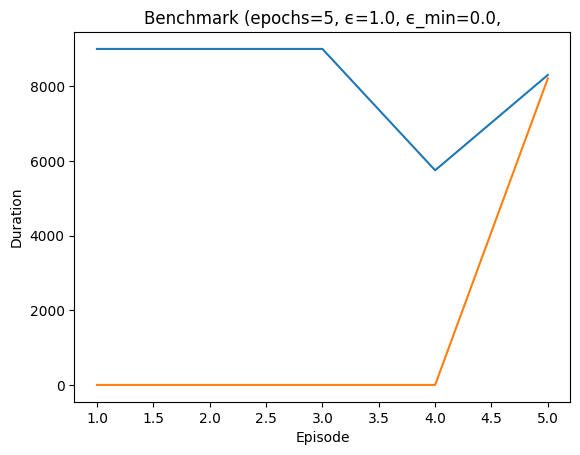

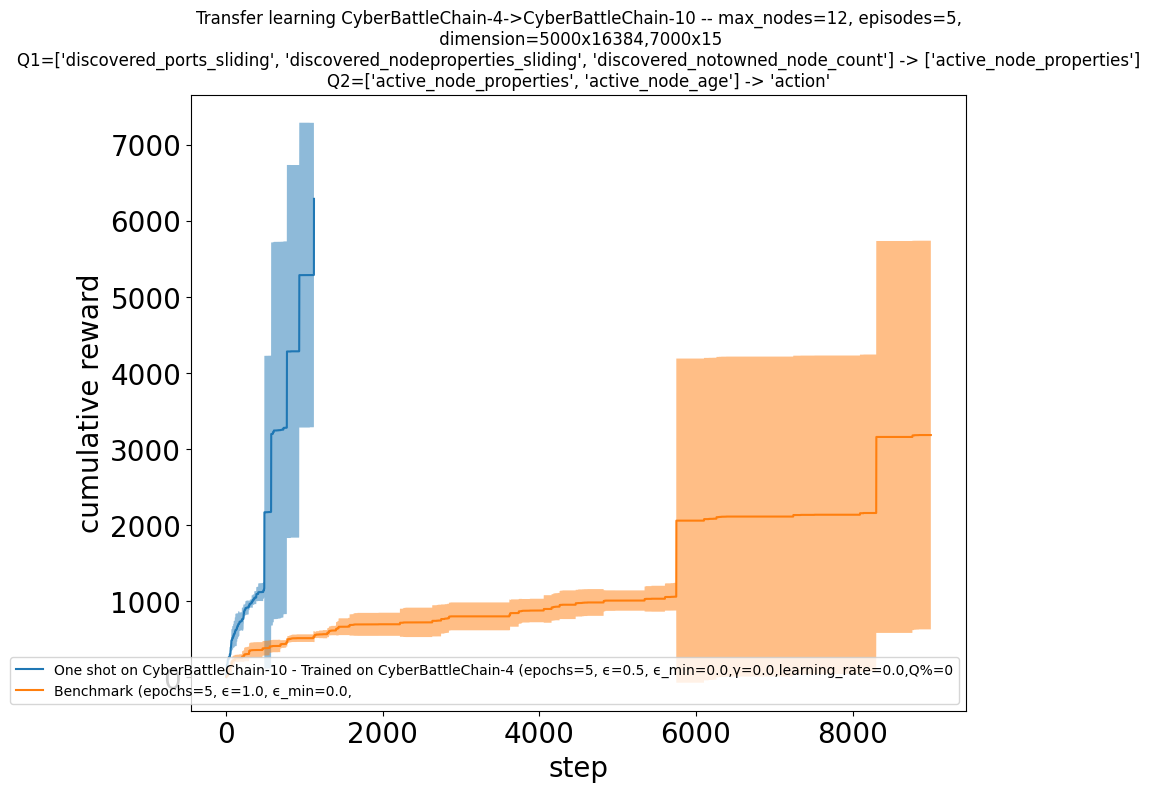

###### One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  118.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  129.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  129.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  137.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  137.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  146.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  146.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  246.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  246.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  252.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  252.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  263.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  263.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  267.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  267.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  269.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  269.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  278.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  278.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  378.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  378.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  392.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  392.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 104|reward:  492.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 104|reward:  492.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 1|Iteration 120|reward:  506.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 1|Iteration 120|reward:  506.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward: 5506.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward: 5506.0|last_reward_at:  121|Elapsed Time: 0:00:00||

  Episode 1 ended at t=121 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/14 (0.18)
    explore-remote: 6/34 (0.15)
    explore-connect: 0/32 (0.00)
    exploit-local: 4/16 (0.20)
    exploit-remote: 0/7 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 26
  ## Episode: 2/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  243.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  243.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  249.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  249.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  258.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  258.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  358.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  358.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  372.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  372.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  374.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  374.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  474.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  474.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  480.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  480.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  486.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  486.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  500.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  500.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward: 5500.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward: 5500.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 2 ended at t=42 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/4 (0.50)
    explore-remote: 5/9 (0.36)
    explore-connect: 0/8 (0.00)
    exploit-local: 2/3 (0.40)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 15
  ## Episode: 3/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  354.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  356.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  362.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  362.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  364.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  364.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  375.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  375.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  381.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  381.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  389.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  389.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  395.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  395.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  401.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  401.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward:  401.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 133|reward:  401.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 156|reward:  410.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 156|reward:  410.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 3|Iteration 157|reward:  510.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 3|Iteration 157|reward:  510.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 3|Iteration 164|reward:  524.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 3|Iteration 164|reward:  524.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 3|Iteration 165|reward: 5524.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 3|Iteration 165|reward: 5524.0|last_reward_at:  165|Elapsed Time: 0:00:00||

  Episode 3 ended at t=165 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/22 (0.15)
    explore-remote: 8/37 (0.18)
    explore-connect: 0/46 (0.00)
    exploit-local: 4/28 (0.12)
    exploit-remote: 0/11 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 38
  ## Episode: 4/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  241.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  241.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  247.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  247.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  251.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  251.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  260.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  260.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  360.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  360.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  362.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  362.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  364.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  364.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  375.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  375.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  381.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  381.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  389.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  389.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  395.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  395.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  395.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  395.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 127|reward:  404.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 127|reward:  404.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  504.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  504.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 134|reward:  510.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 134|reward:  510.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 4|Iteration 156|reward:  510.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 4|Iteration 159|reward:  521.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 4|Iteration 159|reward:  521.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 4|Iteration 174|reward:  530.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 4|Iteration 174|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 4|Iteration 177|reward: 5530.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 4|Iteration 177|reward: 5530.0|last_reward_at:  177|Elapsed Time: 0:00:00||

  Episode 4 ended at t=177 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/31 (0.16)
    explore-remote: 8/35 (0.19)
    explore-connect: 0/46 (0.00)
    exploit-local: 3/29 (0.09)
    exploit-remote: 0/14 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 42
  ## Episode: 5/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  118.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  132.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  132.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  232.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  232.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  238.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  238.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  249.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  249.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  251.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  251.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  257.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  257.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  266.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  366.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  366.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  377.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  377.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  386.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  386.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  486.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  486.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  492.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  492.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  498.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  498.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  500.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  500.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  506.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  506.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  517.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  517.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  526.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  526.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward: 5526.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward: 5526.0|last_reward_at:  110|Elapsed Time: 0:00:00||

  Episode 5 ended at t=110 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/21 (0.22)
    explore-remote: 7/16 (0.30)
    explore-connect: 0/32 (0.00)
    exploit-local: 3/13 (0.19)
    exploit-remote: 1/6 (0.14)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 29
simulation ended


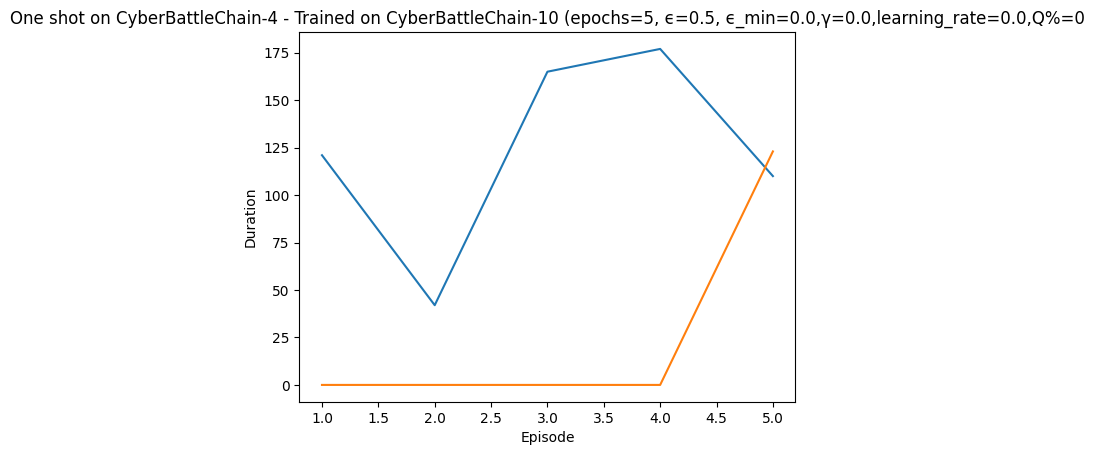

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  114.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  116.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  118.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  129.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  129.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  138.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  138.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  144.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  144.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  152.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  152.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  252.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  252.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  266.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 120|reward:  270.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 120|reward:  270.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  276.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  276.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 149|reward:  278.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 149|reward:  278.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 208|reward:  378.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 208|reward:  378.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 1|Iteration 222|reward:  392.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 1|Iteration 222|reward:  392.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 1|Iteration 236|reward:  398.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 1|Iteration 236|reward:  398.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 1|Iteration 263|reward:  406.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 1|Iteration 263|reward:  406.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  412.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  412.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 426|reward:  412.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 513|reward:  412.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 570|reward:  412.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 652|reward:  412.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 732|reward:  412.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 748|reward:  512.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 748|reward:  512.0|last_reward_at:  748|Elapsed Time: 0:00:00||

Episode 1|Iteration 794|reward:  526.0|last_reward_at:  748|Elapsed Time: 0:00:00||

Episode 1|Iteration 794|reward:  526.0|last_reward_at:  794|Elapsed Time: 0:00:00||

Episode 1|Iteration 863|reward:  532.0|last_reward_at:  794|Elapsed Time: 0:00:01||

Episode 1|Iteration 863|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 912|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 976|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 1026|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 1104|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 1180|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 1254|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 1332|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 1413|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 1482|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 1558|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 1|Iteration 1635|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 1709|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 1786|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 1866|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 1937|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 2012|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 2051|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 2127|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 2205|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 2279|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 2355|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 1|Iteration 2432|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:03||

Episode 1|Iteration 2507|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:03||

Episode 1|Iteration 2581|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:03||

Episode 1|Iteration 2621|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:03||

Episode 1|Iteration 2696|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:03||

Episode 1|Iteration 2735|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:03||

Episode 1|Iteration 2808|reward:  532.0|last_reward_at:  863|Elapsed Time: 0:00:03||

Episode 1|Iteration 2825|reward: 5532.0|last_reward_at:  863|Elapsed Time: 0:00:03||

Episode 1|Iteration 2825|reward: 5532.0|last_reward_at: 2825|Elapsed Time: 0:00:03||

  Episode 1 ended at t=2825 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/803 (0.01)
    explore-remote: 8/979 (0.01)
    explore-connect: 5/1021 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 83|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 83|reward:  120.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 2|Iteration 99|reward:  134.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 2|Iteration 99|reward:  134.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  140.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  140.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  148.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  148.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  154.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  154.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 209|reward:  254.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 209|reward:  254.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 2|Iteration 224|reward:  268.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 2|Iteration 224|reward:  268.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 2|Iteration 231|reward:  274.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 2|Iteration 231|reward:  274.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 238|reward:  276.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 238|reward:  276.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 2|Iteration 260|reward:  280.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 2|Iteration 260|reward:  280.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 2|Iteration 342|reward:  280.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 2|Iteration 411|reward:  380.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 2|Iteration 411|reward:  380.0|last_reward_at:  411|Elapsed Time: 0:00:00||

Episode 2|Iteration 428|reward:  394.0|last_reward_at:  411|Elapsed Time: 0:00:00||

Episode 2|Iteration 428|reward:  394.0|last_reward_at:  428|Elapsed Time: 0:00:00||

Episode 2|Iteration 464|reward:  402.0|last_reward_at:  428|Elapsed Time: 0:00:00||

Episode 2|Iteration 464|reward:  402.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 2|Iteration 502|reward:  408.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 2|Iteration 502|reward:  408.0|last_reward_at:  502|Elapsed Time: 0:00:00||

Episode 2|Iteration 503|reward:  414.0|last_reward_at:  502|Elapsed Time: 0:00:00||

Episode 2|Iteration 503|reward:  414.0|last_reward_at:  503|Elapsed Time: 0:00:00||

Episode 2|Iteration 570|reward:  414.0|last_reward_at:  503|Elapsed Time: 0:00:00||

Episode 2|Iteration 635|reward:  514.0|last_reward_at:  503|Elapsed Time: 0:00:00||

Episode 2|Iteration 635|reward:  514.0|last_reward_at:  635|Elapsed Time: 0:00:00||

Episode 2|Iteration 643|reward:  528.0|last_reward_at:  635|Elapsed Time: 0:00:00||

Episode 2|Iteration 643|reward:  528.0|last_reward_at:  643|Elapsed Time: 0:00:00||

Episode 2|Iteration 653|reward:  534.0|last_reward_at:  643|Elapsed Time: 0:00:00||

Episode 2|Iteration 653|reward:  534.0|last_reward_at:  653|Elapsed Time: 0:00:00||

Episode 2|Iteration 735|reward:  534.0|last_reward_at:  653|Elapsed Time: 0:00:00||

Episode 2|Iteration 798|reward:  534.0|last_reward_at:  653|Elapsed Time: 0:00:00||

Episode 2|Iteration 871|reward:  534.0|last_reward_at:  653|Elapsed Time: 0:00:00||

Episode 2|Iteration 912|reward:  534.0|last_reward_at:  653|Elapsed Time: 0:00:00||

Episode 2|Iteration 992|reward:  534.0|last_reward_at:  653|Elapsed Time: 0:00:01||

Episode 2|Iteration 1072|reward:  534.0|last_reward_at:  653|Elapsed Time: 0:00:01||

Episode 2|Iteration 1140|reward:  534.0|last_reward_at:  653|Elapsed Time: 0:00:01||

Episode 2|Iteration 1192|reward: 5534.0|last_reward_at:  653|Elapsed Time: 0:00:01||

Episode 2|Iteration 1192|reward: 5534.0|last_reward_at: 1192|Elapsed Time: 0:00:01||

  Episode 2 ended at t=1192 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/306 (0.03)
    explore-remote: 8/435 (0.02)
    explore-connect: 5/429 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  131.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  131.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  139.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  139.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  141.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  141.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  143.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  143.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  152.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 274|reward:  252.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 274|reward:  252.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 3|Iteration 309|reward:  263.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 3|Iteration 309|reward:  263.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 3|Iteration 312|reward:  267.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 3|Iteration 312|reward:  267.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 3|Iteration 349|reward:  269.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 3|Iteration 349|reward:  269.0|last_reward_at:  349|Elapsed Time: 0:00:00||

Episode 3|Iteration 426|reward:  278.0|last_reward_at:  349|Elapsed Time: 0:00:00||

Episode 3|Iteration 426|reward:  278.0|last_reward_at:  426|Elapsed Time: 0:00:00||

Episode 3|Iteration 442|reward:  378.0|last_reward_at:  426|Elapsed Time: 0:00:00||

Episode 3|Iteration 442|reward:  378.0|last_reward_at:  442|Elapsed Time: 0:00:00||

Episode 3|Iteration 492|reward:  389.0|last_reward_at:  442|Elapsed Time: 0:00:00||

Episode 3|Iteration 492|reward:  389.0|last_reward_at:  492|Elapsed Time: 0:00:00||

Episode 3|Iteration 501|reward:  398.0|last_reward_at:  492|Elapsed Time: 0:00:00||

Episode 3|Iteration 501|reward:  398.0|last_reward_at:  501|Elapsed Time: 0:00:00||

Episode 3|Iteration 507|reward:  404.0|last_reward_at:  501|Elapsed Time: 0:00:00||

Episode 3|Iteration 507|reward:  404.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 3|Iteration 564|reward:  412.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 3|Iteration 564|reward:  412.0|last_reward_at:  564|Elapsed Time: 0:00:00||

Episode 3|Iteration 593|reward:  512.0|last_reward_at:  564|Elapsed Time: 0:00:00||

Episode 3|Iteration 593|reward:  512.0|last_reward_at:  593|Elapsed Time: 0:00:00||

Episode 3|Iteration 638|reward:  526.0|last_reward_at:  593|Elapsed Time: 0:00:00||

Episode 3|Iteration 638|reward:  526.0|last_reward_at:  638|Elapsed Time: 0:00:00||

Episode 3|Iteration 684|reward:  526.0|last_reward_at:  638|Elapsed Time: 0:00:00||

Episode 3|Iteration 703|reward:  532.0|last_reward_at:  638|Elapsed Time: 0:00:00||

Episode 3|Iteration 703|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:00||

Episode 3|Iteration 782|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:00||

Episode 3|Iteration 862|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:00||

Episode 3|Iteration 912|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:00||

Episode 3|Iteration 990|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1070|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1140|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1220|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1301|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1368|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1447|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1522|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1574|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1654|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1709|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1787|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1865|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1937|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 2015|reward:  532.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 2061|reward: 5532.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 2061|reward: 5532.0|last_reward_at: 2061|Elapsed Time: 0:00:02||

  Episode 3 ended at t=2061 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/558 (0.02)
    explore-remote: 8/745 (0.01)
    explore-connect: 5/736 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  120.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  131.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  131.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  139.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  139.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  145.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  145.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  154.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  154.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 169|reward:  254.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 169|reward:  254.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  268.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  268.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  270.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  270.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 4|Iteration 205|reward:  274.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 4|Iteration 205|reward:  274.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:  280.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 338|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 437|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 538|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 640|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 735|reward:  380.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 735|reward:  380.0|last_reward_at:  735|Elapsed Time: 0:00:00||

Episode 4|Iteration 744|reward:  391.0|last_reward_at:  735|Elapsed Time: 0:00:00||

Episode 4|Iteration 744|reward:  391.0|last_reward_at:  744|Elapsed Time: 0:00:00||

Episode 4|Iteration 746|reward:  399.0|last_reward_at:  744|Elapsed Time: 0:00:00||

Episode 4|Iteration 746|reward:  399.0|last_reward_at:  746|Elapsed Time: 0:00:00||

Episode 4|Iteration 754|reward:  405.0|last_reward_at:  746|Elapsed Time: 0:00:00||

Episode 4|Iteration 754|reward:  405.0|last_reward_at:  754|Elapsed Time: 0:00:00||

Episode 4|Iteration 798|reward:  405.0|last_reward_at:  754|Elapsed Time: 0:00:00||

Episode 4|Iteration 814|reward:  414.0|last_reward_at:  754|Elapsed Time: 0:00:00||

Episode 4|Iteration 814|reward:  414.0|last_reward_at:  814|Elapsed Time: 0:00:00||

Episode 4|Iteration 899|reward:  414.0|last_reward_at:  814|Elapsed Time: 0:00:00||

Episode 4|Iteration 937|reward:  514.0|last_reward_at:  814|Elapsed Time: 0:00:01||

Episode 4|Iteration 937|reward:  514.0|last_reward_at:  937|Elapsed Time: 0:00:01||

Episode 4|Iteration 1015|reward:  514.0|last_reward_at:  937|Elapsed Time: 0:00:01||

Episode 4|Iteration 1038|reward:  525.0|last_reward_at:  937|Elapsed Time: 0:00:01||

Episode 4|Iteration 1038|reward:  525.0|last_reward_at: 1038|Elapsed Time: 0:00:01||

Episode 4|Iteration 1060|reward:  534.0|last_reward_at: 1038|Elapsed Time: 0:00:01||

Episode 4|Iteration 1060|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 4|Iteration 1124|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 4|Iteration 1192|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 4|Iteration 1254|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 4|Iteration 1331|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 4|Iteration 1410|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 4|Iteration 1482|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 4|Iteration 1558|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 4|Iteration 1635|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 4|Iteration 1709|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 1785|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 1862|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 1931|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 1999|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 2051|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 2117|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 2165|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 2237|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 2279|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 2354|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 2393|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 2467|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 2507|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 2584|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 2621|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 2685|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 2735|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 2809|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 2849|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 2921|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 2963|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 3034|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 3076|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 3083|reward: 5534.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 3083|reward: 5534.0|last_reward_at: 3083|Elapsed Time: 0:00:03||

  Episode 4 ended at t=3083 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/836 (0.01)
    explore-remote: 8/1145 (0.01)
    explore-connect: 5/1080 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  120.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  131.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  131.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  137.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  137.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  145.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  145.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  145.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 139|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 139|reward:  154.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 5|Iteration 165|reward:  254.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 5|Iteration 165|reward:  254.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 5|Iteration 194|reward:  265.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 5|Iteration 194|reward:  265.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 5|Iteration 198|reward:  274.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 5|Iteration 198|reward:  274.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 5|Iteration 210|reward:  276.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 5|Iteration 210|reward:  276.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  376.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  376.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 5|Iteration 239|reward:  378.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 5|Iteration 239|reward:  378.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 240|reward:  392.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 240|reward:  392.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 5|Iteration 246|reward:  400.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 5|Iteration 246|reward:  400.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 5|Iteration 251|reward:  406.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 5|Iteration 251|reward:  406.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 5|Iteration 269|reward:  506.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 5|Iteration 269|reward:  506.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 5|Iteration 279|reward:  520.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 5|Iteration 279|reward:  520.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 5|Iteration 301|reward:  526.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 5|Iteration 301|reward:  526.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 5|Iteration 303|reward:  532.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 5|Iteration 303|reward:  532.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  532.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 5|Iteration 418|reward:  532.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 5|Iteration 498|reward:  532.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 5|Iteration 570|reward:  532.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 5|Iteration 646|reward:  532.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 5|Iteration 725|reward:  532.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 5|Iteration 798|reward:  532.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 5|Iteration 841|reward: 5532.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 5|Iteration 841|reward: 5532.0|last_reward_at:  841|Elapsed Time: 0:00:01||

  Episode 5 ended at t=841 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/214 (0.04)
    explore-remote: 8/298 (0.03)
    explore-connect: 5/307 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


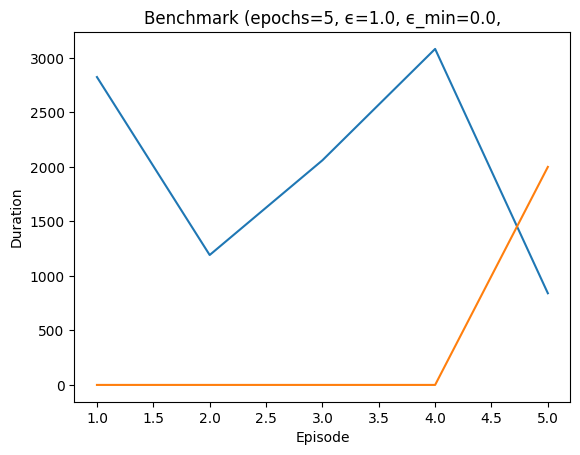

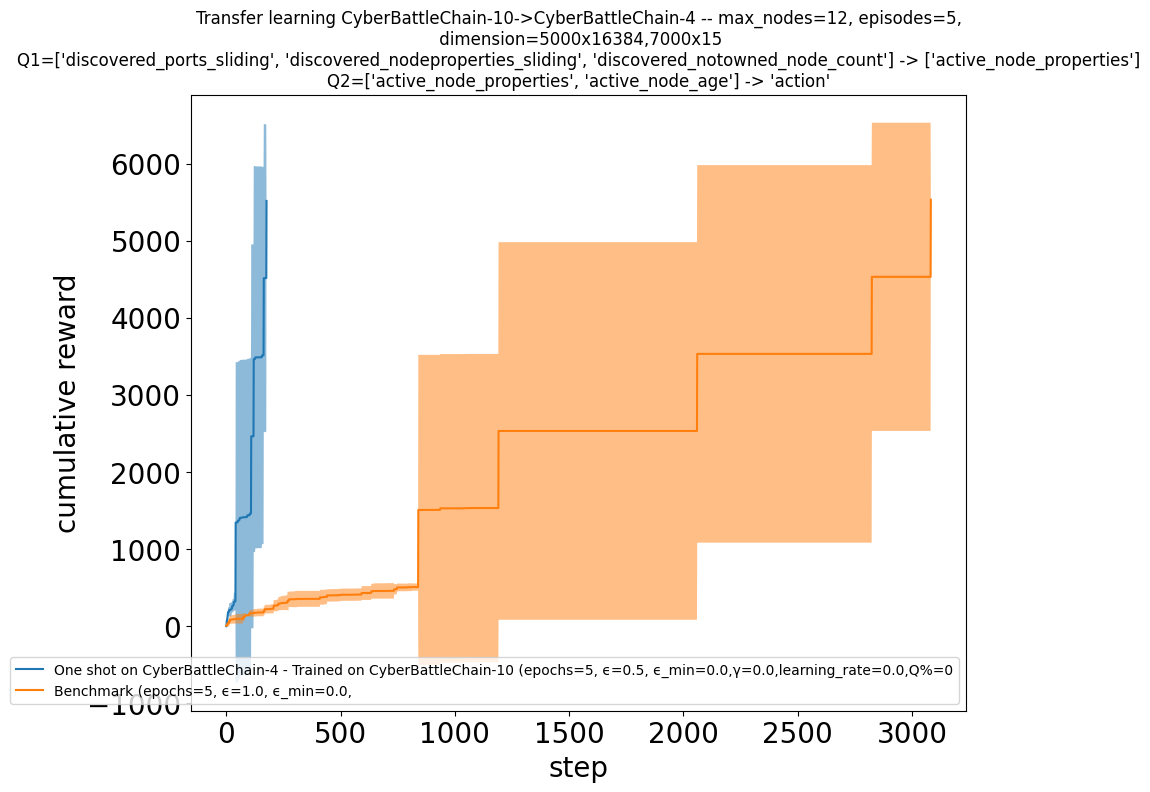

In [19]:
# Train Q-matrix on CyberBattle network of size 4
cyberbattlechain_4 = gym.make("CyberBattleChain-v0", size=4, attacker_goal=AttackerGoal(own_atleast_percent=1.0))

qlearning_bestrun_4 = qlearning_run(0.015, gym_env=cyberbattlechain_4)


def stop_learning(trained_learner):
    return TrainedLearner(
        learner=a.QTabularLearner(ep, gamma=0.0, learning_rate=0.0, exploit_percentile=0, trained=trained_learner["learner"]),
        title=trained_learner["title"],
        trained_on=trained_learner["trained_on"],
        all_episodes_rewards=trained_learner["all_episodes_rewards"],
        all_episodes_availability=trained_learner["all_episodes_availability"],
    )


learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_4),
    eval_env=cyberbattlechain_10,
    eval_epsilon=0.5,  # alternate with exploration to help generalization to bigger network
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
)

learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_10),
    eval_env=cyberbattlechain_4,
    eval_epsilon=0.5,
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
)